In [1]:
# Open VSCode and create a new project folder for your machine learning project.
# Open the terminal in VSCode by going to Terminal > New Terminal.
# Create a new environment using conda or pip. For example, to create a new environment with conda:
#     conda create --name myenv
#     conda activate myenv
# Install the necessary packages for your machine learning project. For example, to install scikit-learn:
#     conda install pandas numpy scikit-learn flask
#     pip install -r requirements.txt             use this if you had initially loaded some packages to the file
# Export the dependencies of your project by running the command:
#     pip freeze > requirements.txt

<br>Table of Content:
* [Import Libraries](#1)
* [Load Data](#2)
* [Exploratory Data Analysis (EDA)](#3)
* [Data Preprocessing](#4)
    * [Data Cleaning](#4a)
    * [Data Transformation](#4b)
    * [Handling Imbalanced Data](#4c)
    * [Data Reduction](#4d)
* [Selecting and Training the Model](#5) 
* [Model Evaluation](#6) 
* [Feature Engineering](#7) 
* [Model Optimization](#8) 
* [Model Deployment](#9) 

<a id="1"></a> <br>
## Import Libraries

In [2]:
# Data Analysis      
import pandas as pd          # data analysis library for handling structured data             
import numpy as np           # mathematical library for working with numerical data
import os, sys
# Add the previous directory to sys.path
sys.path.append(os.path.abspath('../'))

# Now you can import the metrics module
from metrics import *

# Visualization
import matplotlib.pyplot as plt     # data visualization library for creating graphs and charts
%matplotlib inline
import seaborn as sns        # data visualization library based on matplotlib for creating more attractive visualizations
import missingno as msno    #visualize missing data
from sklearn.metrics import mean_squared_error, r2_score 

# Ignore warnings
import warnings
warnings.filterwarnings("ignore") 

pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000) 

> Demo

In [3]:
# import pandas as pd

# experiment_1 = pd.read_csv('exp1', index_col='time', parse_dates=True)
# experiment_2 = pd.read_csv('exp2', index_col='time', parse_dates=True)
# # Repeat for all experiments...
# experiment_10 = pd.read_csv('exp10', index_col='time', parse_dates=True)

# # Combine all experiments into a list for easy processing
# experiments = [experiment_1, experiment_2, ..., experiment_10]



# # CONVERT DATAFRAMES TO PYTORCH 
# import torch

# def df_to_tensor(df):
#     # Assuming 'df' is preprocessed and ready for conversion
#     # Convert df values to tensor
#     return torch.tensor(df.values, dtype=torch.float32)

# # Convert each experiment to a tensor and store in a new list
# tensor_experiments = [df_to_tensor(df) for df in experiments]




# # PREPARE DATALOADERS
# from torch.utils.data import TensorDataset, DataLoader

# # Combine original features with extra parameters (one approach)
# combined_data = np.concatenate([tensor_experiments, extra_params], axis=-1)  # New shape [n_experiments, time_steps, n_features + n_extra_features]

# # Example targets for demonstration
# # In a real scenario, replace 'dummy_targets' with your actual targets
# dummy_targets = torch.rand(len(tensor_experiments), output_dim)  # Randomly generated targets

# # Create TensorDataset and DataLoader
# dataset = TensorDataset(torch.stack(tensor_experiments), dummy_targets)
# dataloader = DataLoader(dataset, batch_size=2, shuffle=True)




# # BUILDING THE MODEL


#     # Tips 
#         #1. Consider Multi-Task Learning (MTL):
#             # Multi-Task Learning is a learning paradigm in machine learning where multiple learning tasks are solved at the same time, 
#             # while exploiting commonalities and differences across tasks. This approach can lead to improved learning efficiency and 
#             # prediction accuracy for the task models, especially when the tasks are related. In deep learning, this often involves 
#             # sharing layers between tasks, while having some task-specific layers towards the end of the mode 
            
#             # Imagine you have a dataset from your experiments, and you want to predict 4 main outputs, but you also have 3 other 
#             # parameters that are somewhat related and you believe predicting them could help improve the performance of your main task.
            
#             # In this example, MultiTaskLSTM is designed to make predictions for both the main task and an auxiliary task using shared 
#             # LSTM layers for feature extraction, and separate fully connected layers for each task's specific output.
            
            
#         # 2. Consider Attention Mechanisms (Best to use Transformer ones)
#             # Attention mechanisms allow models to focus on different parts of the input for each output part, improving the ability of 
#             # the model to capture dependencies, especially in sequences. In deep learning, attention mechanisms can dynamically weight 
#             # the importance of input elements.
            
#             # example: In this AttentionModel, an attention mechanism is applied to the output of an LSTM layer. The model computes 
#             # attention weights for each element in the sequence, which are then used to create a weighted sum (context vector) 
#             # representing the input sequence. This context vector is then fed into a fully connected layer to produce the final output.

<a id="2"></a> <br>
## Load Data

In [4]:
import os

os.chdir(r"C:\Users\pault\OneDrive - University of Oklahoma\GRA - Bio-Manufacturing\1. ML-Cytovance-OU-Research")

In [5]:
# adding attribute name to each dataframe

def add_attribute_name(df_list, df_name):
    """
    Adds an attribute name to each DataFrame in a list.

    :param df_list: List of pandas DataFrames to add attribute names to.
    :param attribute_name: Name of the attribute to add.
    :return: List of DataFrames with attribute names.
    """
    for index, df in enumerate(df_list, start=1):
        df.name = f"{df_name[index-1]}"
        
    return df_list



In [6]:

experiment_names = ['exp_210623_1', 'exp_210623_2', 'exp_210623_3', 'exp_210623_4', 
                    'exp_211013_1', 'exp_211013_2', 'exp_211013_3', 'exp_211013_4', 
                    'exp_211130_1', 'exp_211130_2', 'exp_211130_3', 'exp_211130_4', 
                    'exp_220309demo_1', 'exp_220309demo_2', 'exp_220309demo_3', 'exp_220309demo_4',
                    'exp_220315c1_1', 'exp_220315c1_2', 'exp_220315c1_3', 'exp_220315c1_4', 'exp_220315c1_5', 'exp_220315c1_6',
                    'exp_220329c2_1', 'exp_220329c2_2', 'exp_220329c2_3', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6', 
                    'exp_220822_1', 'exp_220822_2', 'exp_220822_3', 'exp_220822_4']


# Use this to load the data with the time in Datetime format.
# def load_data (experiments):
#     # Load the data
#     df_list = []
#     for exp in experiments:
#         df = pd.read_csv(f"data/final_cleaned/{exp}.csv", parse_dates=True)
#         # Choose a reference start date
#         start_date = pd.Timestamp('2024-01-01')
#         # Convert 'Hours' to timedelta and add to the start date
#         df['input_Timepoint (hr)'] = df['input_Timepoint (hr)'].apply(lambda x: start_date + pd.Timedelta(hours=x))
#         df.set_index('input_Timepoint (hr)', inplace = True)

#         df.name = exp
#         df_list.append(df)
#     return df_list


def load_data (experiments):
    # Load the data
    df_list = []
    for exp in experiments:
        df = pd.read_csv(f"titer/data/{exp}.csv", index_col = 'input_Timepoint (hr)', parse_dates=True)

        df.name = exp
        df_list.append(df)
    return df_list

# Load the data
experiment_data = load_data(experiment_names)
experiment_data = add_attribute_name(experiment_data, experiment_names)



In [7]:
experiment_data[1].head(4) 

input_vessel_type input_vessel_volume input_vessel_name  input_agitation_rpm  input_DO_%  input_pH_setpoint  input_gas_flow  input_air_%  input_O2  input_Temp_c input_media_type input_feed_type  input_glucose_limit  output_OD600  output_WCW_gl  output_agitation  output_air_%  output_D0_%  output_gasflow  output_O2  output_Ph  output_feed_%  output_feed  output_Temp  output_glycerol_gl  output_glucose_gl  output_acetate_mmol_l  output_phosphate_mmol_l  output_titre_µgl
input_Timepoint (hr)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
0.0                       5L Fermenter              5000ml             Ferm2               1185.0       100.0                6.8             5.0        100.0       0.0          30.0          Media A         Glucose                  0.0         0.421            NaN           1185.88         100.0        97.67             5.0        0.0       6.73            0.0          0.0        30.01                 4.8               0.24                   1.39                    15.25               NaN
2.0                       5L Fermenter              5000ml             Ferm2               1185.0       100.0                6.8             5.0        100.0       0.0          30.0          Media A         Glucose                  0.0         0.610            NaN           1184.66         100.0        97.96             5.0        0.0       6.89            0.0          0.0        30.01                 NaN                NaN                    NaN                      NaN               NaN
4.0                       5L Fermenter              5000ml             Ferm2               1185.0       100.0                6.8             5.0        100.0       0.0          30.0          Media A         Glucose                  0.0         1.800            NaN           1184.56         100.0        98.66             5.0        0.0       6.84            0.0          0.0        30.01                 NaN                NaN                    NaN                      NaN               NaN
6.0                       5L Fermenter              5000ml             Ferm2               1185.0       100.0                6.8             5.0        100.0       0.0          30.0          Media A         Glucose                  0.0         4.610            NaN           1184.60         100.0        81.92             5.0        0.0       6.74            0.0          0.0        30.02                 NaN                NaN                    NaN                      NaN               NaN

In [8]:
# Group the loaded CSVs by experiment date (assuming the date is the first part of the experiment name before '_')
grouped_experiments = {}

for name, df in zip(experiment_names, experiment_data):
    date = name.split('_')[1]  # Extract date from the experiment name
    if date not in grouped_experiments:
        grouped_experiments[date] = [df]
    else:
        grouped_experiments[date].append(df)

# Convert the grouped experiments dictionary to a list of lists
experiment_groups = list(grouped_experiments.values())



> Missing values

In [9]:
print("Summary of Missing Values in Experiment Datasets:\n")
print(f"{'Experiment Name':<30} {'Missing Values':<15}")
print(f"{'-'*30} {'-'*15}")

for exp in experiment_data:
    # Assuming `exp` is a DataFrame and has a property or method `name`
    missing_values = exp.isnull().sum() 
    # Summing up all missing values in the experiment dataset
    total_missing_values = missing_values.sum()
    print(f"{exp.name:<30} {total_missing_values:<15}")

    missing_values = missing_values /  len(exp) * 100
    # If you want to show a breakdown of missing values by column
    for column, num_missing in missing_values.items():  # Changed iteritems() to items()
        if num_missing > 0:  # Optionally, only display columns with missing values
            print(f"  - {column:<27} {num_missing}")
    print("\n")  # Add a newline for better separation between experiments


Summary of Missing Values in Experiment Datasets:

Experiment Name                Missing Values 
------------------------------ ---------------
exp_210623_1                   54             
  - output_OD600                9.090909090909092
  - output_WCW_gl               27.27272727272727
  - output_glycerol_gl          27.27272727272727
  - output_glucose_gl           27.27272727272727
  - output_acetate_mmol_l       27.27272727272727
  - output_phosphate_mmol_l     27.27272727272727
  - output_titre_µgl            100.0


exp_210623_2                   54             
  - output_OD600                9.090909090909092
  - output_WCW_gl               27.27272727272727
  - output_glycerol_gl          27.27272727272727
  - output_glucose_gl           27.27272727272727
  - output_acetate_mmol_l       27.27272727272727
  - output_phosphate_mmol_l     27.27272727272727
  - output_titre_µgl            100.0


exp_210623_3                   55             
  - output_OD600                9.

In [10]:
# # Preparing data for visualization
# summary_data = {'Experiment Name': [], 'Total Missing Values': []}
# column_names = set()

# for exp in experiment_data:
#     summary_data['Experiment Name'].append(exp.name)
#     missing_values = exp.isnull().sum()
#     total_missing_values = missing_values.sum()
#     summary_data['Total Missing Values'].append(total_missing_values)
#     for col in exp.columns:
#         if col != 'name':
#             column_names.add(col)
#             summary_data.setdefault(col + ' Missing', []).append(missing_values[col])

# summary_df = pd.DataFrame(summary_data)

# # Visualization
# fig, ax = plt.subplots(figsize=(10, 6))
# bottom = np.zeros(len(summary_df))

# for col in column_names:
#     missing_col = col + ' Missing'
#     ax.bar(summary_df['Experiment Name'], summary_df.get(missing_col, np.zeros(len(summary_df))), bottom=bottom, label=missing_col)
#     bottom += summary_df.get(missing_col, np.zeros(len(summary_df))).values

# ax.set_ylabel('Number of Missing Values')
# ax.set_title('Summary of Missing Values in Experiment Datasets')
# ax.legend()

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show() 

>> Data Understanding

Randomly selected experiment: exp_210623_2
                     input_vessel_type input_vessel_volume input_vessel_name  input_agitation_rpm  input_DO_%  input_pH_setpoint  input_gas_flow  input_air_%  input_O2  input_Temp_c input_media_type input_feed_type  input_glucose_limit  output_OD600  output_WCW_gl  output_agitation  output_air_%  output_D0_%  output_gasflow  output_O2  output_Ph  output_feed_%  output_feed  output_Temp  output_glycerol_gl  output_glucose_gl  output_acetate_mmol_l  output_phosphate_mmol_l  output_titre_µgl
input_Timepoint (hr)                                                                                                                                                                                                                                                                                                                                                                                                                                                           

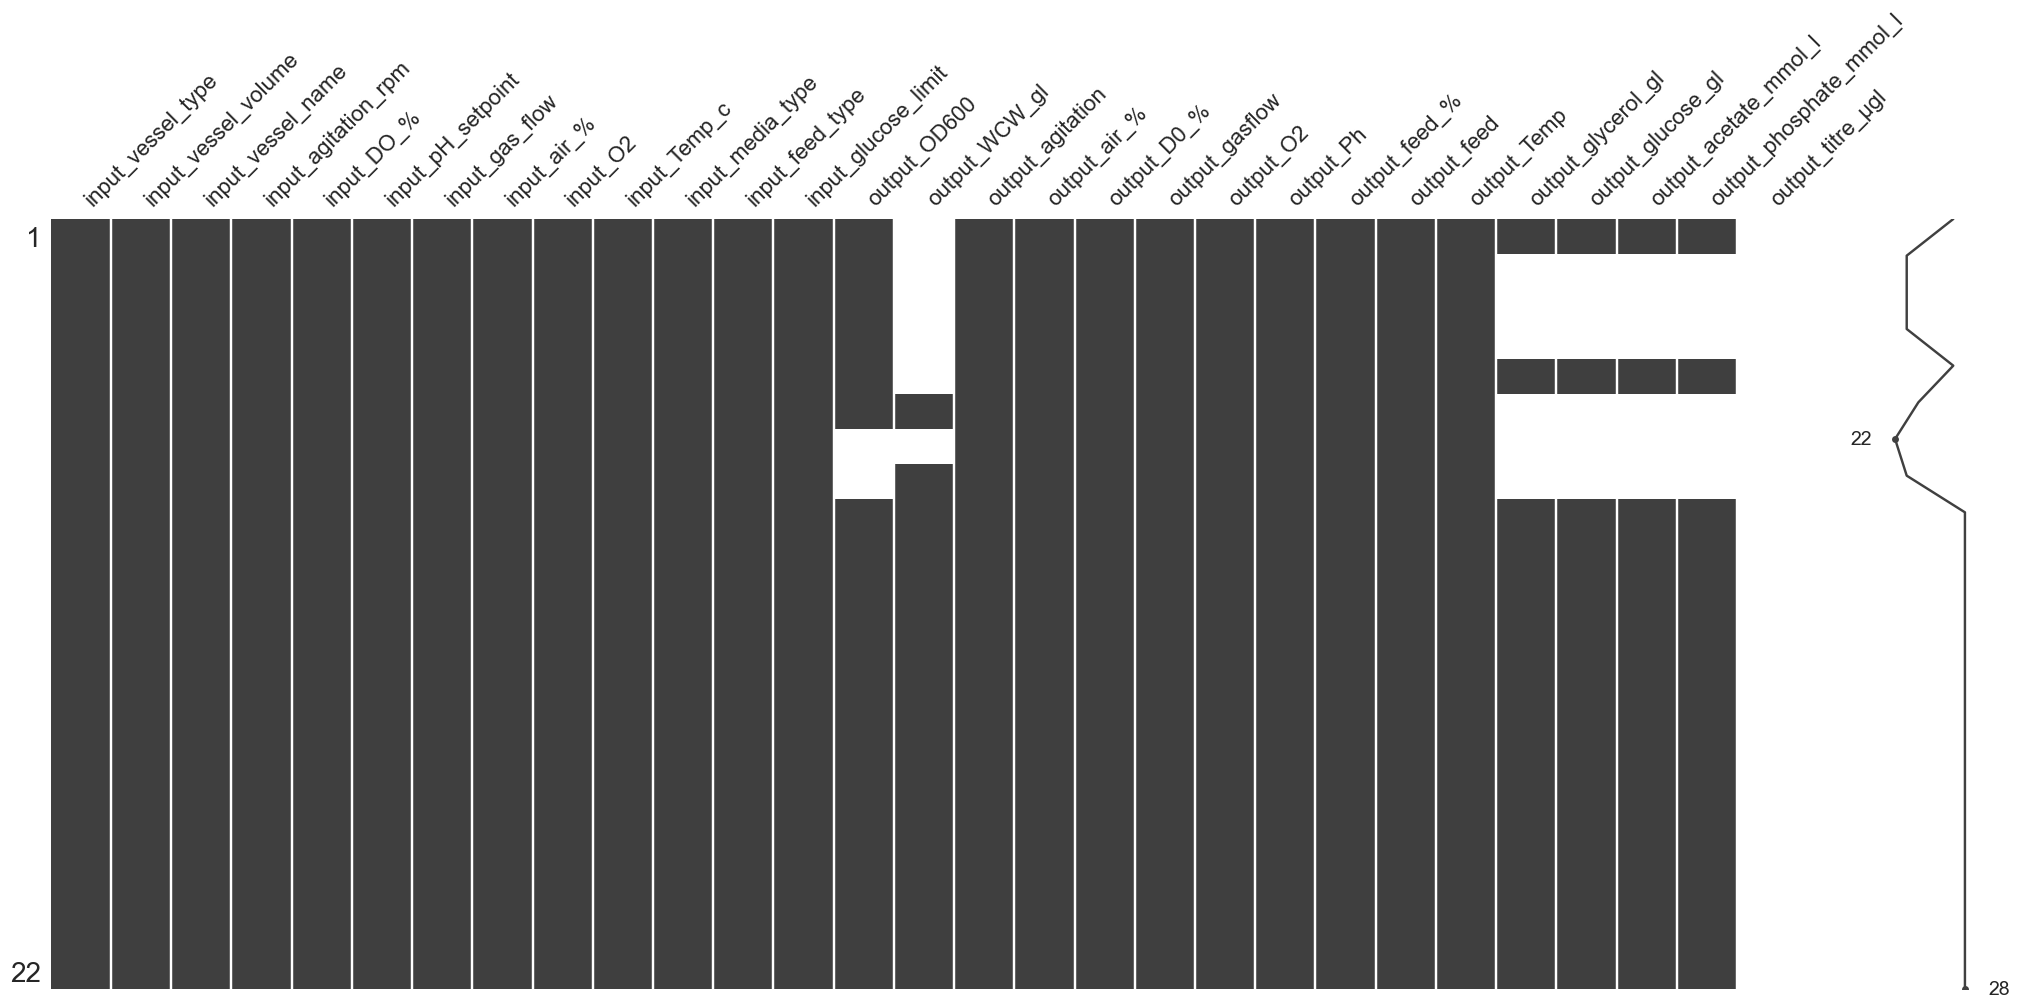

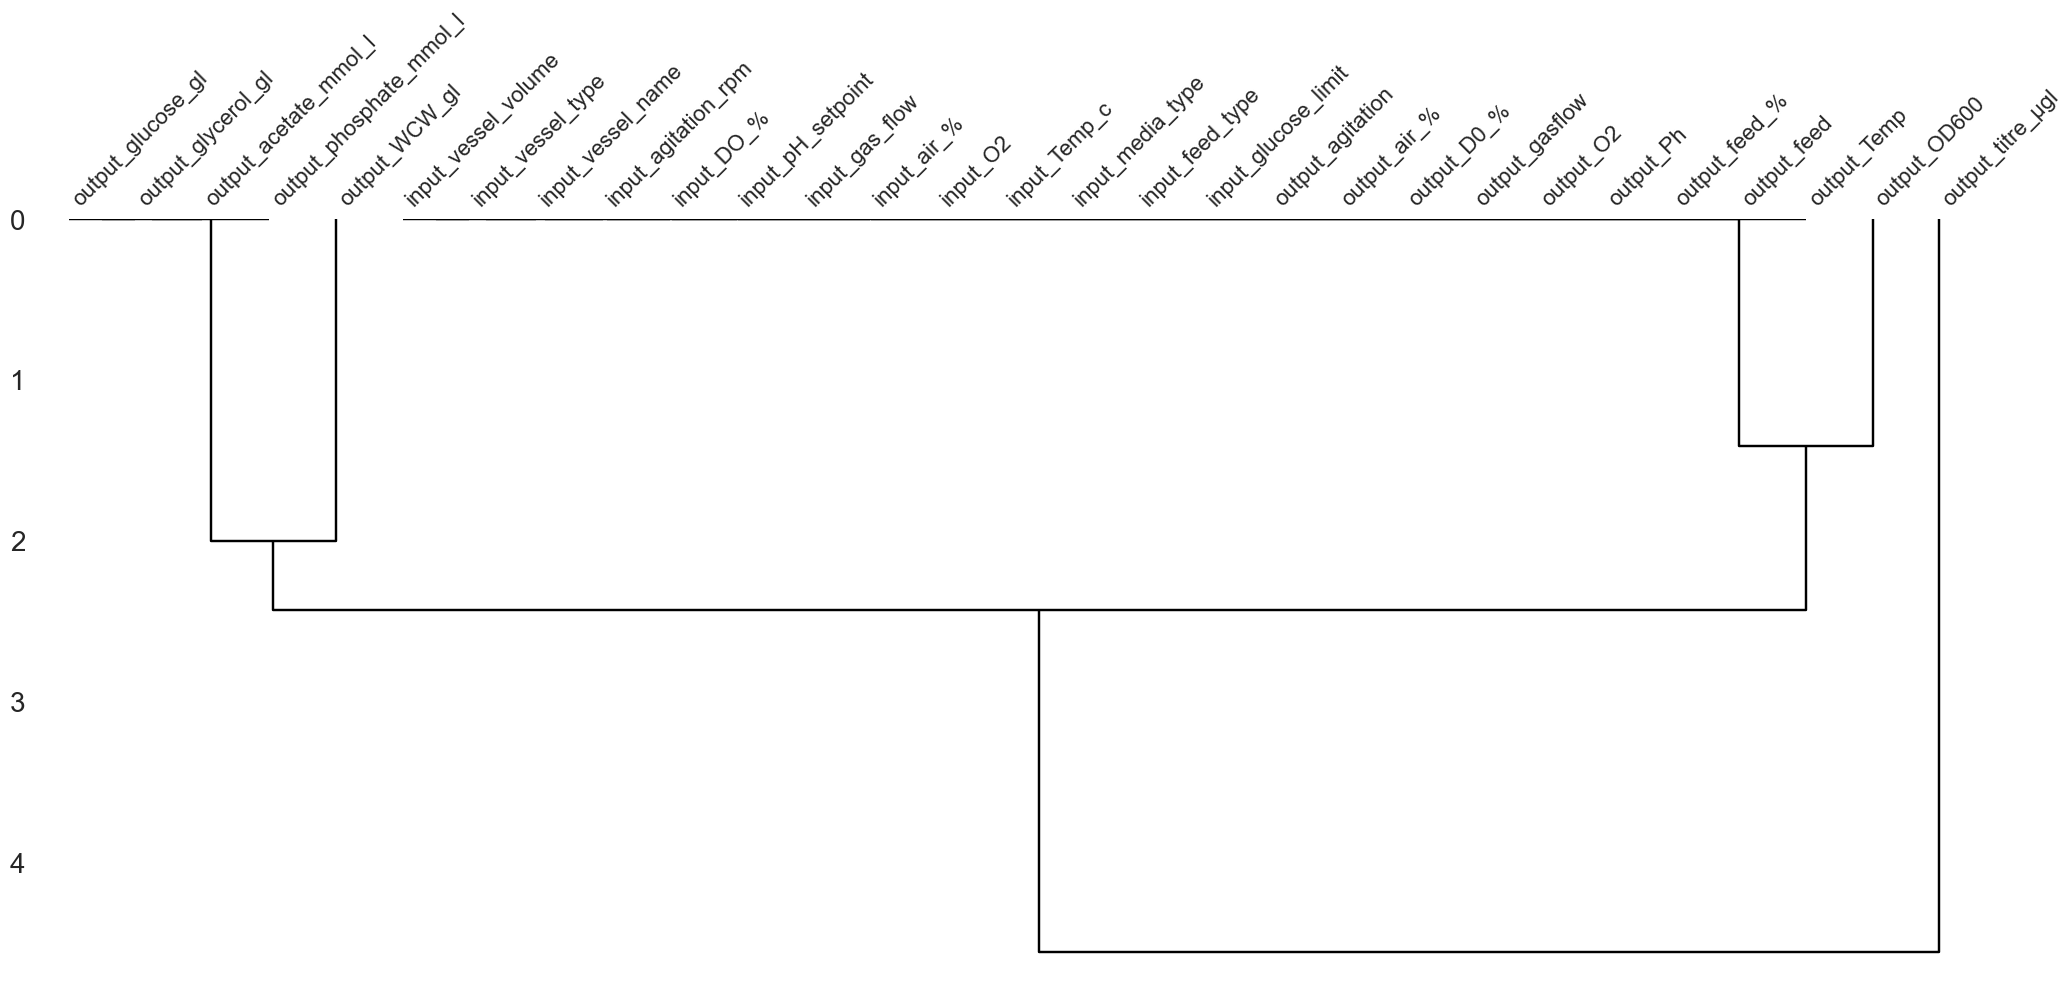

In [11]:
random_num = np.random.randint(0, len(experiment_data))


for index, df in enumerate(experiment_data):
    if random_num == index:
        print(f"Randomly selected experiment: {df.name}")
        print(df.head())
        print('------------------------------', '\n', 'Data Shape:', df.shape, '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data Columns:', df.columns, '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data Tpes:', df.dtypes, '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data Info:', df.info(), '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data Description:', df.describe(), '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data NaN total:', df.isnull().sum(), '\n', '------------------------------', '\n')

        msno.matrix(df)
        msno.dendrogram(df)


> Check for and drop invariant columns

In [12]:
invariant_cols = ['input_vessel_type',	'input_vessel_volume',	'input_vessel_name',	'input_agitation_rpm',	'input_DO_%',	
                  'input_pH_setpoint',	'input_gas_flow',	'input_air_%',	'input_O2',	'input_Temp_c',	'input_media_type',	
                  'input_feed_type',	'input_glucose_limit']

random_num = np.random.randint(0, len(experiment_data))

for index, df in enumerate(experiment_data):
    if random_num == index:
        print(df.name) 
        invariant_cols_values = {col: df[col].unique() for col in experiment_data[1].columns 
                                 if len(experiment_data[1][col].unique()) < 4}

invariant_cols_values 

exp_220329c2_6


{'input_vessel_type': array(['5L Fermenter'], dtype=object),
 'input_vessel_volume': array(['5000ml'], dtype=object),
 'input_vessel_name': array(['Ferm6'], dtype=object),
 'input_agitation_rpm': array([700], dtype=int64),
 'input_DO_%': array([1], dtype=int64),
 'input_pH_setpoint': array([6.8]),
 'input_gas_flow': array([2.5]),
 'input_air_%': array([100], dtype=int64),
 'input_O2': array([0.]),
 'input_Temp_c': array([30], dtype=int64),
 'input_media_type': array(['Media type A'], dtype=object),
 'input_feed_type': array(['Glucose'], dtype=object),
 'input_glucose_limit': array([0], dtype=int64),
 'output_titre_µgl': array([ nan, 1.43])}

In [13]:
# drop invariant columns 
use_this = [] * len(experiment_data)
for index, df in enumerate(experiment_data):
    df = df.drop(columns = invariant_cols, axis=1, inplace=True)


In [14]:
# experiment_data

<a id="3"></a> <br>
## Exploratory Data Analysis (EDA)

> Missing Values

Data saved to data/missing_values.csv


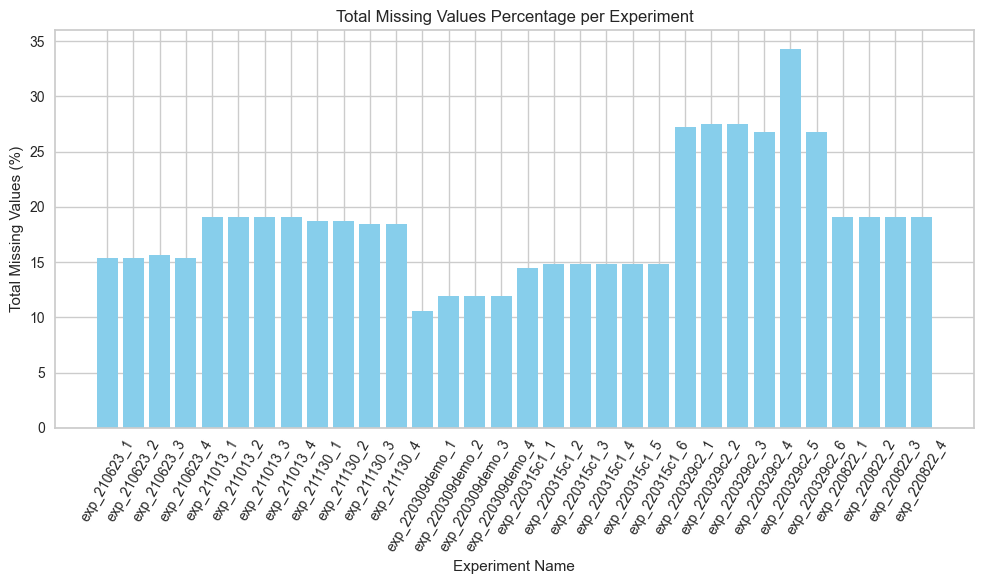

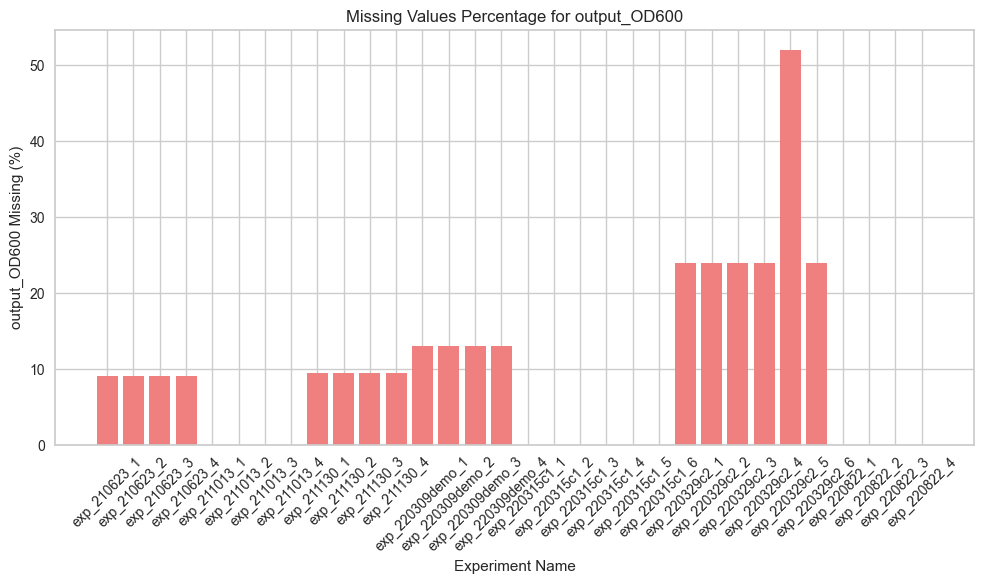

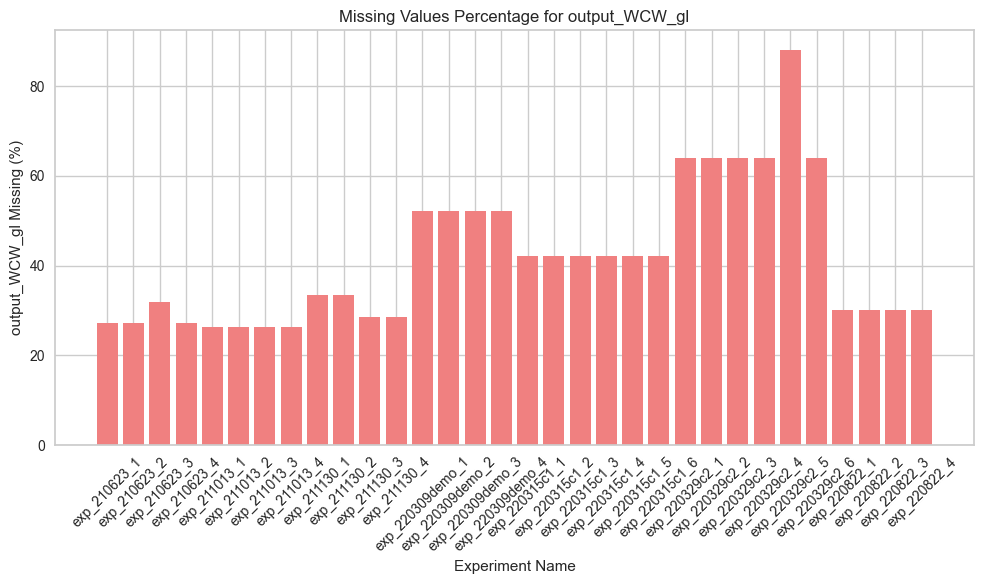

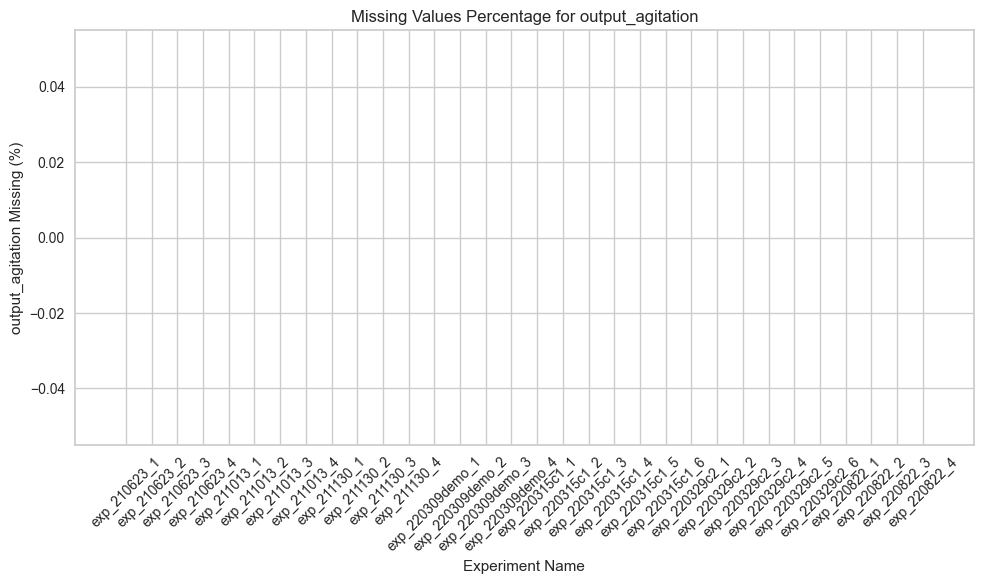

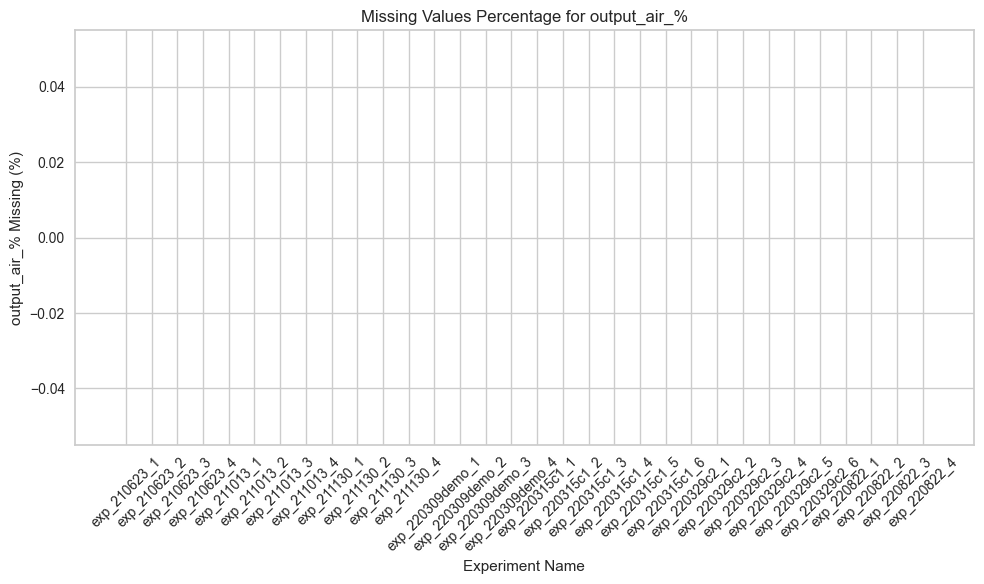

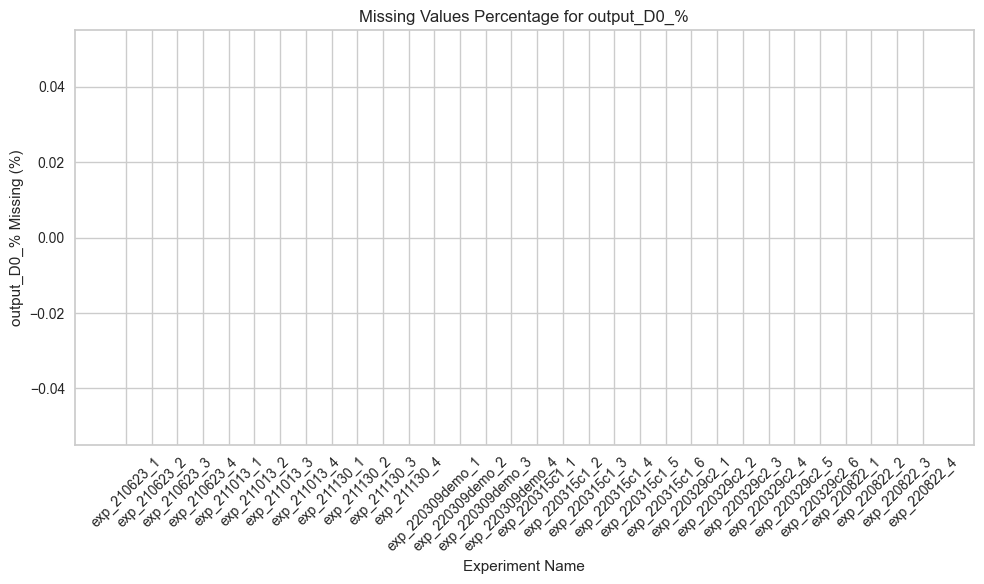

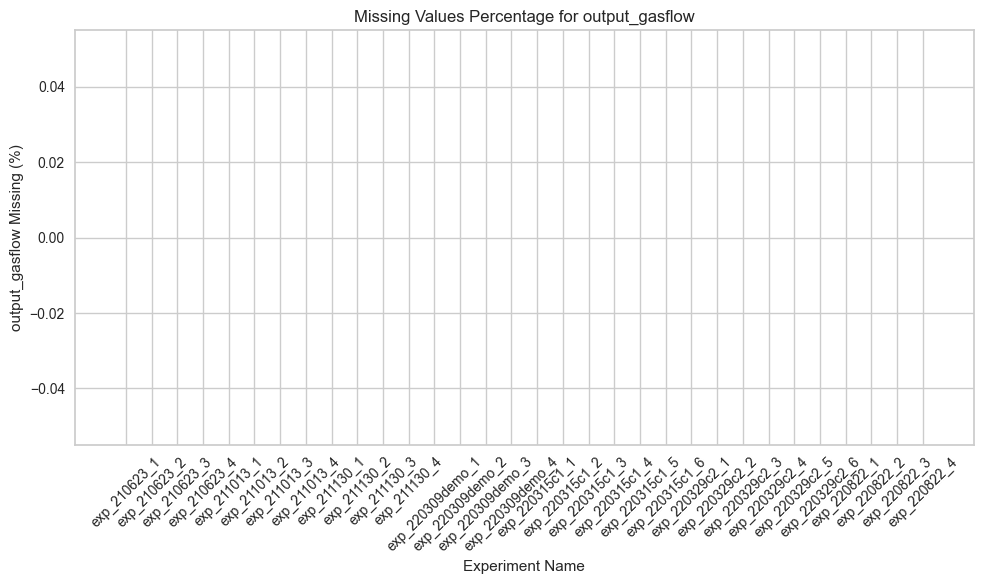

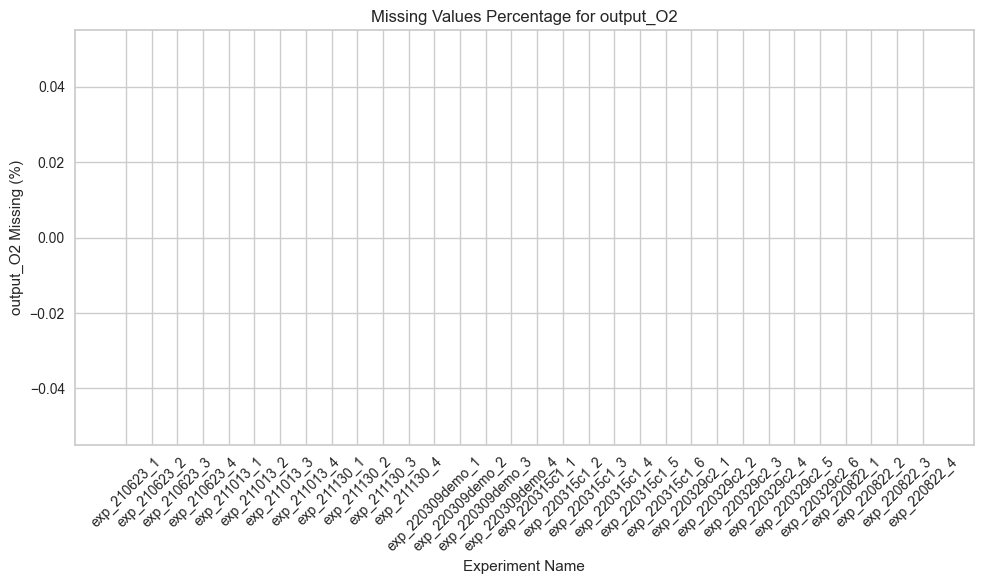

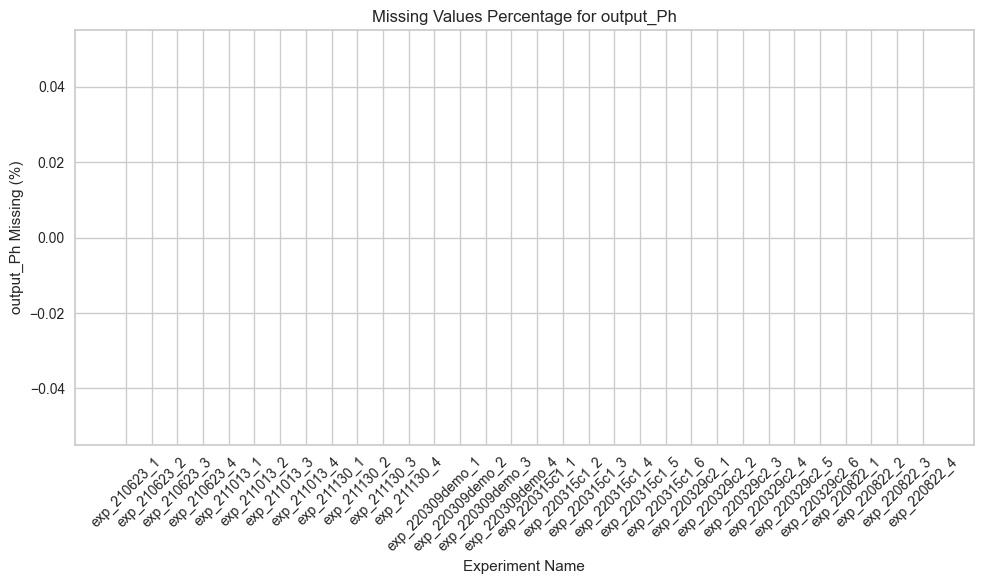

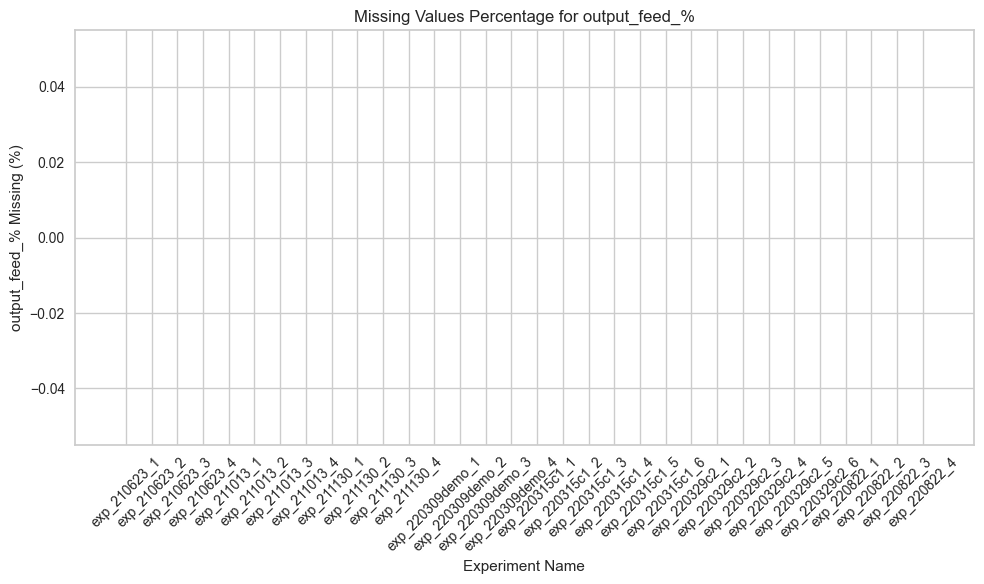

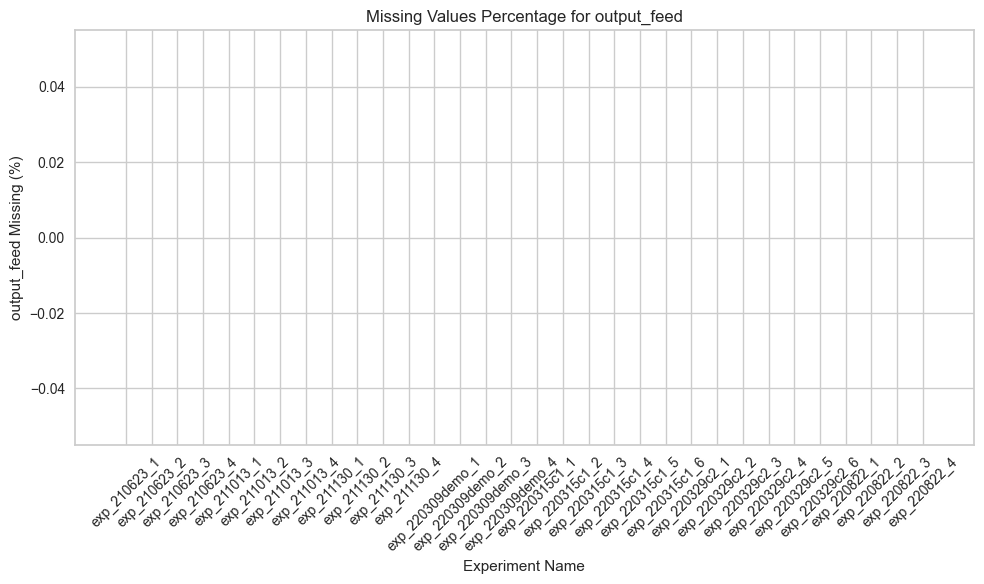

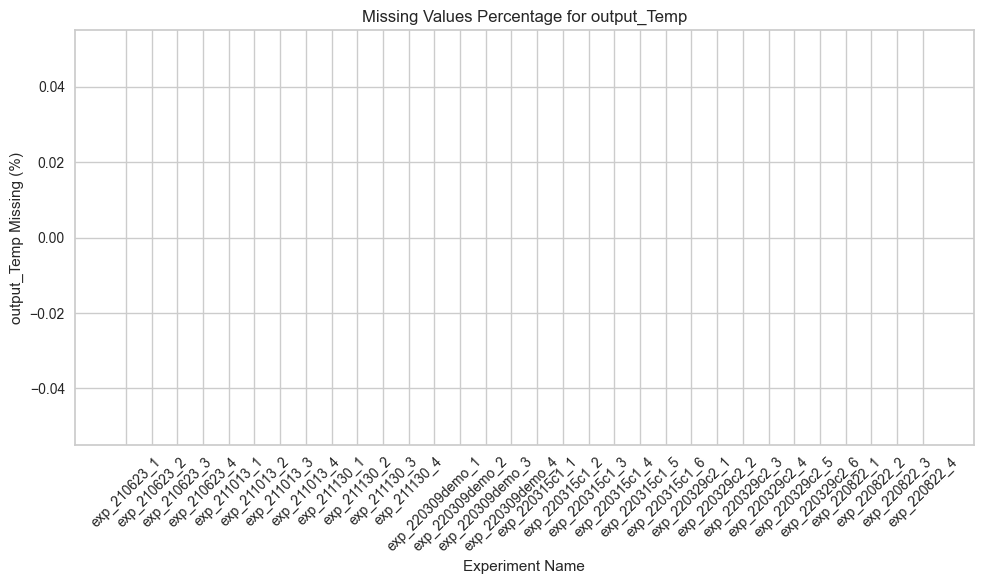

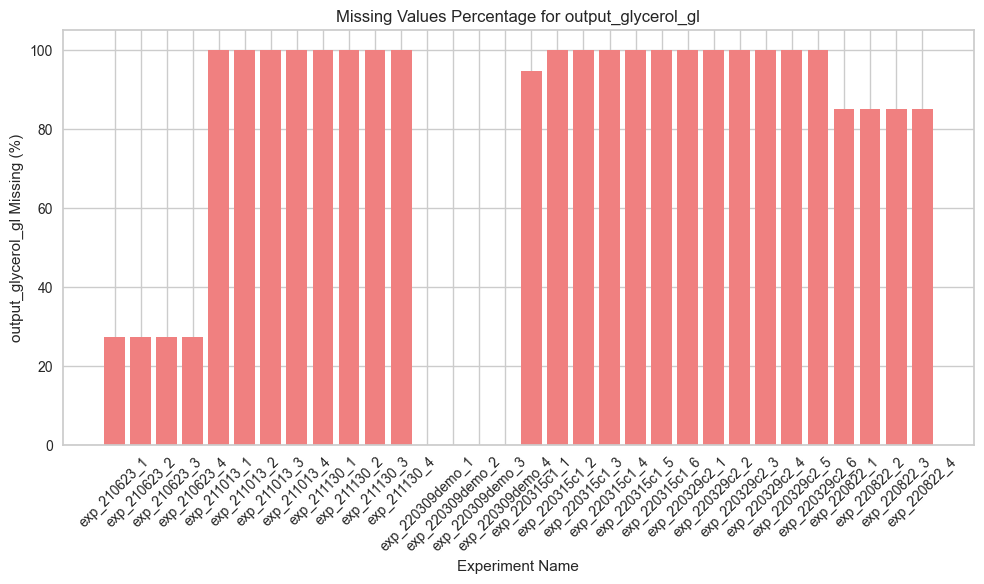

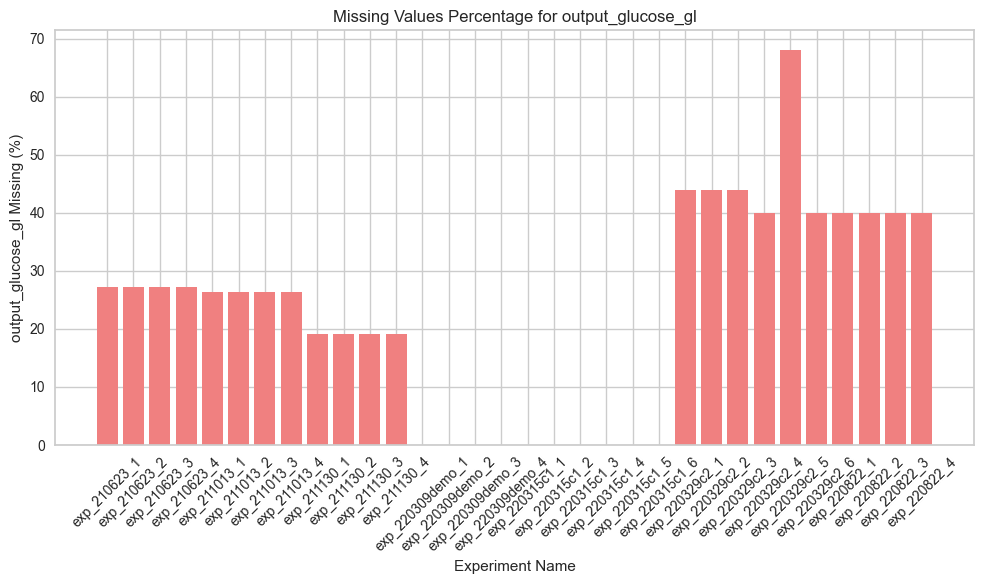

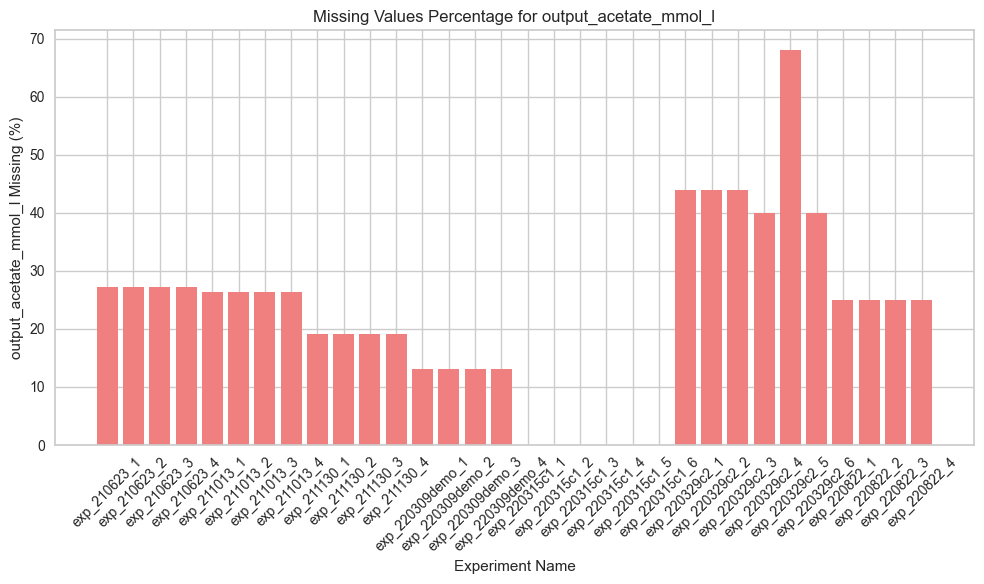

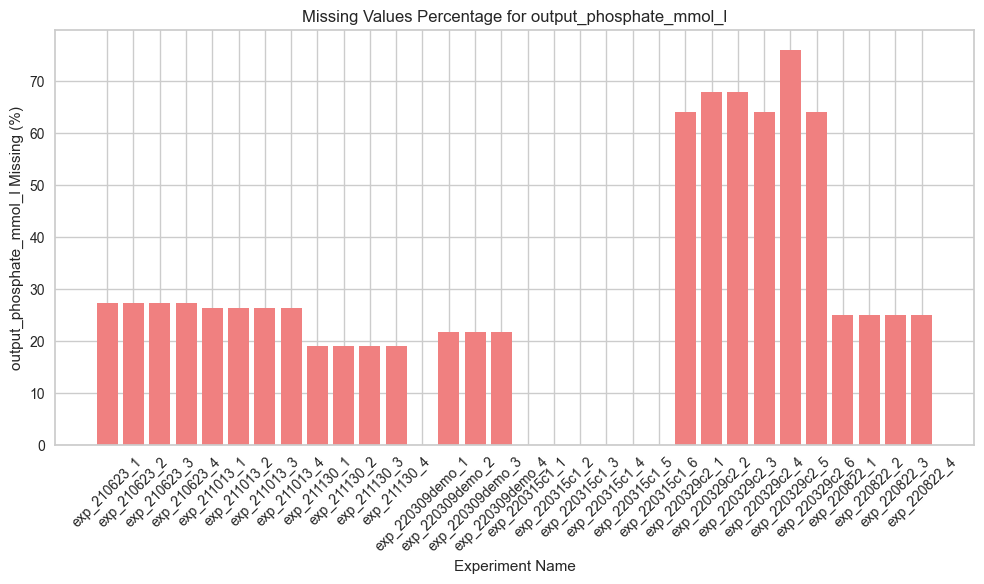

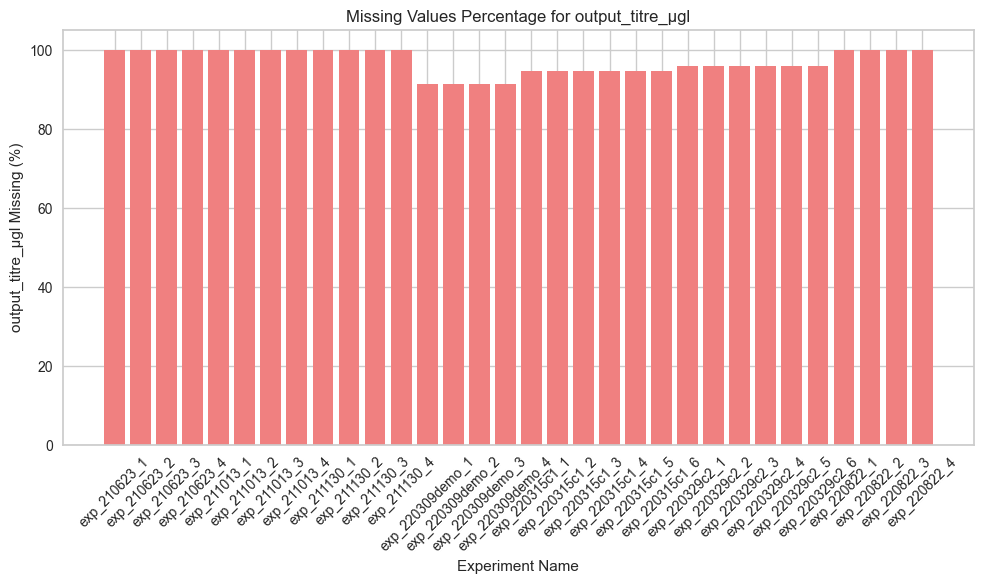

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Preparing data for visualization
summary_data = {'Experiment Name': [],'Total Missing (%)': []}
column_names = set()

for exp in experiment_data:
    summary_data['Experiment Name'].append(exp.name)
    total_cells = exp.size
    missing_values = exp.isnull().sum() / len(exp) * 100  # Calculate percentage of missing values
    for col in exp.columns:
        if col != 'name':
            column_names.add(col)
            summary_data.setdefault(col + ' Missing (%)', []).append(missing_values[col])
    summary_data['Total Missing (%)'].append(exp.isnull().sum().sum() / total_cells * 100)
    
summary_df = pd.DataFrame(summary_data)


def save_csv(df, name_path:str):
    df.to_csv(name_path, index=False) 
    print(f"Data saved to {name_path}")
    
    
save_csv(summary_df, 'data/missing_values.csv')

# # Visualization

# Plotting the total percentage missing for each experiment
plt.figure(figsize=(10, 6))
plt.bar(summary_df['Experiment Name'], summary_df['Total Missing (%)'], color='skyblue')
plt.title('Total Missing Values Percentage per Experiment')
plt.xlabel('Experiment Name')
plt.ylabel('Total Missing Values (%)')
plt.xticks(rotation=60)
plt.tight_layout()
# plt.savefig('images/missing_values/total_missing_values.png')
plt.show()

# Plotting individual bar charts for each column's missing percentage
for column in summary_df.columns:
    if 'Missing (%)' in column and column != 'Total Missing (%)':  # Exclude the total missing percentage column
        plt.figure(figsize=(10, 6))
        plt.bar(summary_df['Experiment Name'], summary_df[column], color='lightcoral')
        plt.title(f'Missing Values Percentage for {column.replace(" Missing (%)", "")}')
        plt.xlabel('Experiment Name')
        plt.ylabel(column)
        plt.xticks(rotation=45)
        plt.tight_layout()
        # plt.savefig(f'images/missing_values/{column}_missing_values.png')
        plt.show()
        

> Correlation Plots

In [16]:
# plt.figure(figsize=(8, 6)) # Set the size of the plot



def plot_corr_matrix_seaborn(df, corr_val = 0.4, save=False):
    
    df = df.rename(columns={'output_OD600': 'OD600nm', 'output_WCW_gl': 'Wet Cell Weight (g/L)', 'output_feed': 'Feed', 'output_feed_%': 'Feed %',
                                    'output_agitation': 'Agitation (rpm)', 'output_air_%': 'Air (%)', 'output_O2': 'Oxygen Percentage', 'output_gasflow': 'Gas Flow',
                                    'output_Ph': 'pH', 'output_Temp': 'Temperature (oC)', 'output_glycerol_gl': 'Glycerol (g/L)', 'output_acetate_mmol_l': 'Acetate (mmol/L)',
                                    'output_phosphate_mmol_l': 'Phosphate (mmol/L)', 'input_Timepoint (hr)': 'Timepoint (hr)', 
                                    'output_D0_%': 'Dissolved Oxygen (%)', 'output_glucose_gl': 'Glucose (g/L)',
                                    'output_titre_µgl': 'Titer (µg/µL)'})
    if hasattr(df, 'name') and df.name:
        title = f"{df.name} Correlation Heatmap"
    else:
        title = "Correlation Heatmap"
    
    corr_matrix = df.select_dtypes(exclude='object').corr()
    if corr_val:
        high_corr = corr_matrix.where(np.abs(corr_matrix) >= corr_val)   # Filter the matrix to keep only correlations with absolute value >= 0.4.
    else :
        high_corr = corr_matrix
    
    # high_corr[high_corr < corr_val] = np.nan    # Set the rest of the values to NaN
    
    plt.figure(figsize=(8, 6))  # Set the size of the plot
    sns.heatmap(high_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.grid(False)  # This removes both vertical and horizontal gridlines

    plt.title(f"{title} for corr > {corr_val}")    # Set the title of the plot
    if save:    # Save the plot if the 'save' parameter is True
        plt.savefig(f"images/correlation_plots/{title}.png")
    plt.show()
    
    
    
def plot_corr_matrix_matplotlib(df, corr_val=0.4, save=False):
    # Compute the correlation matrix
    df = df.rename(columns={'output_OD600': 'OD600nm', 'output_WCW_gl': 'Wet Cell Weight (g/L)', 'output_feed': 'Feed', 'output_feed_%': 'Feed %',
                                    'output_agitation': 'Agitation (rpm)', 'output_air_%': 'Air (%)', 'output_O2': 'Oxygen Percentage', 'output_gasflow': 'Gas Flow',
                                    'output_Ph': 'pH', 'output_Temp': 'Temperature (oC)', 'output_glycerol_gl': 'Glycerol (g/L)', 'output_acetate_mmol_l': 'Acetate (mmol/L)',
                                    'output_phosphate_mmol_l': 'Phosphate (mmol/L)', 'input_Timepoint (hr)': 'Timepoint (hr)', 
                                    'output_D0_%': 'Dissolved Oxygen (%)', 'output_glucose_gl': 'Glucose (g/L)', 
                                    'output_titre_µgl': 'Titer (µg/µL)'})
    
    if hasattr(df, 'name') and df.name:
        title = f"{df.name} Correlation Heatmap"
    else:
        title = "Correlation Heatmap"
    
    corr_matrix = df.select_dtypes(exclude='object').corr()
    if corr_val:
        corr_matrix = corr_matrix.where(np.abs(corr_matrix) >= corr_val)   # Filter the matrix to keep only correlations with absolute value >= 0.4.
    else:
        pass 

    fig, ax = plt.subplots(figsize=(10, 8))

    # Use matshow to create the heatmap
    cax = ax.matshow(corr_matrix, cmap='viridis', interpolation='nearest')

    # Add color bar for reference
    fig.colorbar(cax)

    # Set up the axes with the correct labels
    ax.set_xticks(np.arange(len(corr_matrix.columns)))
    ax.set_yticks(np.arange(len(corr_matrix.columns)))
    ax.set_xticklabels(corr_matrix.columns)
    ax.set_yticklabels(corr_matrix.columns)
    ax.grid(False)  # This removes both vertical and horizontal gridlines

    # Rotate the tick labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    
    # Annotate each cell with the numeric value if above the correlation threshold
    for (i, j), val in np.ndenumerate(corr_matrix):
        if np.abs(val) >= corr_val:
            ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white')

    # Set the title
    title = df.name if hasattr(df, 'name') and df.name else "Correlation Heatmap"
    # ax.set_title(f"{title} for corr > {corr_val}", pad=20)

    # Optionally save the figure
    if save:
        plt.savefig(f"images/correlation_plots/{title}.png")

    plt.show()



df_combined = pd.concat(experiment_data, axis=0)

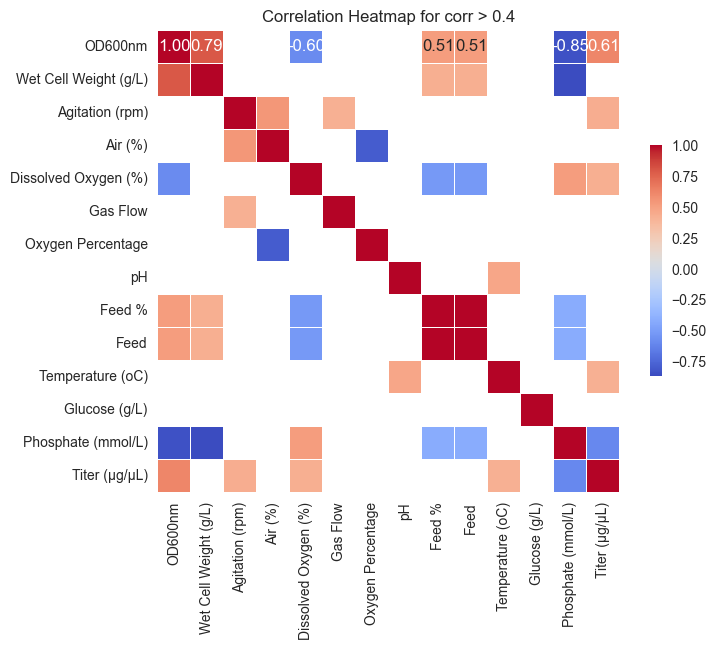

In [17]:
plot_corr_matrix_seaborn(df_combined, corr_val = 0.4, save=False) # using seaborn 

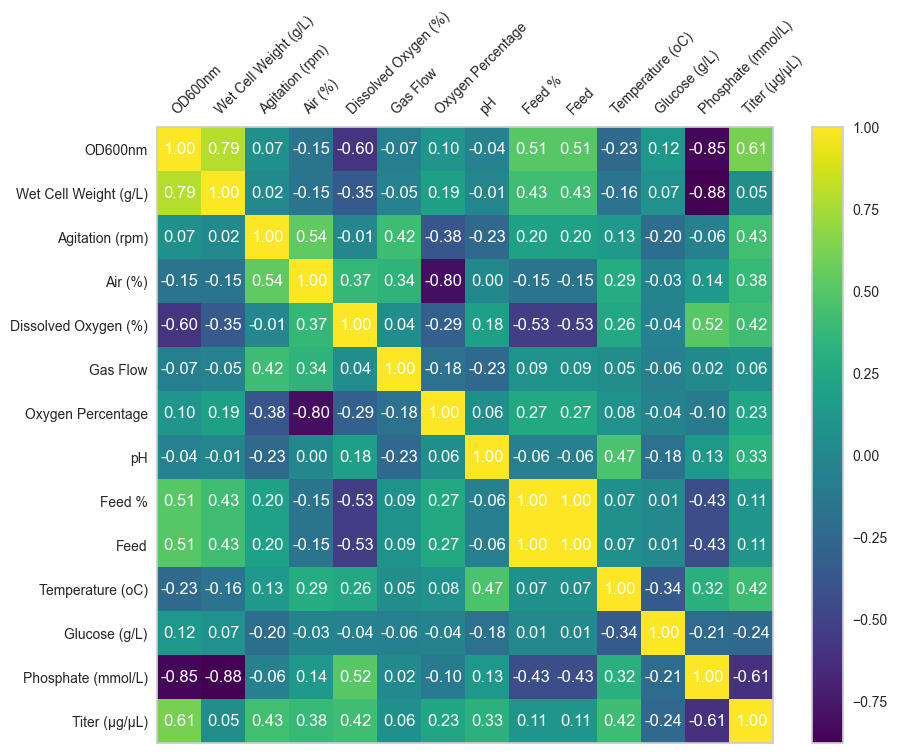

In [18]:
# Call the function with the DataFrame
plot_corr_matrix_matplotlib(df_combined, corr_val = 0, save=False)


In [19]:
# there are some columns that are highly correlated with each other, 

    # output_WCW has a moderate-high correlation with:
        # output_OD600 (high correlation ) 
        # output_feed and output_feed_% (moderate correlation)
        
    # output_OD600 has a moderate-high correlation with:
        # output_WCW (high correlation )
        # output_feed and output_feed_% (moderate correlation)
    
    # output_gasflow has a moderate relationship with:
        # output_air_% (moderate-high correlation)
        # output_agitation (moderate correlation)
             
    # output_air_% and output_agitation have a moderate/strong correlation with each other


In [20]:
## DO NOT DELETE

# for df in experiment_data:
#     plot_corr_matrix(df, corr_val = 0.5, save=False)


In [21]:
# df_combined

In [22]:
df_plots = df_combined.copy()
df_plots.reset_index(inplace=True)

def rename_df(df):
    df = df.rename(columns={'output_OD600': 'OD600nm', 'output_WCW_gl': 'Wet Cell Weight (g/L)', 'output_feed': 'Feed', 'output_feed_%': 'Feed %',
                                        'output_agitation': 'Agitation (rpm)', 'output_air_%': 'Air (%)', 'output_O2': 'Oxygen Percentage', 'output_gasflow': 'Gas Flow',
                                        'output_Ph': 'pH', 'output_Temp': 'Temperature (oC)', 'output_glycerol_gl': 'Glycerol (g/L)', 'output_acetate_mmol_l': 'Acetate (mmol/L)',
                                        'output_phosphate_mmol_l': 'Phosphate (mmol/L)', 'input_Timepoint (hr)': 'Timepoint (hr)', 
                                        'output_D0_%': 'Dissolved Oxygen (%)', 'output_glucose_gl': 'Glucose (g/L)',
                                        'output_titre_µgl': 'Titer (µg/µL)'})
    return df 
df_plots = rename_df(df_plots)
df_plots[['Glycerol (g/L)', 'Acetate (mmol/L)']]= df_plots[['Glycerol (g/L)', 'Acetate (mmol/L)']].apply(pd.to_numeric, errors='coerce' ,axis=1)  # Convert all columns
df_plots.set_index('Timepoint (hr)', inplace=True)                     

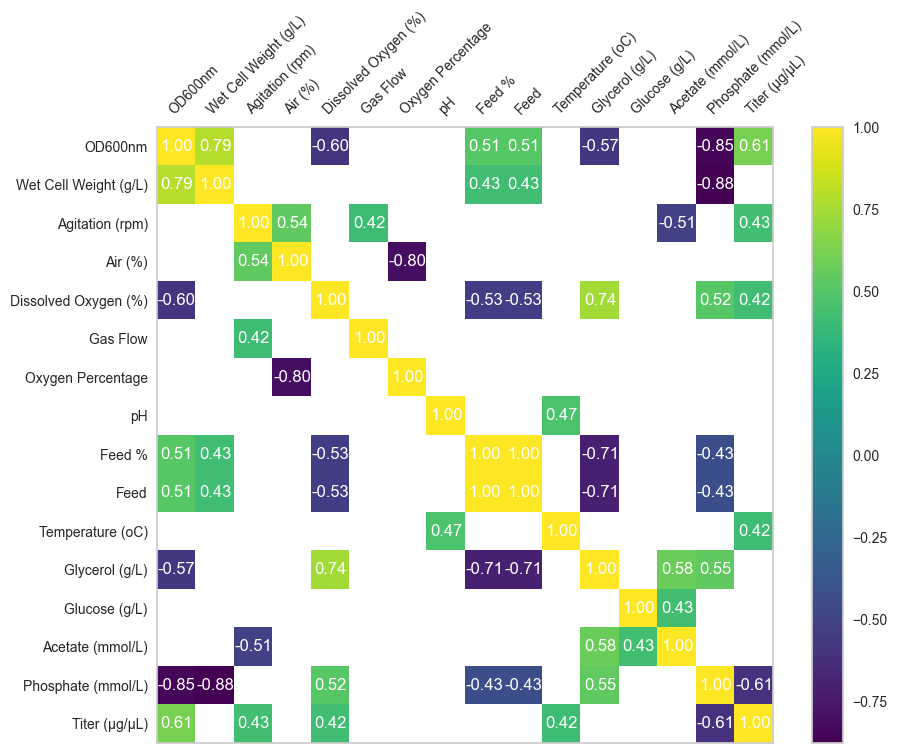

In [23]:
plot_corr_matrix_matplotlib(df_plots, corr_val = 0.4, save=False) 

> Features Ranking

In [24]:
# df_plots

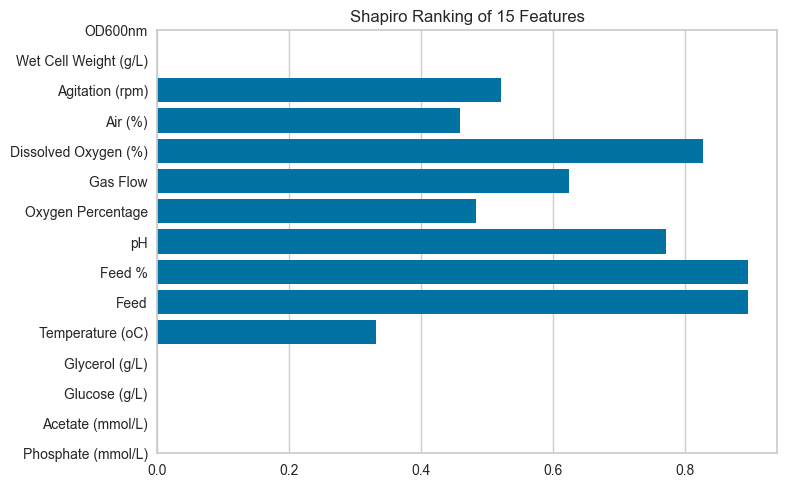

<Axes: title={'center': 'Shapiro Ranking of 15 Features'}>

In [25]:
# Rank 1D
    # A one-dimensional ranking of features utilizes a ranking algorithm that takes into account only a single feature at a time 
    # (e.g. histogram analysis). By default we utilize the Shapiro-Wilk algorithm to assess the normality of the distribution of 
    # instances with respect to the feature. A barplot is then drawn showing the relative ranks of each feature.

from yellowbrick.features import Rank1D


# Instantiate the 1D visualizer with the Shapiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(df_plots.drop(columns = "Titer (µg/µL)"), df_plots['Titer (µg/µL)'])           # Fit the data to the visualizer
visualizer.transform(df_plots.drop(columns = "Titer (µg/µL)"))        # Transform the data
visualizer.show()              # Finalize and render the figure 

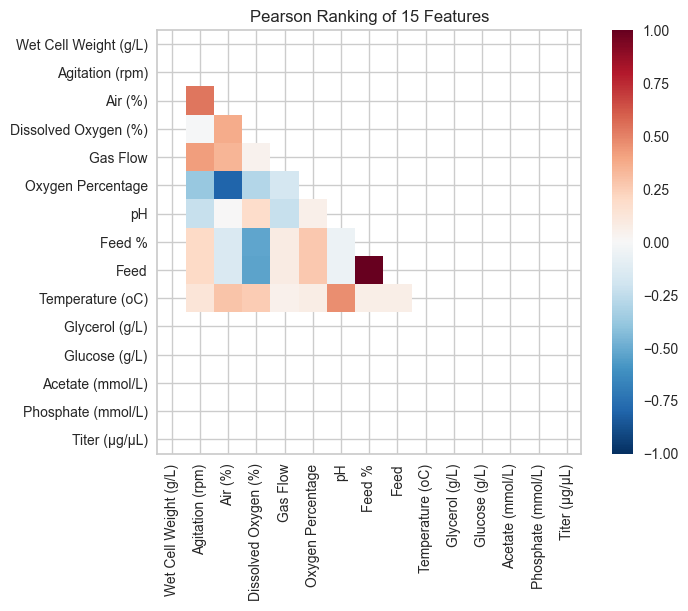

<Axes: title={'center': 'Pearson Ranking of 15 Features'}>

In [26]:
# Rank 2D
    # A two-dimensional ranking of features utilizes a ranking algorithm that takes into account pairs of features at a time 
    # (e.g. joint plot analysis). The pairs of features are then ranked by score and visualized using the lower left triangle of a 
    # feature co-occurence matrix.
    # By default, the Rank2D visualizer utilizes the Pearson correlation score to detect colinear relationships.

from yellowbrick.features import Rank2D


# Instantiate the 1D visualizer with the Shapiro ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(df_plots.drop(columns = "OD600nm"), df_plots['OD600nm'])           # Fit the data to the visualizer
visualizer.transform(df_plots.drop(columns = "OD600nm"))        # Transform the data
visualizer.show()              # Finalize and render the figure

> Feature Importance

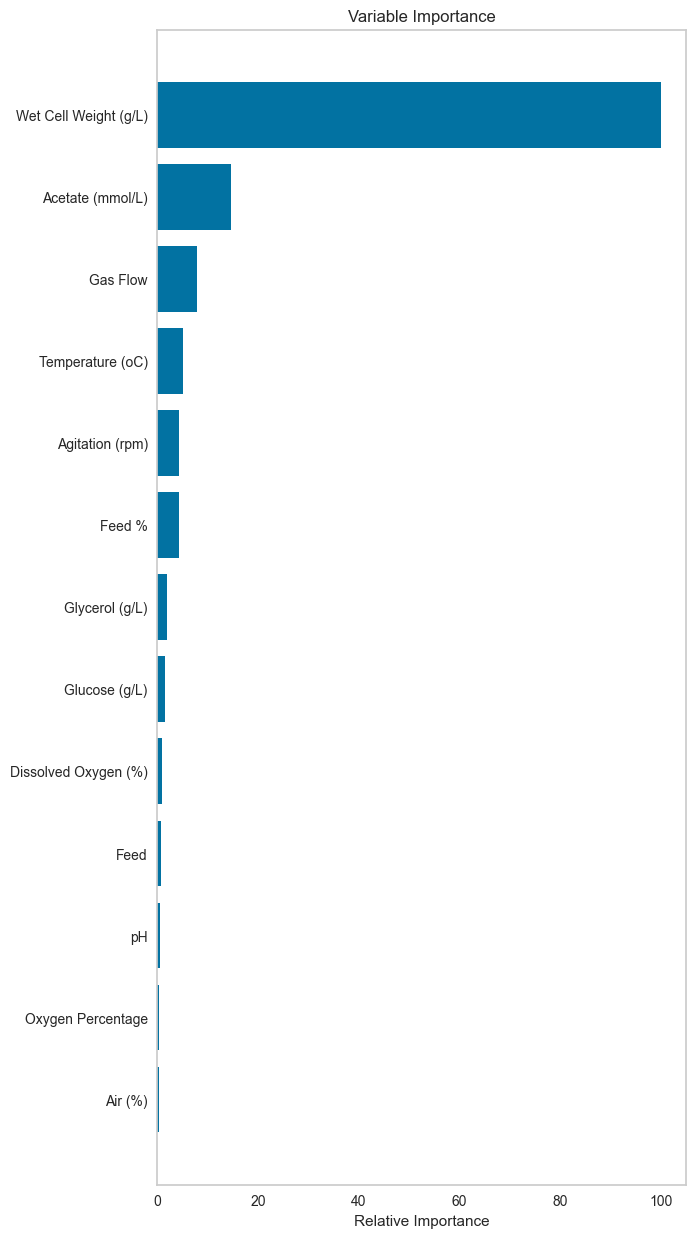

In [27]:
#access the most important features in the model
from sklearn.ensemble import RandomForestRegressor
# Feature Importance



def feature_importance(model,X):
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.grid(False)
    plt.show()

model = RandomForestRegressor(n_estimators=10)

data_combined = pd.read_csv('data/use_to_code/combined_data_extra.csv', index_col='input_Timepoint (hr)', parse_dates=True)
data_combined = rename_df(data_combined) 
model.fit(data_combined.drop(columns = ["OD600nm", 'Feed']), data_combined['OD600nm'])
feature_importance(model, data_combined.drop(columns = "OD600nm"))  




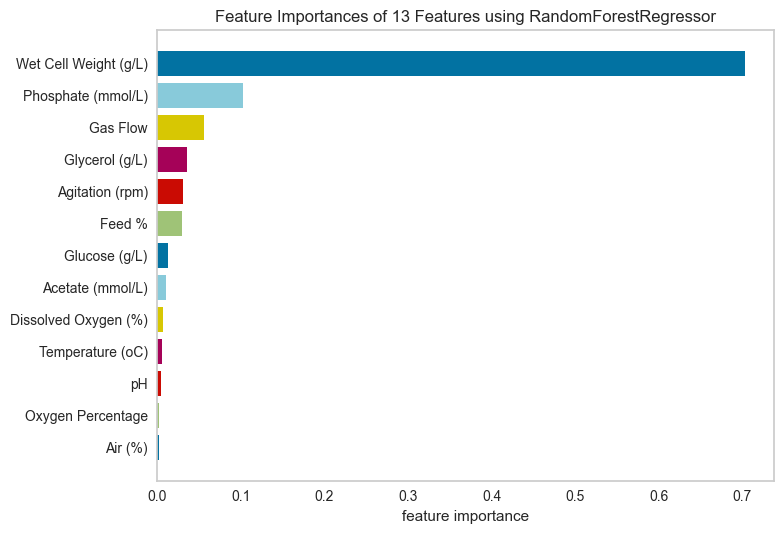

<Axes: title={'center': 'Feature Importances of 13 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [28]:

#OR
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model, relative=False)
viz.fit(data_combined.drop(columns = ['Feed', 'OD600nm']), data_combined['OD600nm'])
# Access the axes object and remove gridlines
viz.ax.grid(False)
viz.show()

### Time Series Plots

> Feed Strategy

In [29]:
def plot_timeseries (experiment_groups, cols_to_plot, marker = '*' , linestyle='-', color=None, save = False):
    for output_col in cols_to_plot:
        fig, ax = plt.subplots(2, 4, figsize=(20, 10))  # Adjusted figsize for better visibility

        for i, exp_dfs in enumerate(experiment_groups):
            for j, df in enumerate(exp_dfs):
                # Calculate row and column index for subplots
                row = i // 4  # Integer division to get the row index
                col = i % 4  # Modulus to get the column index
                
                df = df.rename(columns={'output_OD600': 'OD600nm', 'output_WCW_gl': 'Wet Cell Weight (g/L)', 'output_feed': 'Feed', 'output_feed_%': 'Feed %',
                                    'output_agitation': 'Agitation (rpm)', 'output_air_%': 'Air (%)', 'output_O2': 'Oxygen Percentage', 'output_gasflow': 'Gas Flow',
                                    'output_Ph': 'pH', 'output_Temp': 'Temperature (oC)', 'output_glycerol_gl': 'Glycerol (g/L)', 'output_acetate_mmol_l': 'Acetate (mmol/L)',
                                    'output_phosphate_mmol_l': 'Phosphate (mmol/L)', 'input_Timepoint (hr)': 'Timepoint (hr)', 
                                    'output_D0_%': 'Dissolved Oxygen (%)', 'output_glucose_gl': 'Glucose (g/L)', 
                                    'output_titre_µgl': 'Titer (µg/µL)'})
                # Plot the specified output column on the subplot
                try:
                    if df[output_col].isnull != True:
                        ax[row, col].plot(df.index, df[output_col], label=output_col, marker = marker, linestyle=linestyle, color=color)
                        ax[row, col].set_xlabel('Experiment Time (hr)')
                        ax[row, col].set_ylabel(output_col)  # Set ylabel specific to the output column
                        
                        # label=f"{output_col} ({getattr(df, 'name', f'DataFrame {j+1}')})"
                        label = [f"{output_col} ({getattr(df, 'name', f'DataFrame {j+1}')})" for df in exp_dfs]
                        ax[row, col].legend(labels = label, loc='upper left')
                        ax[row, col].grid(False)  # Turn off the grid to improve visibility
                        
                        
                        # Use the DataFrame's 'name' attribute for the subplot title, if available
                        exp_name = getattr(df, 'name', f'Exp {i+1}')
                        # ax[row, col].set_title(f"{output_col} distribution for {'_'.join(exp_name.split('_')[:2])}")
                        ax[row, col].set_title(f"{output_col} Distribution for Experiment")
                
                except:
                    pass
        if save:
            plt.savefig(f"images/timeseries_plots/{output_col}_timeseries.png")
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()  # Display the plot for the current output column

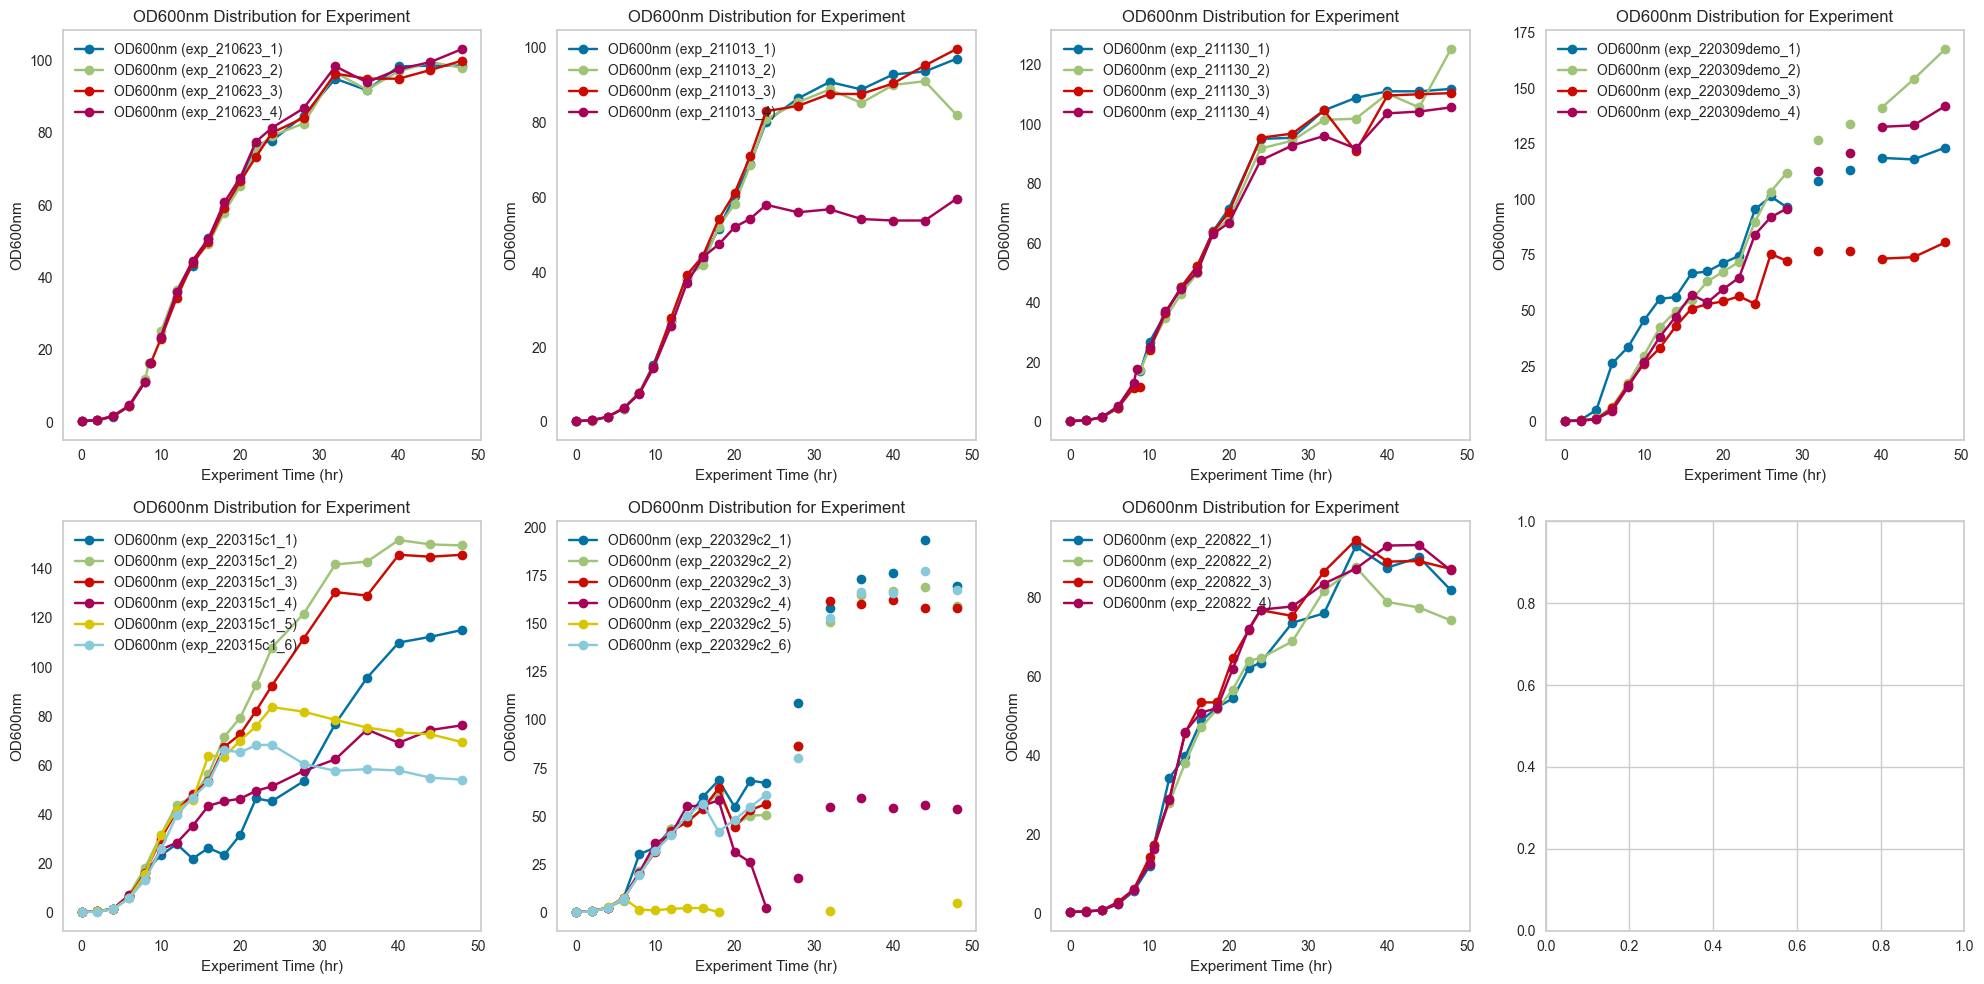

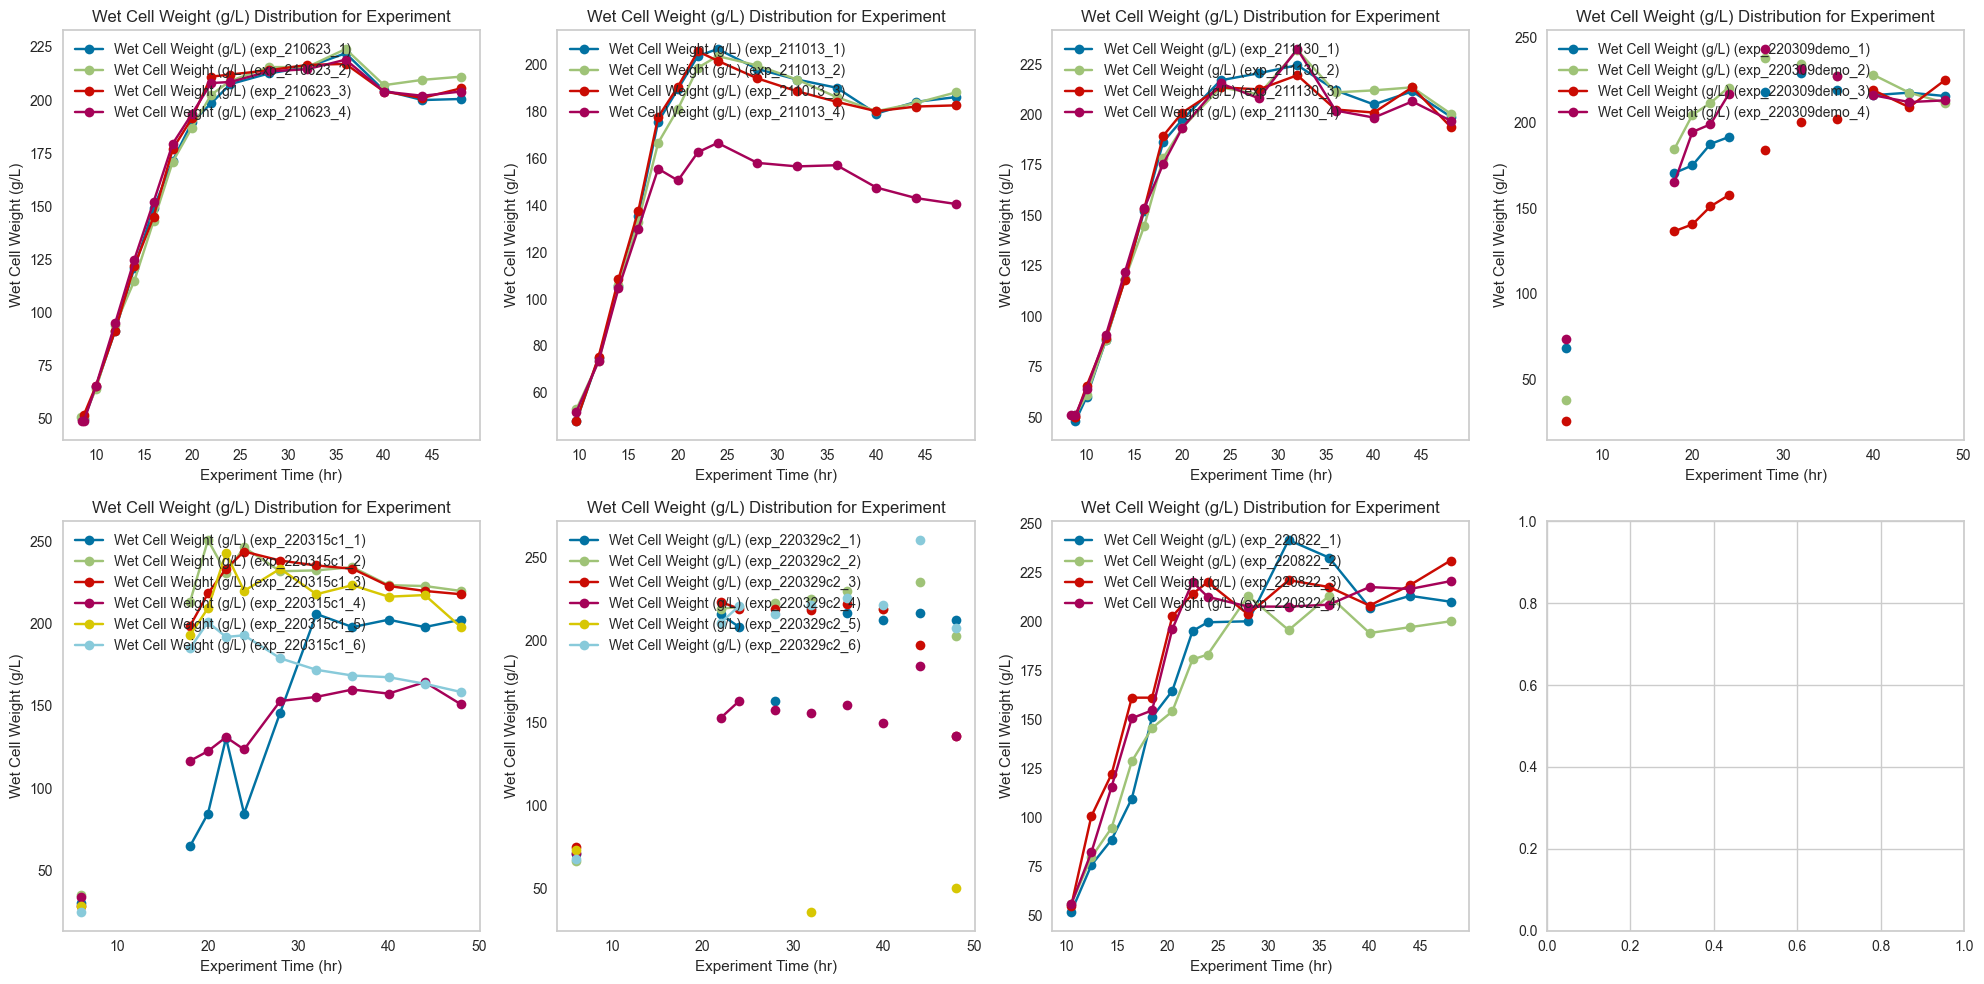

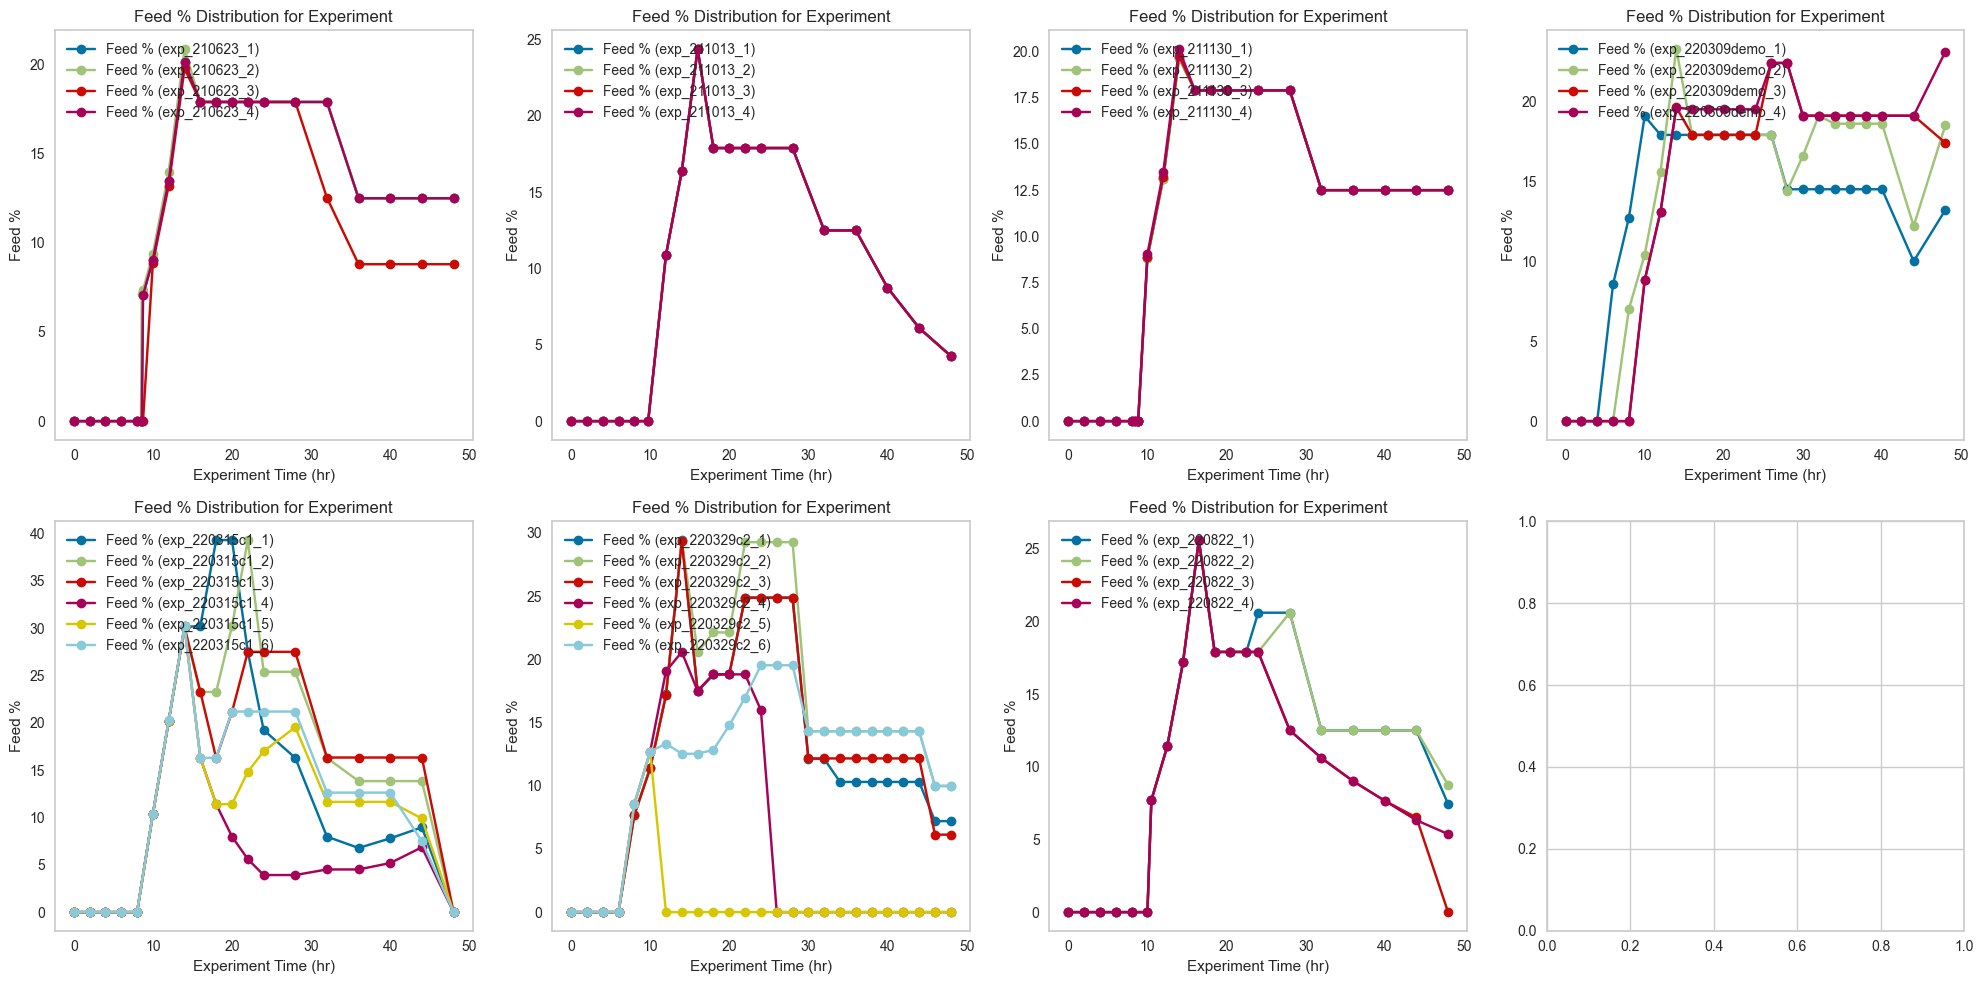

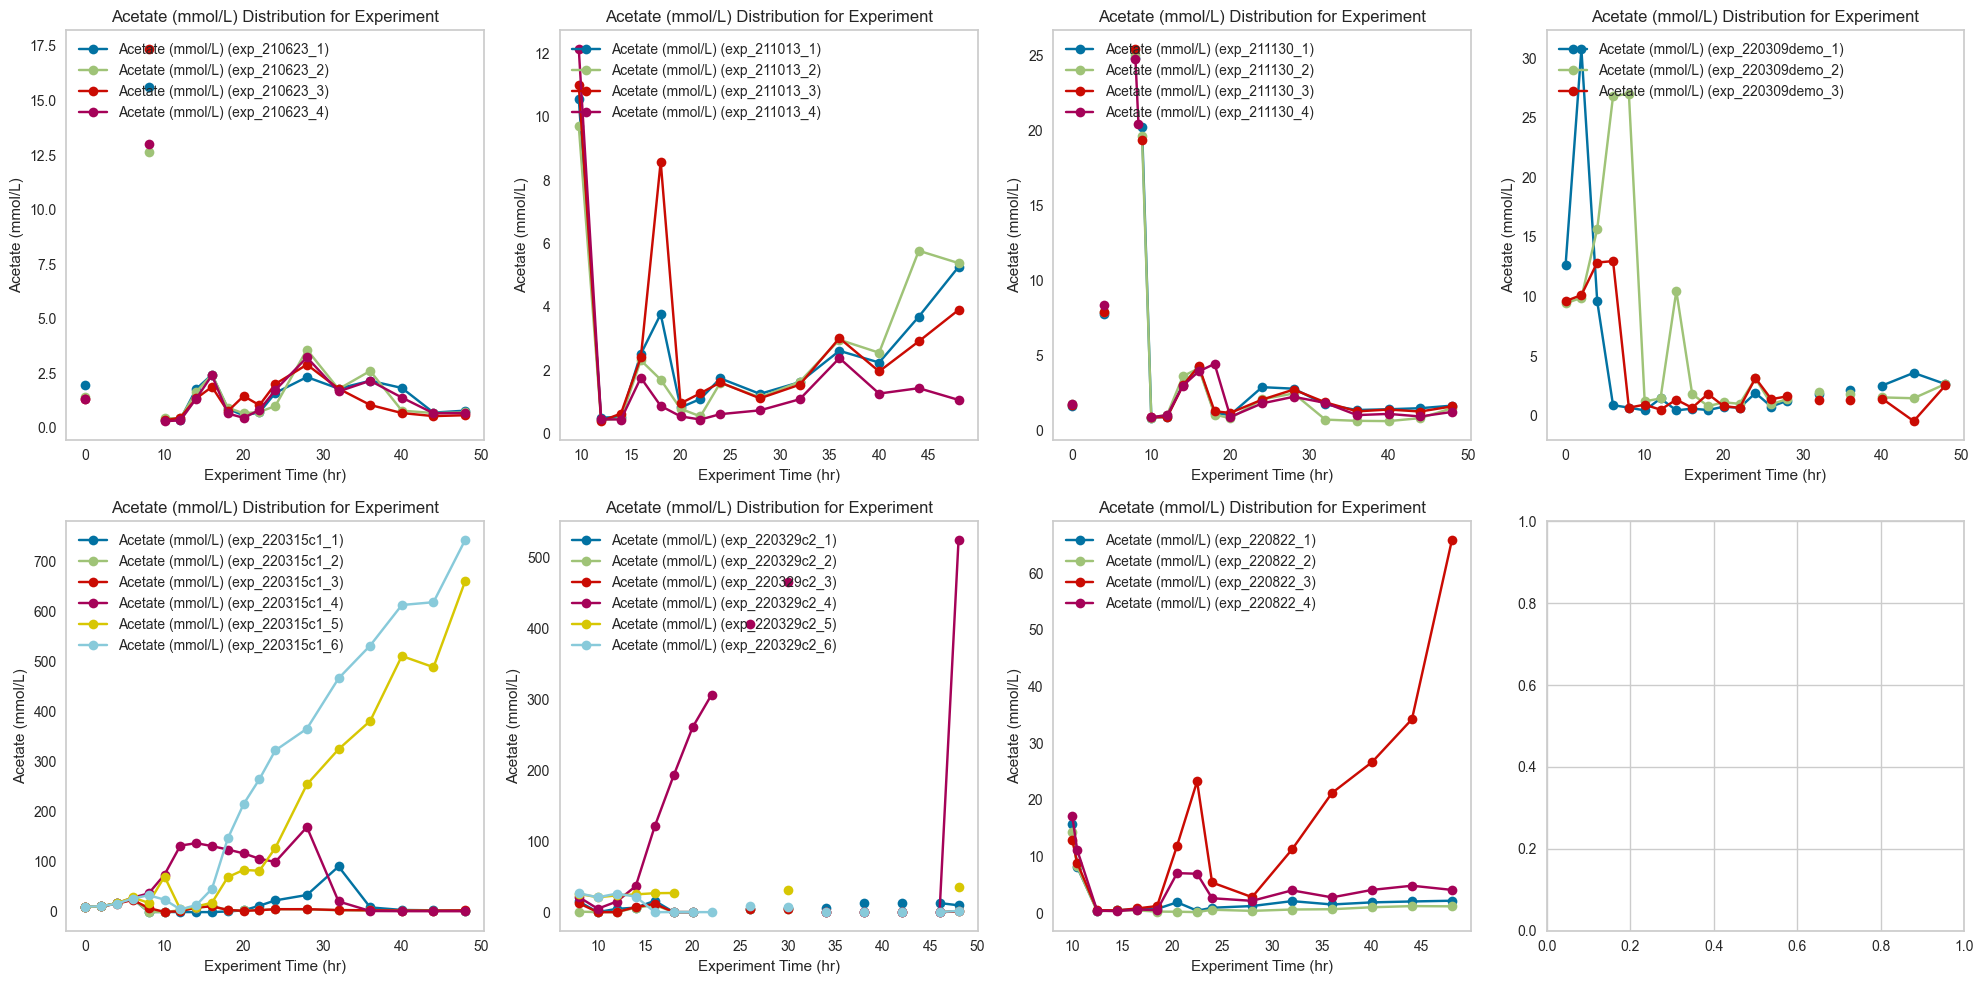

In [30]:
# plot_timeseries(experiment_groups, ['output_feed_%', 'output_acetate_mmol_l', 'output_glucose_gl'], marker = 'o', linestyle='-', color=None, save = False)

plot_timeseries(experiment_groups, ['OD600nm', 'Wet Cell Weight (g/L)', 'Feed %', 'Acetate (mmol/L)'], marker = 'o', linestyle='-', color=None, save = False)


In [31]:
# # 1.      Feed Changes: 

#             # a. Composition of Feed: 
#                 # Other than glucose, are there any other components included in the feed at each time point? If so, what are they 
#                 # and what proportions are used? 

#                     Ans: No, only 50% glucose solution. 

#             # b. Decision Factors for Feed Changes: 
#                 # Could you describe the criteria or factors that inform how the feed percentage is adjusted throughout the experiment? 
#                 # For instance, what prompts a change from 10.6% to 20.21%, and then to 7.9% at the specified hours? 

#                     Ans: Acetate production above 5mmol/L and would like to keep the glucose less than 5g/L. 

#             # c. Feed Calculation Variables: 

#                 # i. How exactly is the 'feed' variable quantified? Is it measured in volume, weight, or concentration? 

#                      Ans: Feed rate ml/min, Feed rate ml/min;  measured in concentration. Feed is measured using a Cedex to provide 
#                      concentration of glucose(g/L). The feed rate(mL/min)  is set as a  in percentage (%) for our pumps. 
#                      It's calculated from a ratio, as explained in c ii.. Using #14 tubing the rate is 3.4mL/min at 100%. 
#                      If you want the feed at say 1mL/min...3.4/100=1/x; x=29.4%, The pump would be set at 29.4%. 

#                 # ii. How is the 'feed %’ calculated? Is it relative to the batch volume, or another metric? 

#                     Ans: 3.4 ml/min at 100%, do ratio. 

#                 # iii. The input data shows that ‘Glucose’ is the only feed type. However, the output section has both columns 
#                     # for ‘glucose (g/L)’ and ‘feed’, which could mean that glucose is one of the many components of the feed. 
#                     # Could you share other components of the feed and their proportions? 

#                     Ans: No other components. 

In [32]:
[df.columns for df in experiment_data][1]

Index(['output_OD600', 'output_WCW_gl', 'output_agitation', 'output_air_%', 'output_D0_%', 'output_gasflow', 'output_O2', 'output_Ph', 'output_feed_%', 'output_feed', 'output_Temp', 'output_glycerol_gl', 'output_glucose_gl', 'output_acetate_mmol_l', 'output_phosphate_mmol_l', 'output_titre_µgl'], dtype='object')

> Optical Density (OD600nm) and Wet Cell Weight (WCW_gl)

In [33]:
# Optical Density at 600 nm (OD600):

    # OD600 measures the turbidity or cloudiness of a microbial culture by assessing the light absorption at 600 nm wavelength. 
    # This is a rapid and non-destructive method to estimate the cell density in the culture.
    
    # An increase in OD600 typically indicates cell growth, and by extension, it can be inferred that there's ongoing protein production 
    # if the cells are engineered to express a recombinant protein. However, OD600 doesn't directly measure protein expression; 
    # it simply provides an estimate of the culture's cell density.
    
    # OD600 is particularly useful for determining the appropriate time to induce protein expression in inducible expression systems 
    # and for ensuring reproducibility between cultures by standardizing the cell density at the time of induction.


# Wet Cell Weight (WCW):

    # WCW is measured by collecting a known volume of culture, centrifuging it to pellet the cells, and then weighing the wet pellet 
    # after removing the supernatant. It provides a direct measure of the biomass produced in the culture.
    
    # Similar to OD600, WCW is an indirect measure of recombinant protein production. An increase in WCW indicates cell growth, 
    # which under the right conditions, correlates with an increase in recombinant protein production.
    
    # WCW can be particularly useful for processes that are scaled up for industrial production, where biomass yield can directly 
    # impact downstream processing and overall yields of the desired protein.

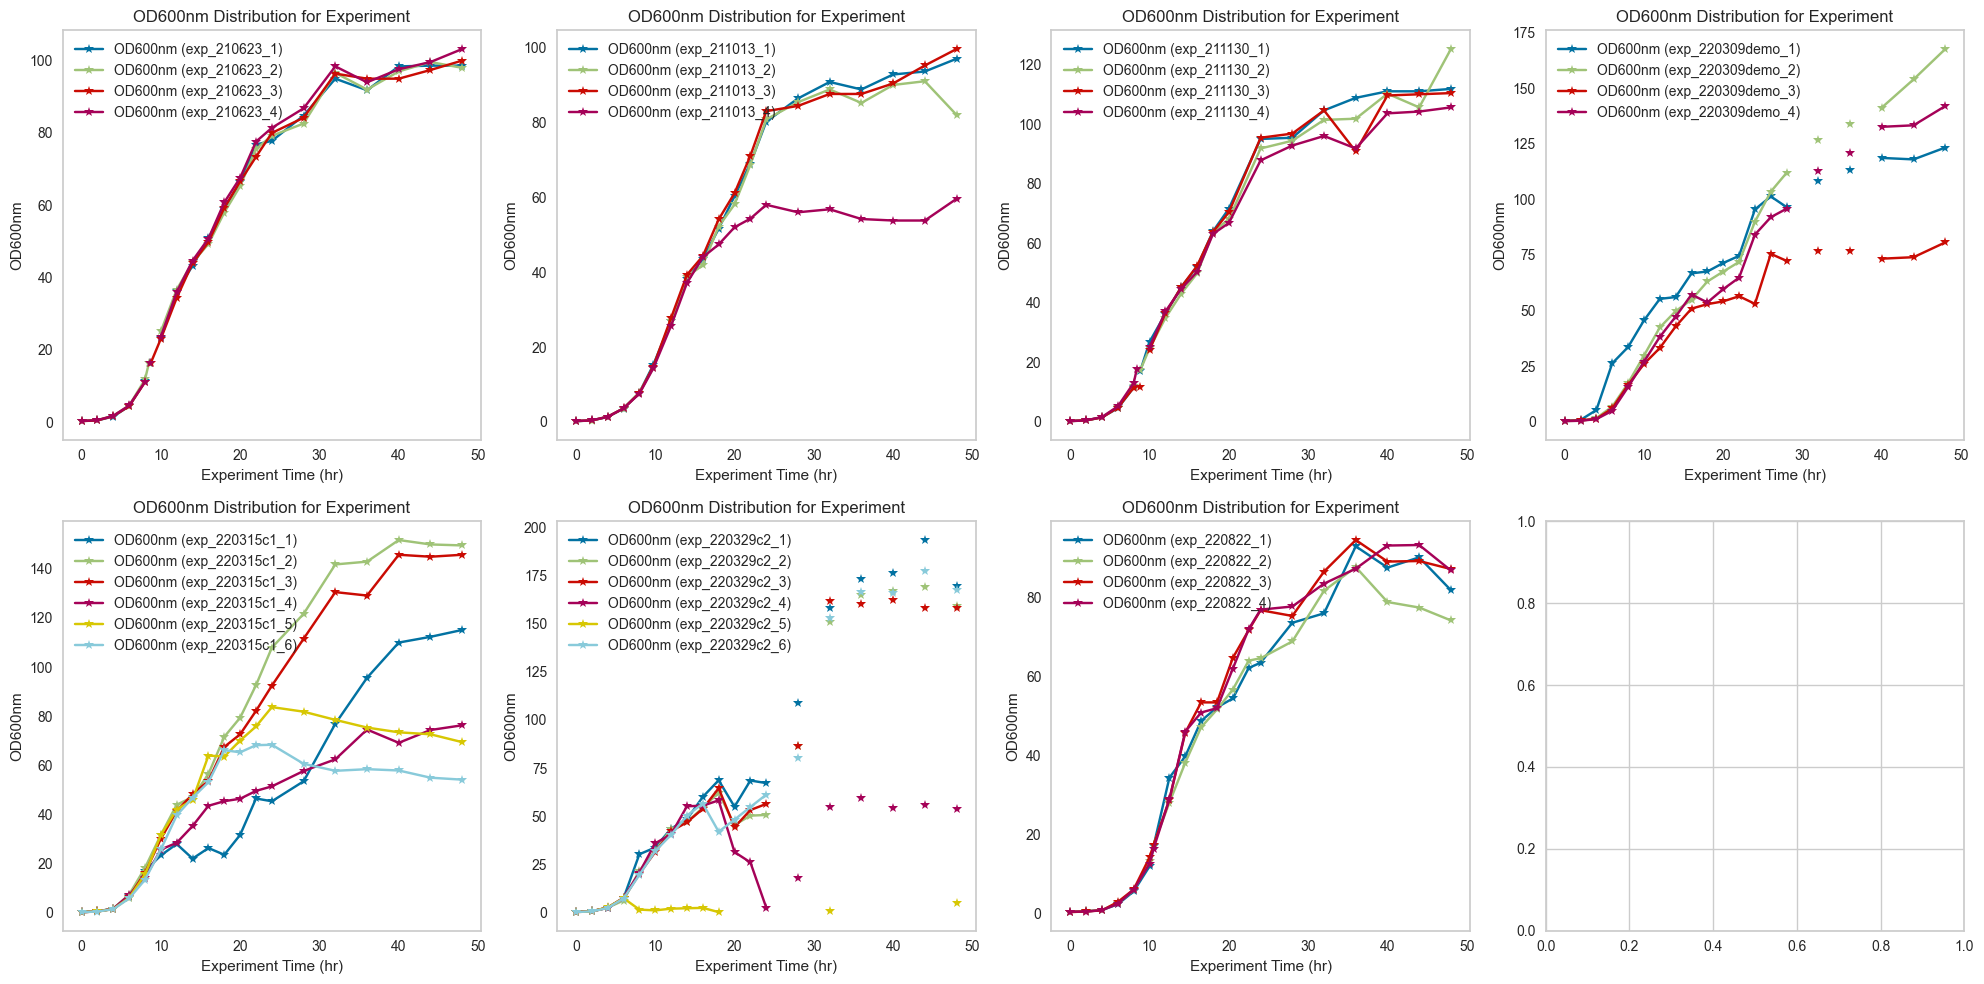

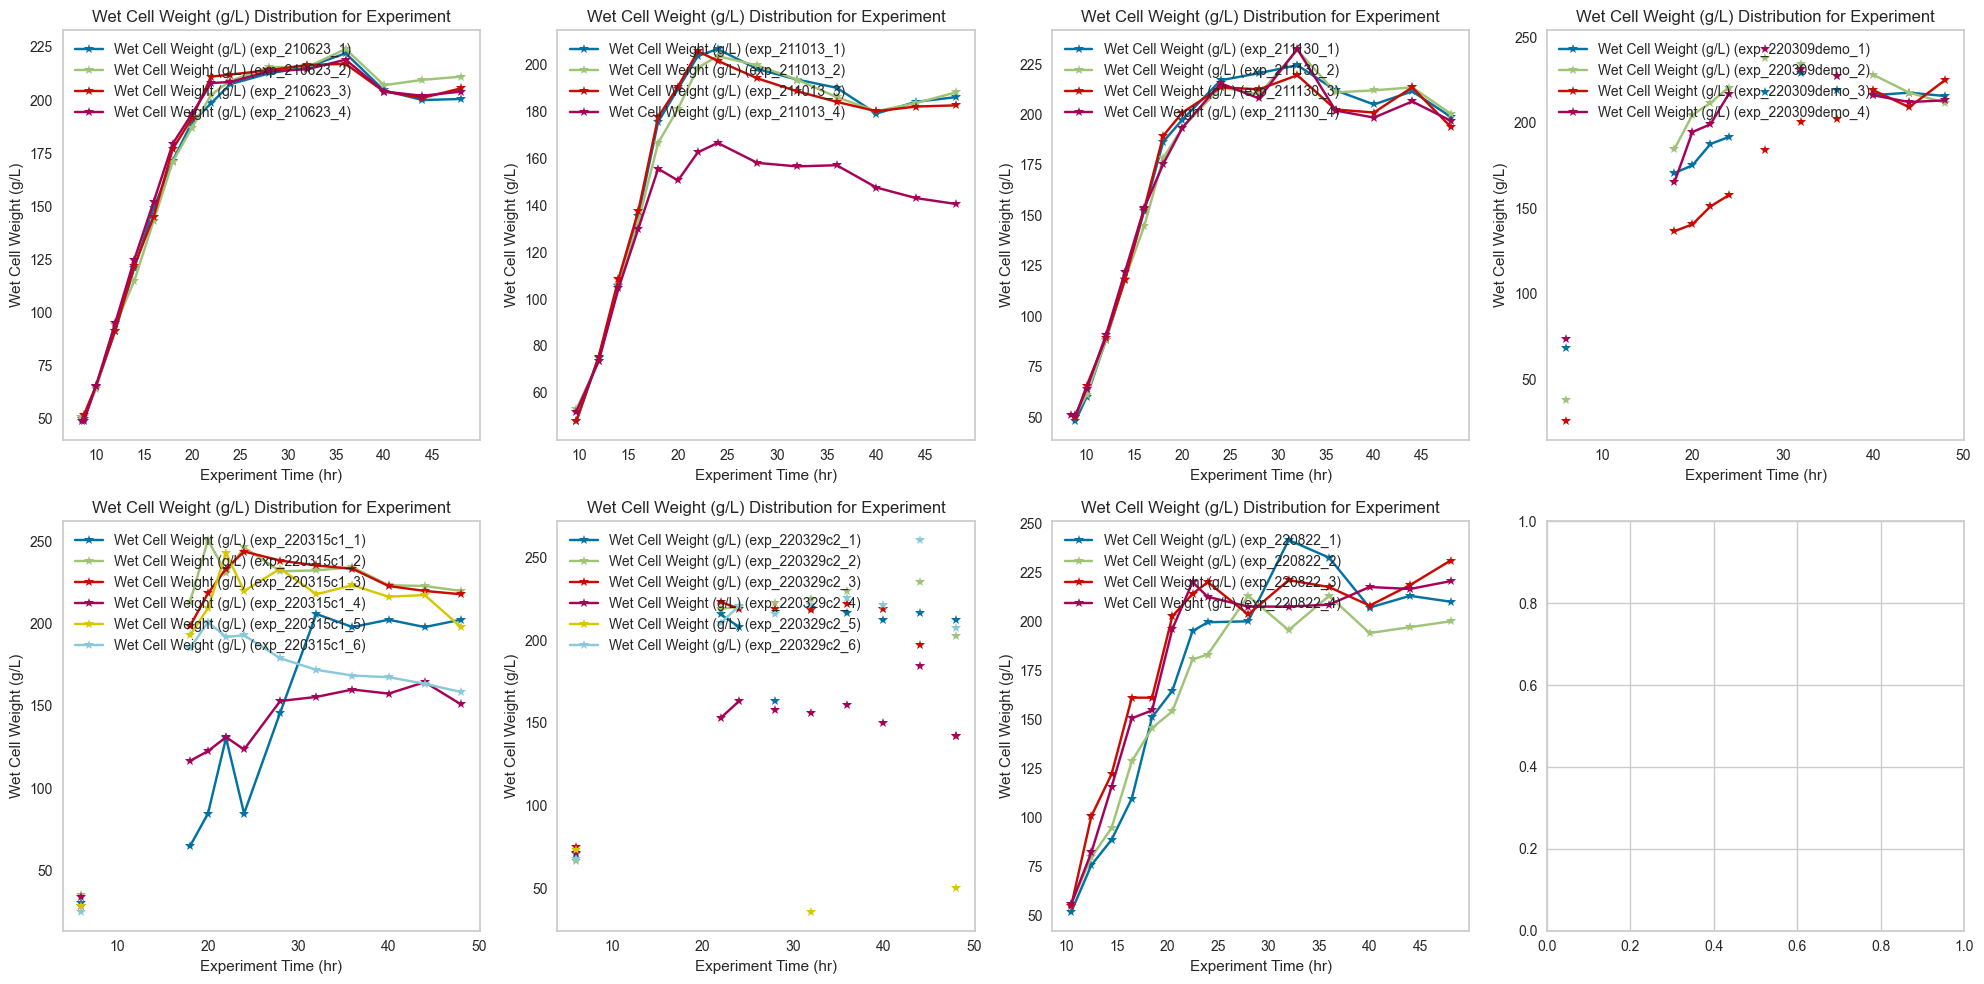

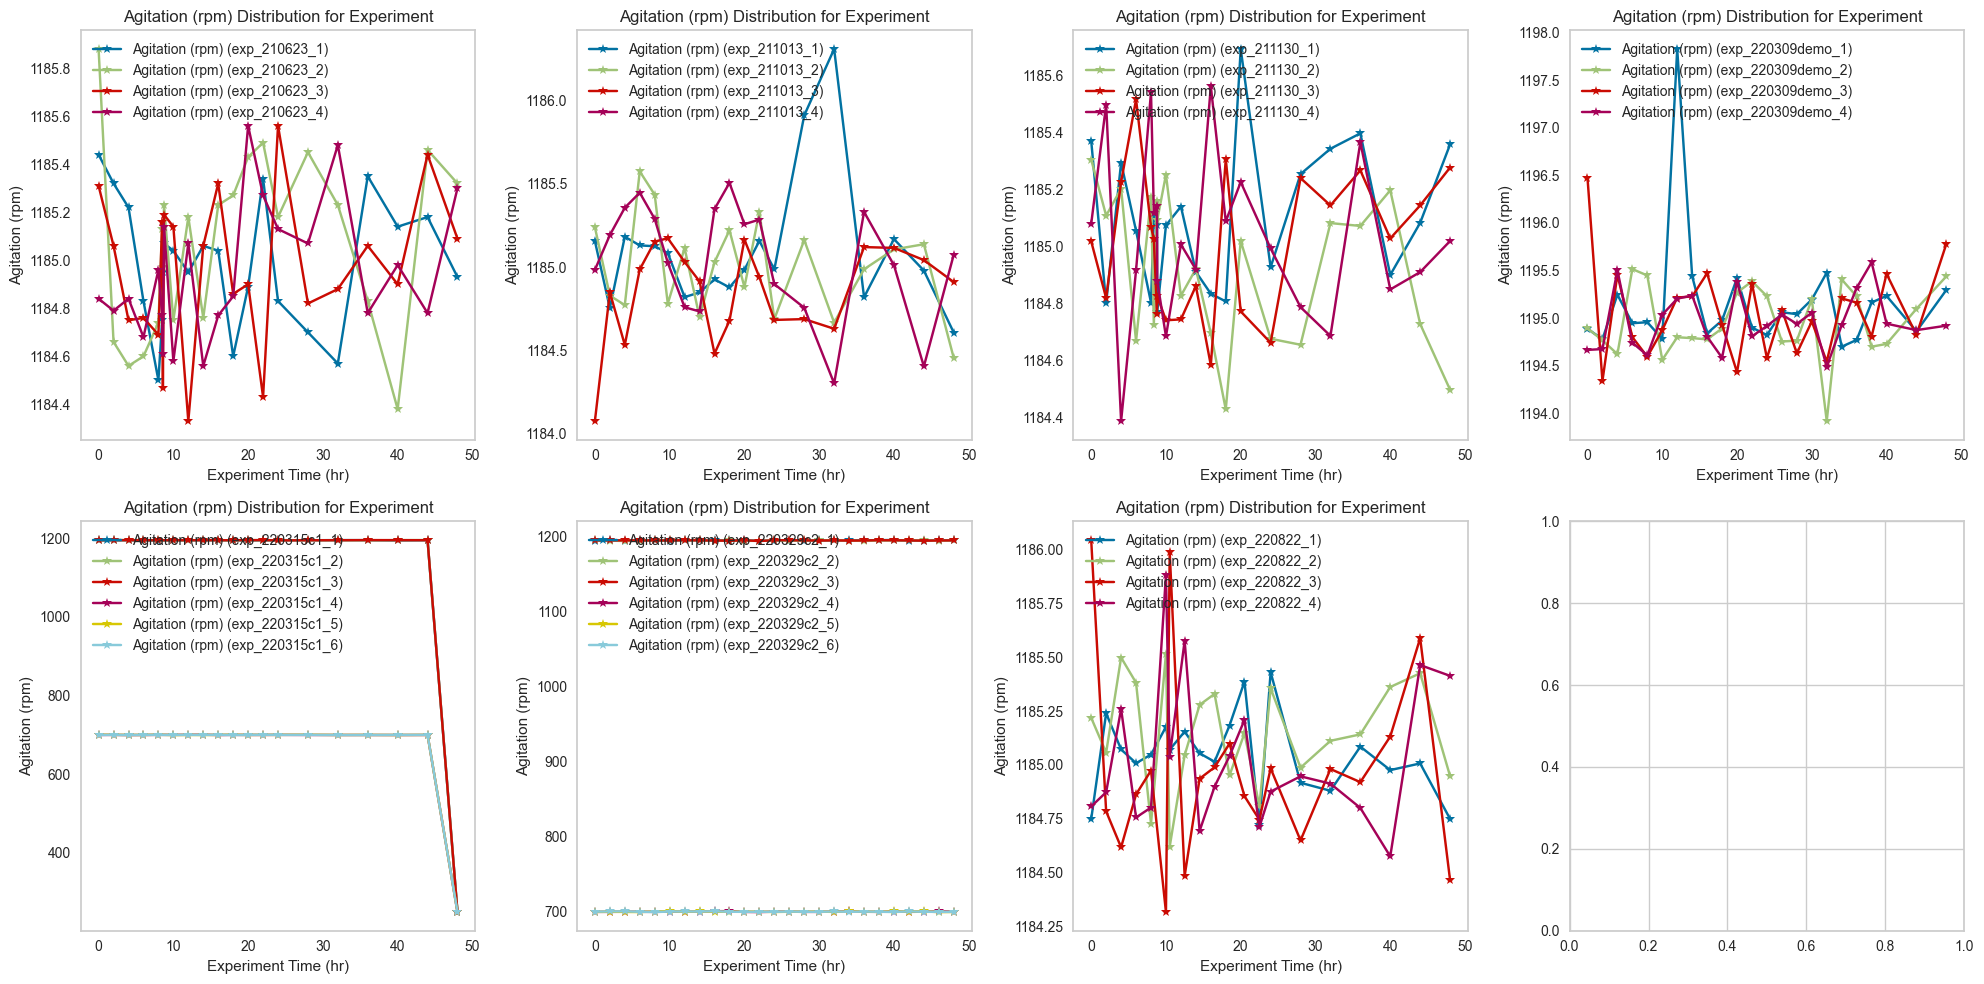

In [34]:
import matplotlib.pyplot as plt

# Assuming 'experiments' is a list of lists containing your DataFrames, and each DataFrame has a 'name' attribute
output_columns = ['OD600nm', 'Wet Cell Weight (g/L)', 'Agitation (rpm)']

plot_timeseries(experiment_groups, output_columns, save = False)


> Nutrients Concentrations and its impact on Protein Production (OD600, WCW_gl)

In [35]:
# output_glucose_gl (Glucose concentration): 
    # As a primary carbon source, glucose availability directly affects cell growth and energy metabolism. However, excessive glucose 
    # can lead to undesirable by-products like acetate in E. coli, which can inhibit growth and protein production.
    
# output_glycerol_gl (Glycerol concentration): 
    # Glycerol can be used as an alternative carbon source in some fermentation processes, influencing cell growth and protein expression 
    # differently than glucose.

In [44]:
filtered_dfs = []
for df in experiment_groups:
    try:
        if df['output_titre_µgl'].notna().all():
            filtered_dfs.append(df)
    except TypeError as e:
        print(f"Error with data type: {type(df)}")


Error with data type: <class 'list'>
Error with data type: <class 'list'>
Error with data type: <class 'list'>
Error with data type: <class 'list'>
Error with data type: <class 'list'>
Error with data type: <class 'list'>
Error with data type: <class 'list'>


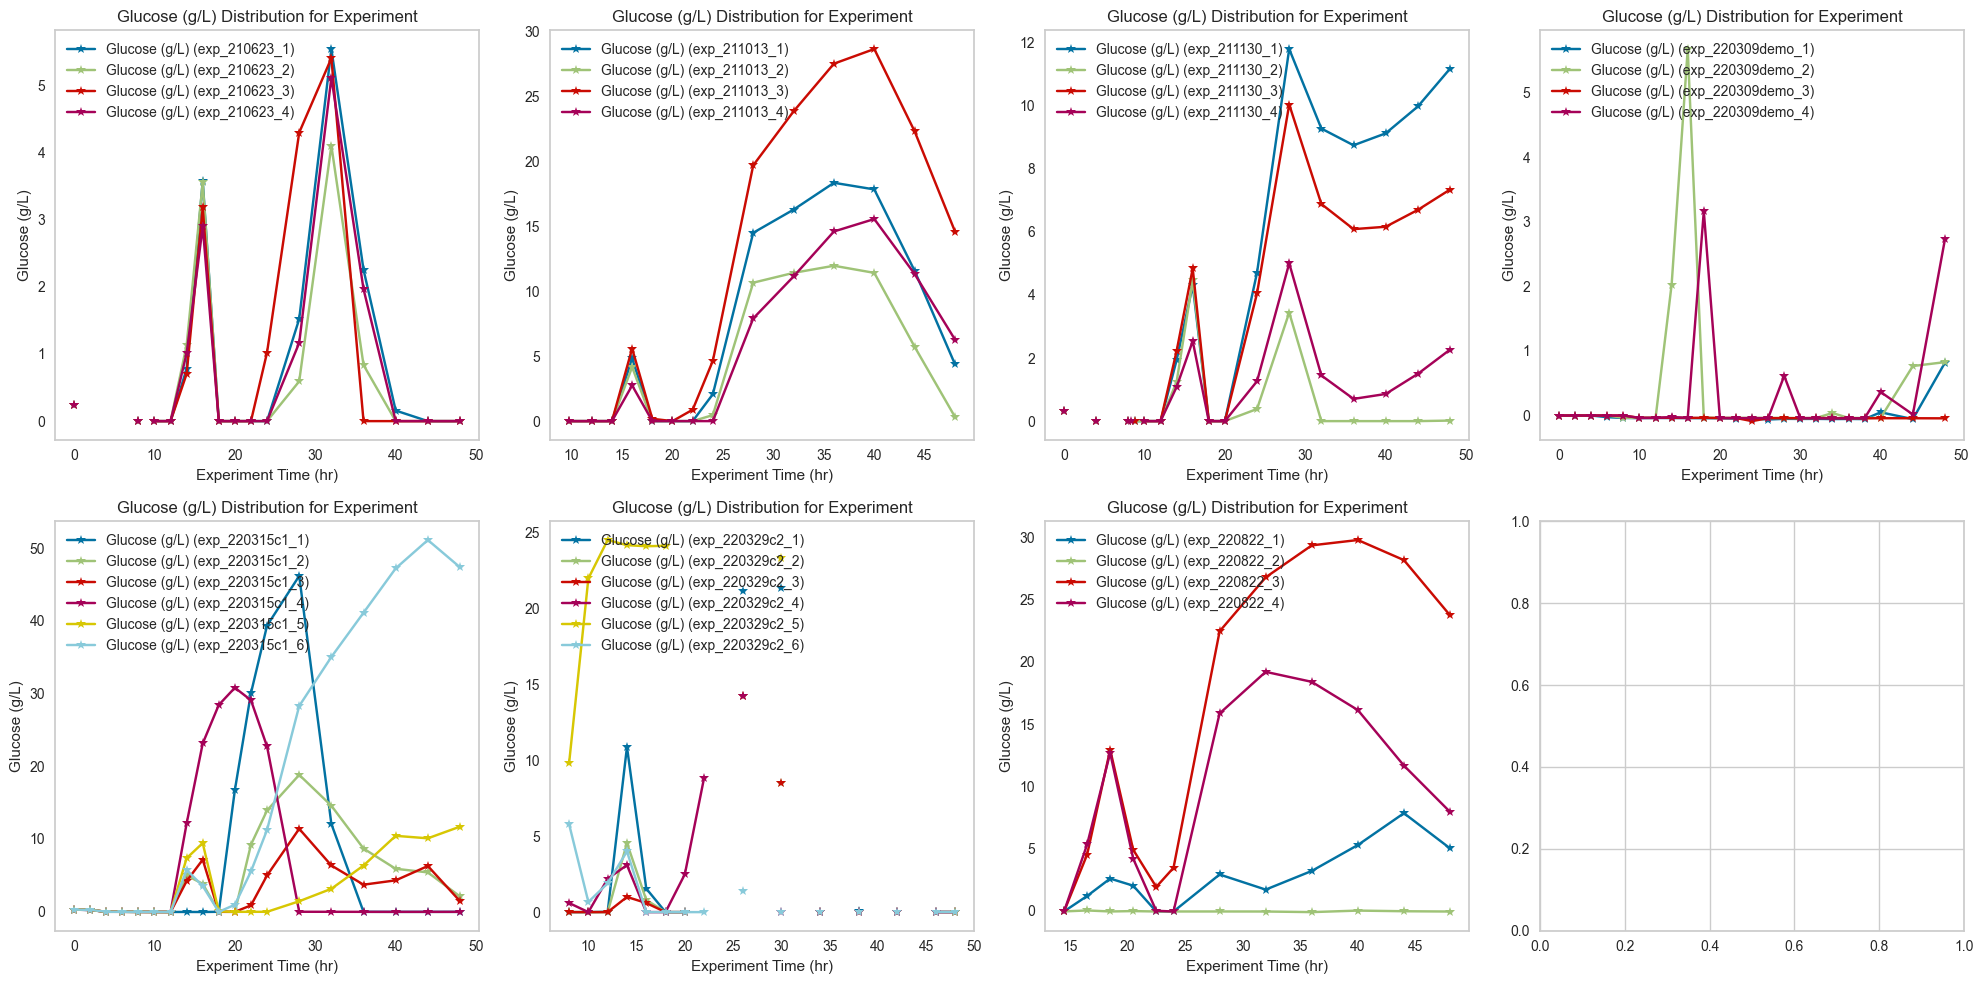

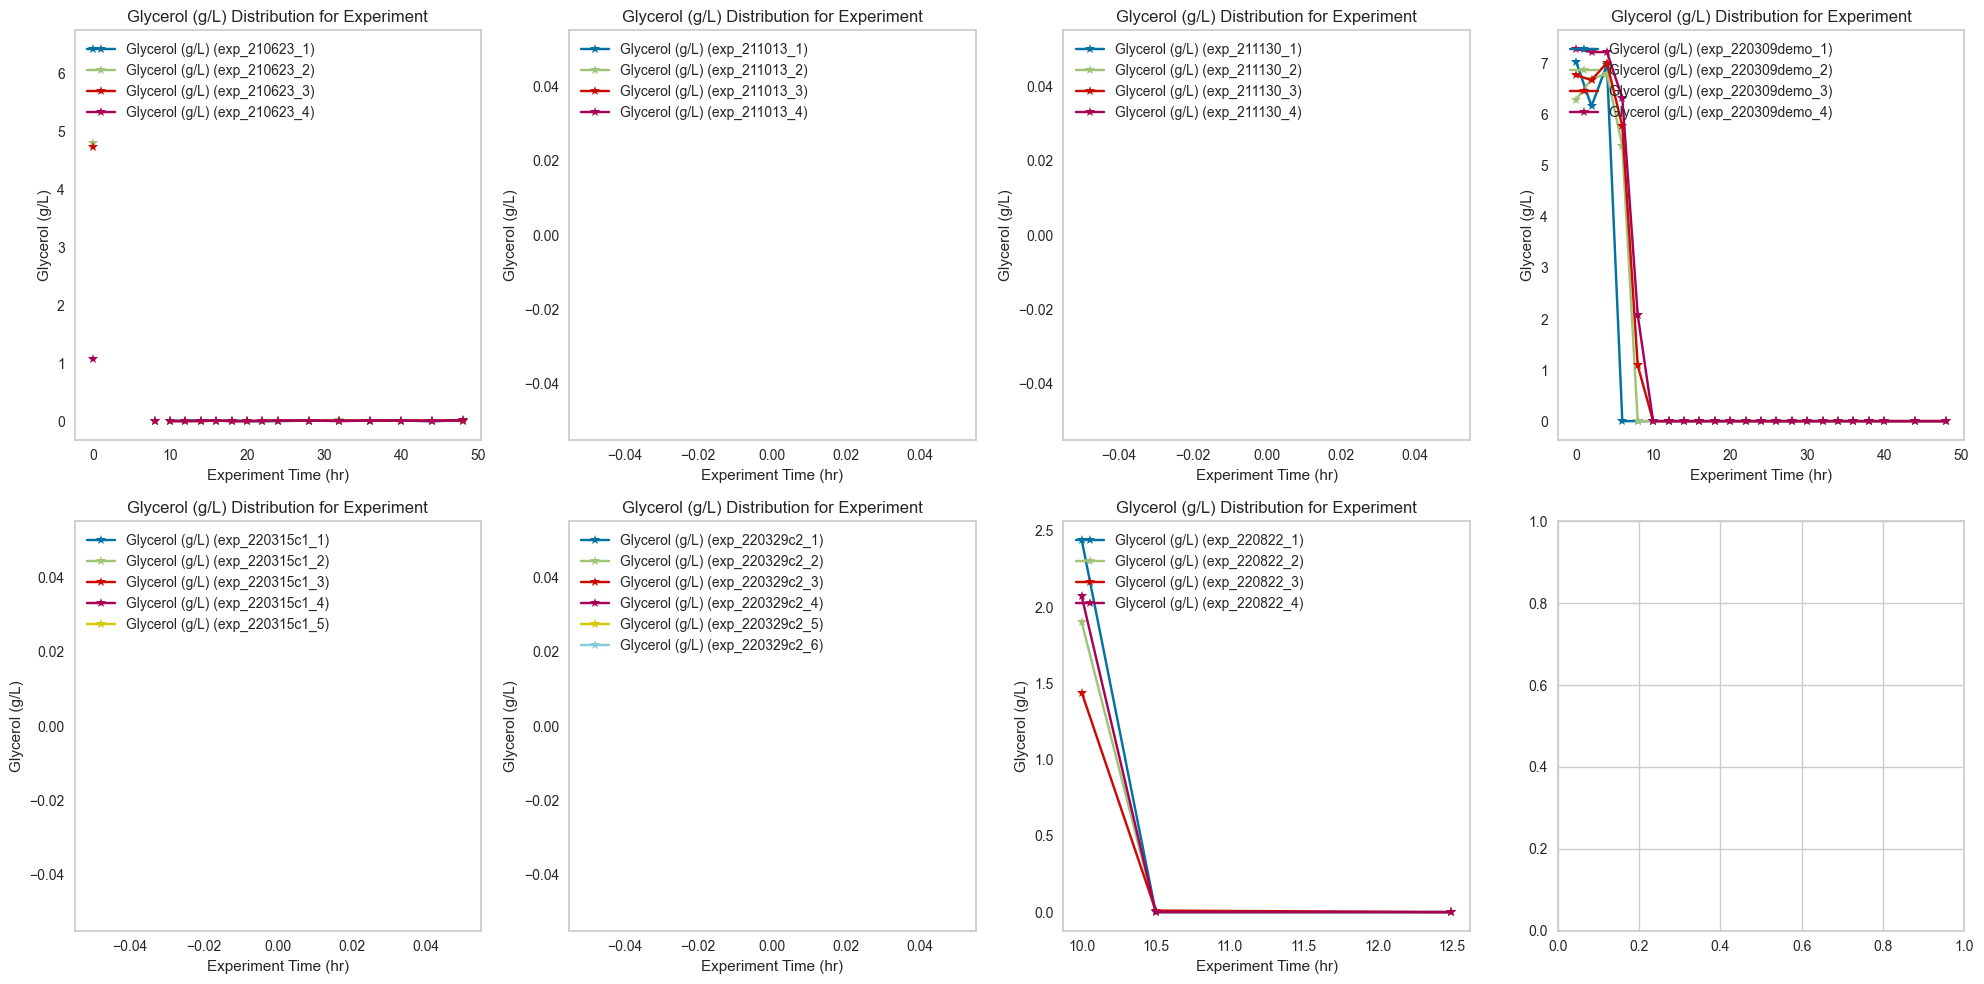

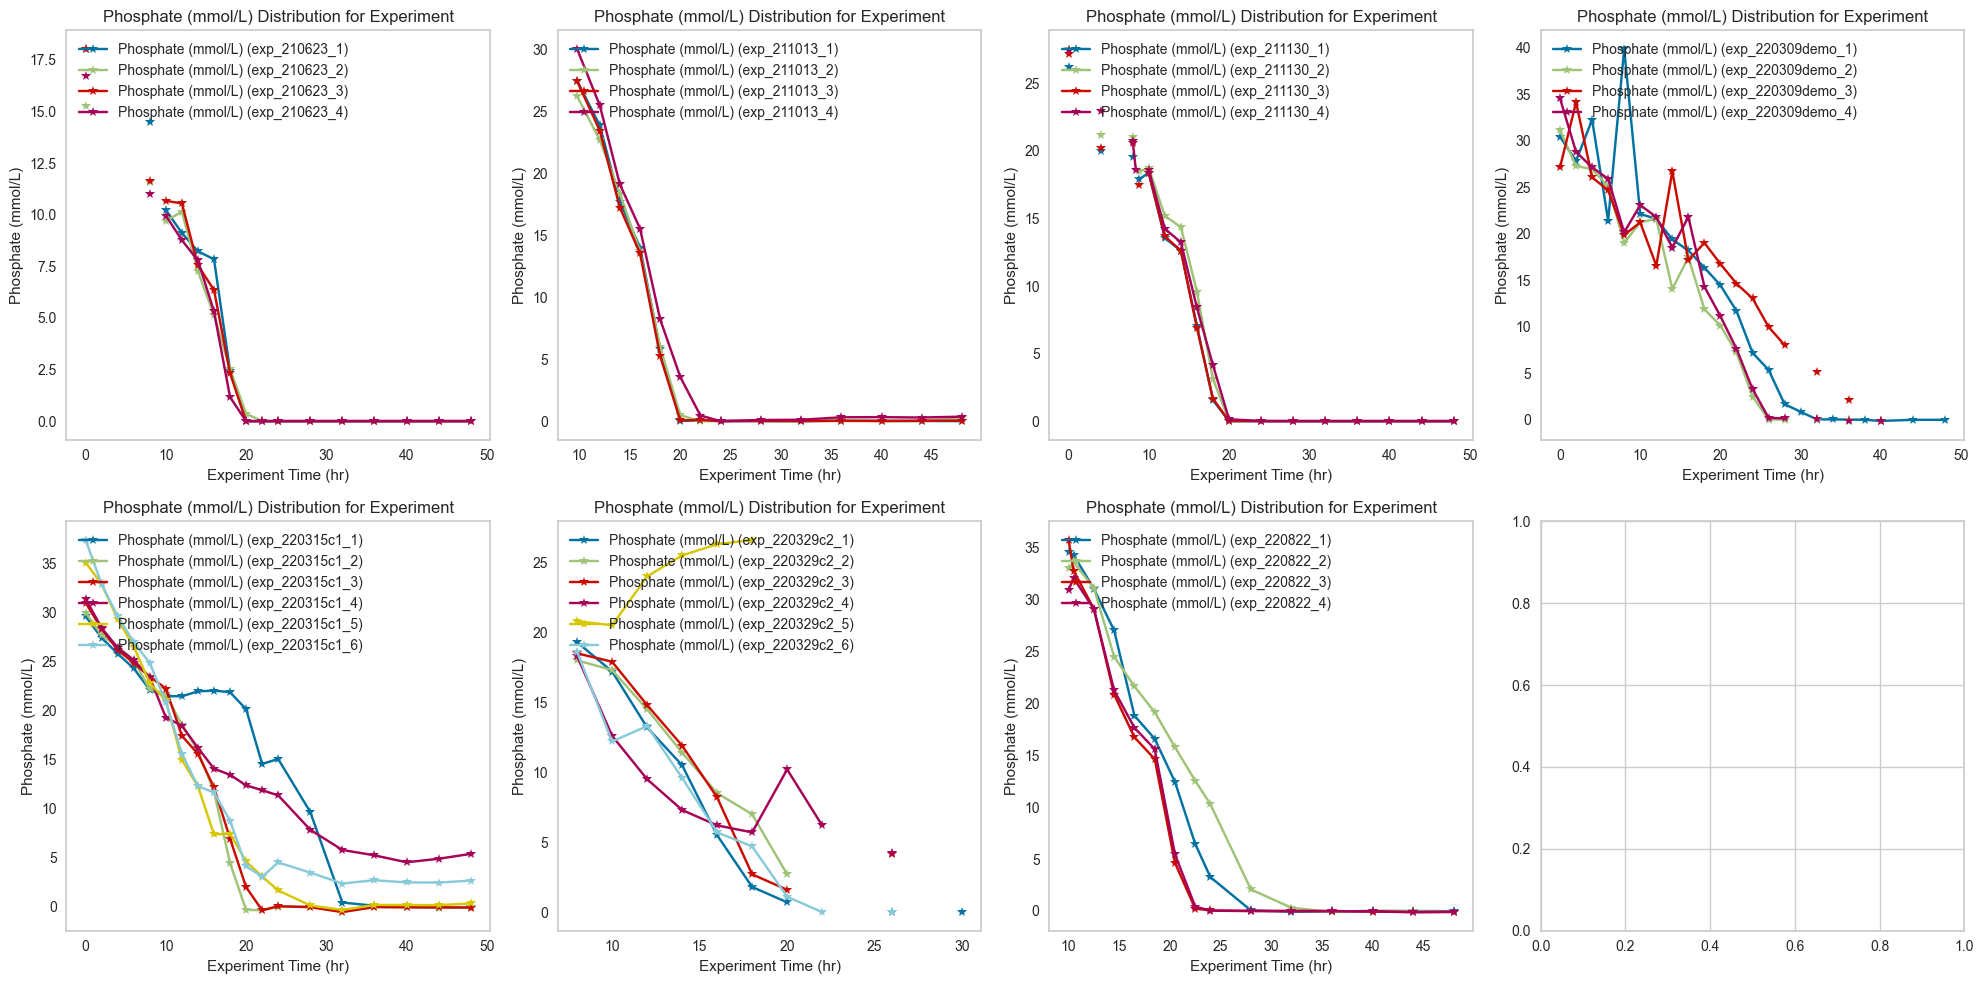

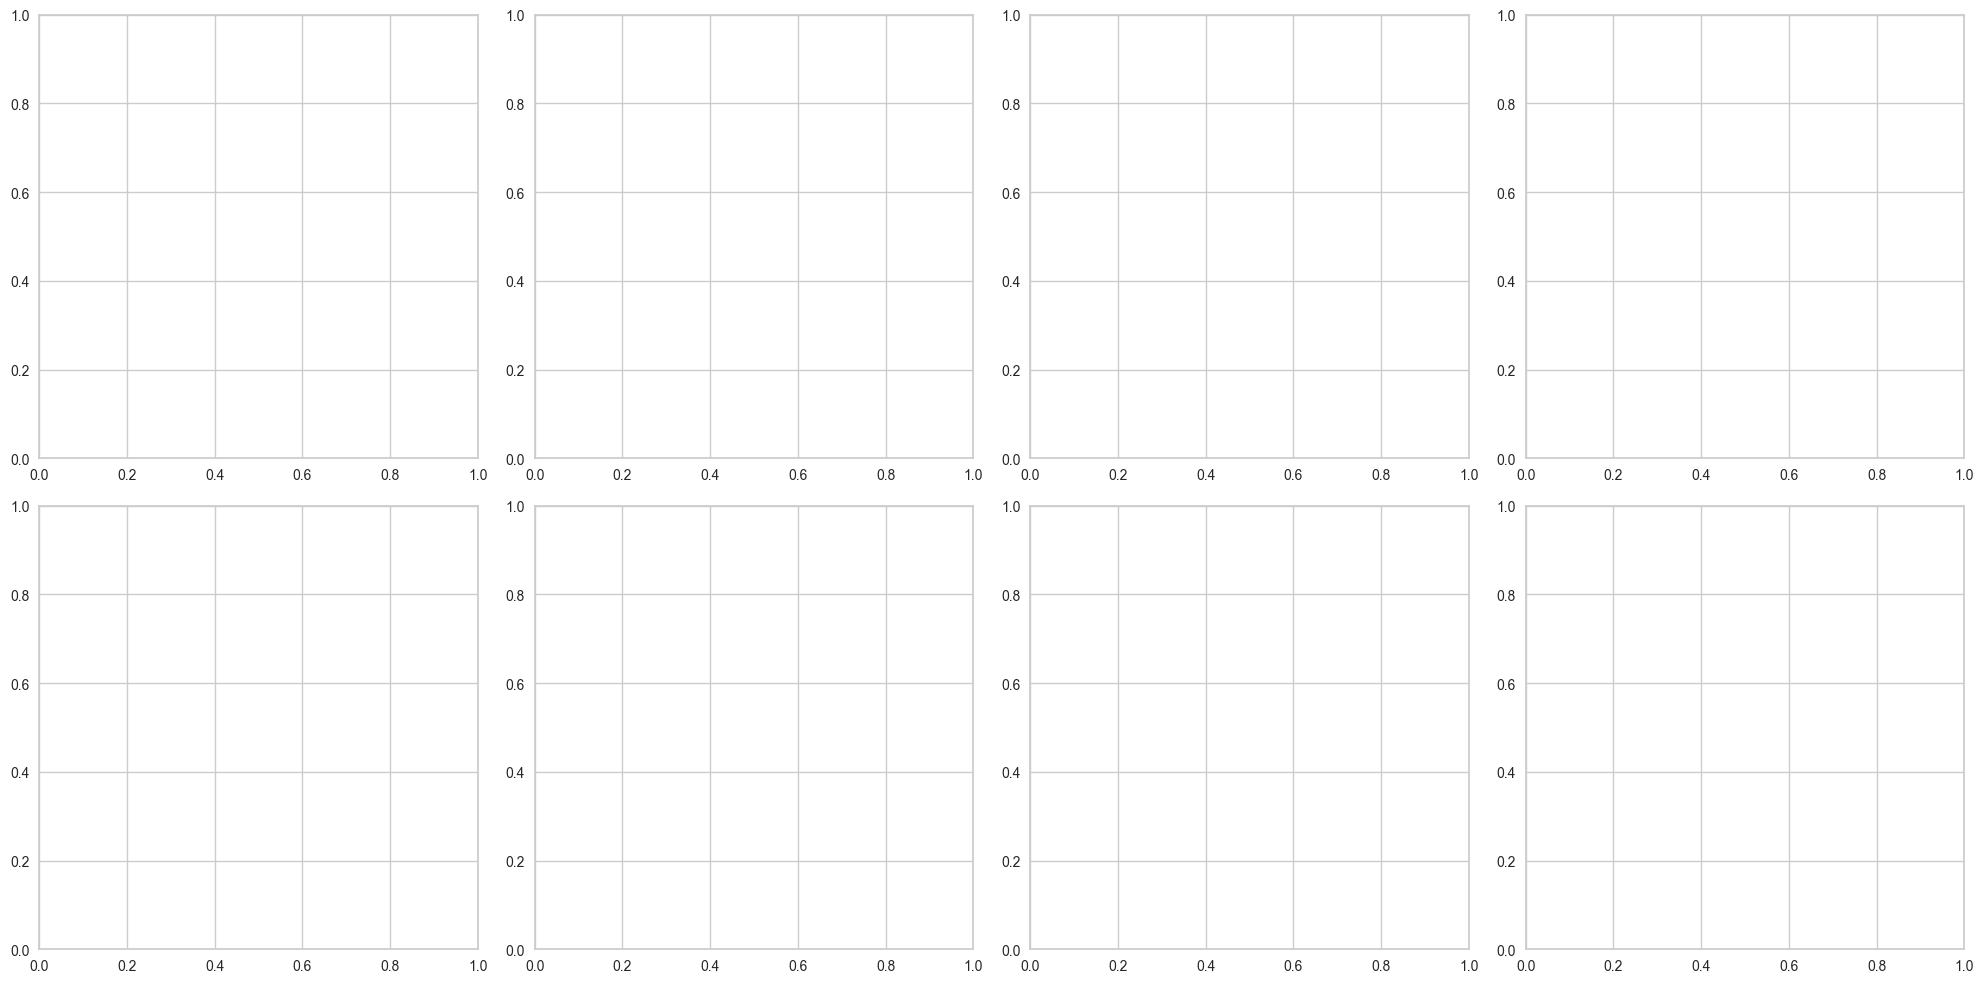

In [45]:
# Assuming 'experiments' is a list of lists containing your DataFrames, and each DataFrame has a 'name' attribute
output_columns = ['Glucose (g/L)', 'Glycerol (g/L)', 'Phosphate (mmol/L)', 'output_titre_µgl']

plot_timeseries(experiment_groups, output_columns, save= False)

>       Error in glucose concentration for exp_220329c2

> Environmental Conditions:

In [101]:
# output_Temp (Temperature): 
    # Temperature profoundly influences cellular metabolism, protein folding, and the stability of the expressed protein. 
    # Optimal temperatures can enhance protein yield and functionality.
    
# output_Ph (pH): 
    # The pH of the culture medium affects enzyme activity, protein stability, and cell growth. Maintaining an optimal pH is crucial 
    # for maximizing protein production.
    
    # The pH scale is a numerical scale used to specify the acidity or basicity of an aqueous solution. It ranges from 0 to 14, 
    # with 7 being neutral. Solutions with a pH less than 7 are acidic, and those with a pH greater than 7 are basic (or alkaline).

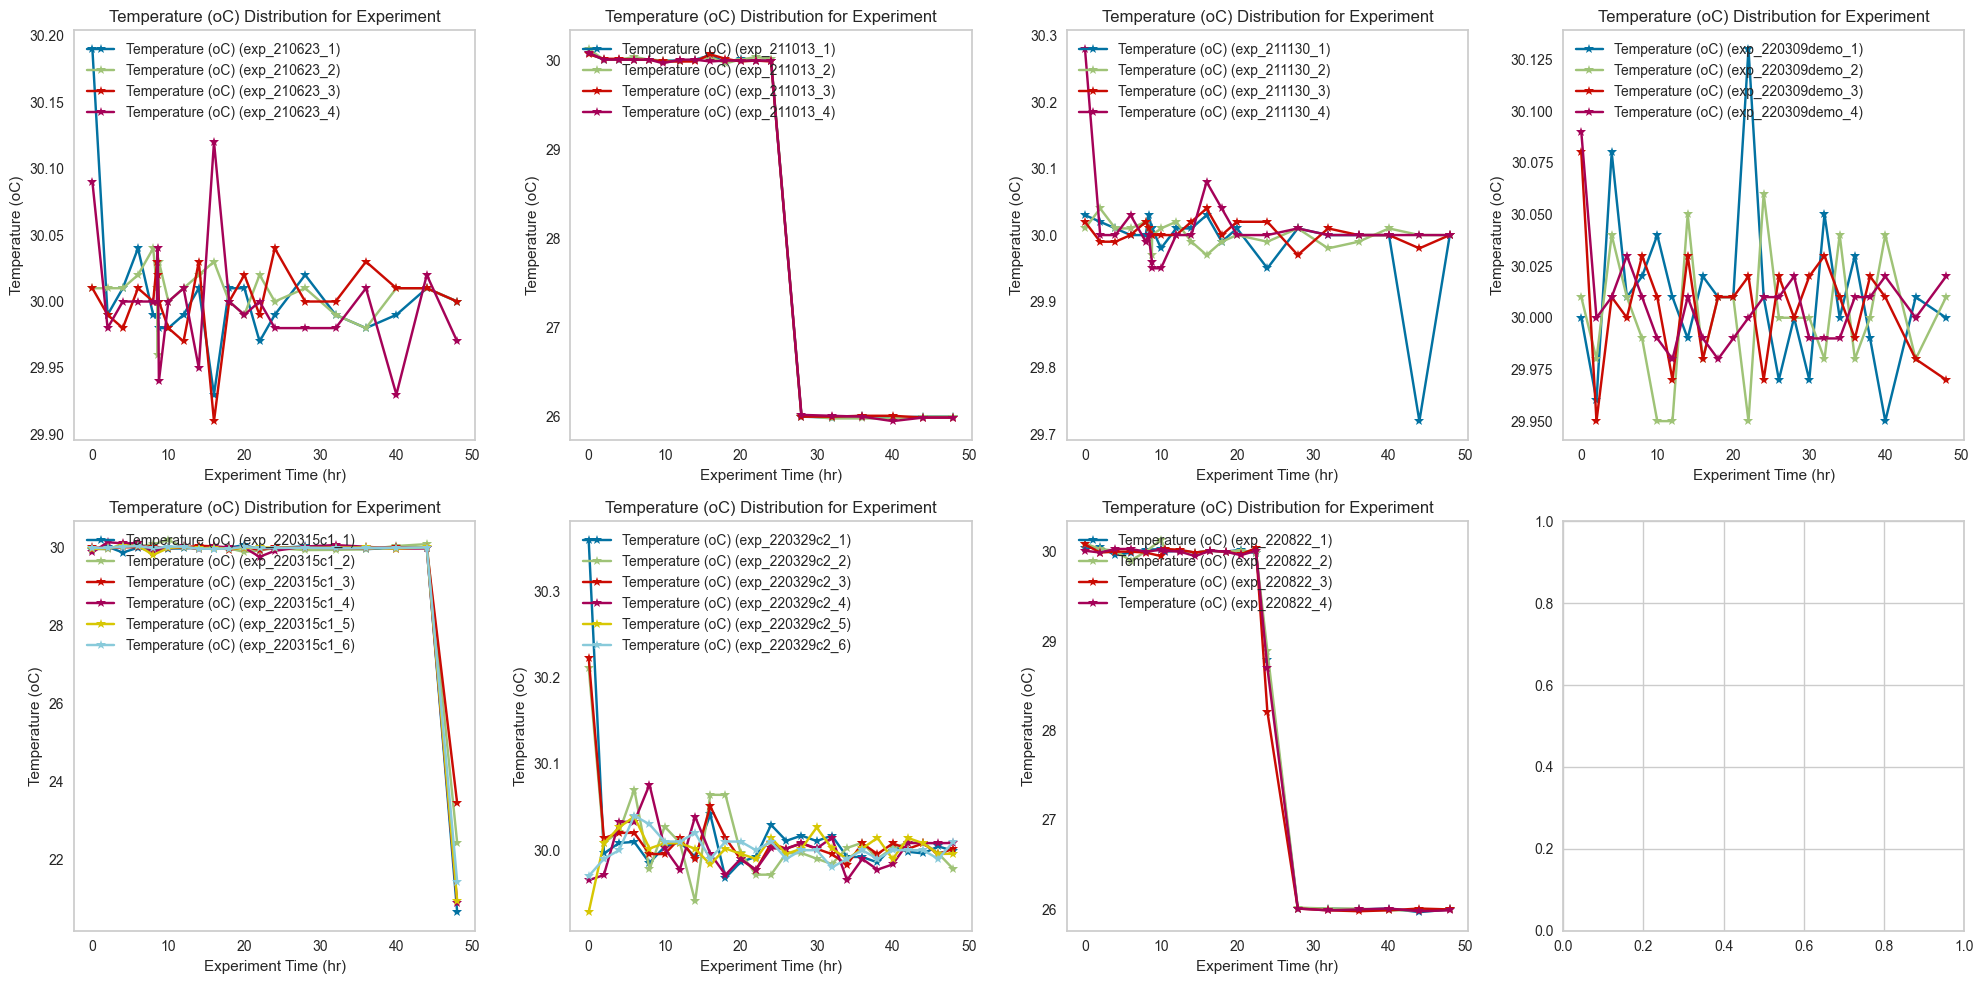

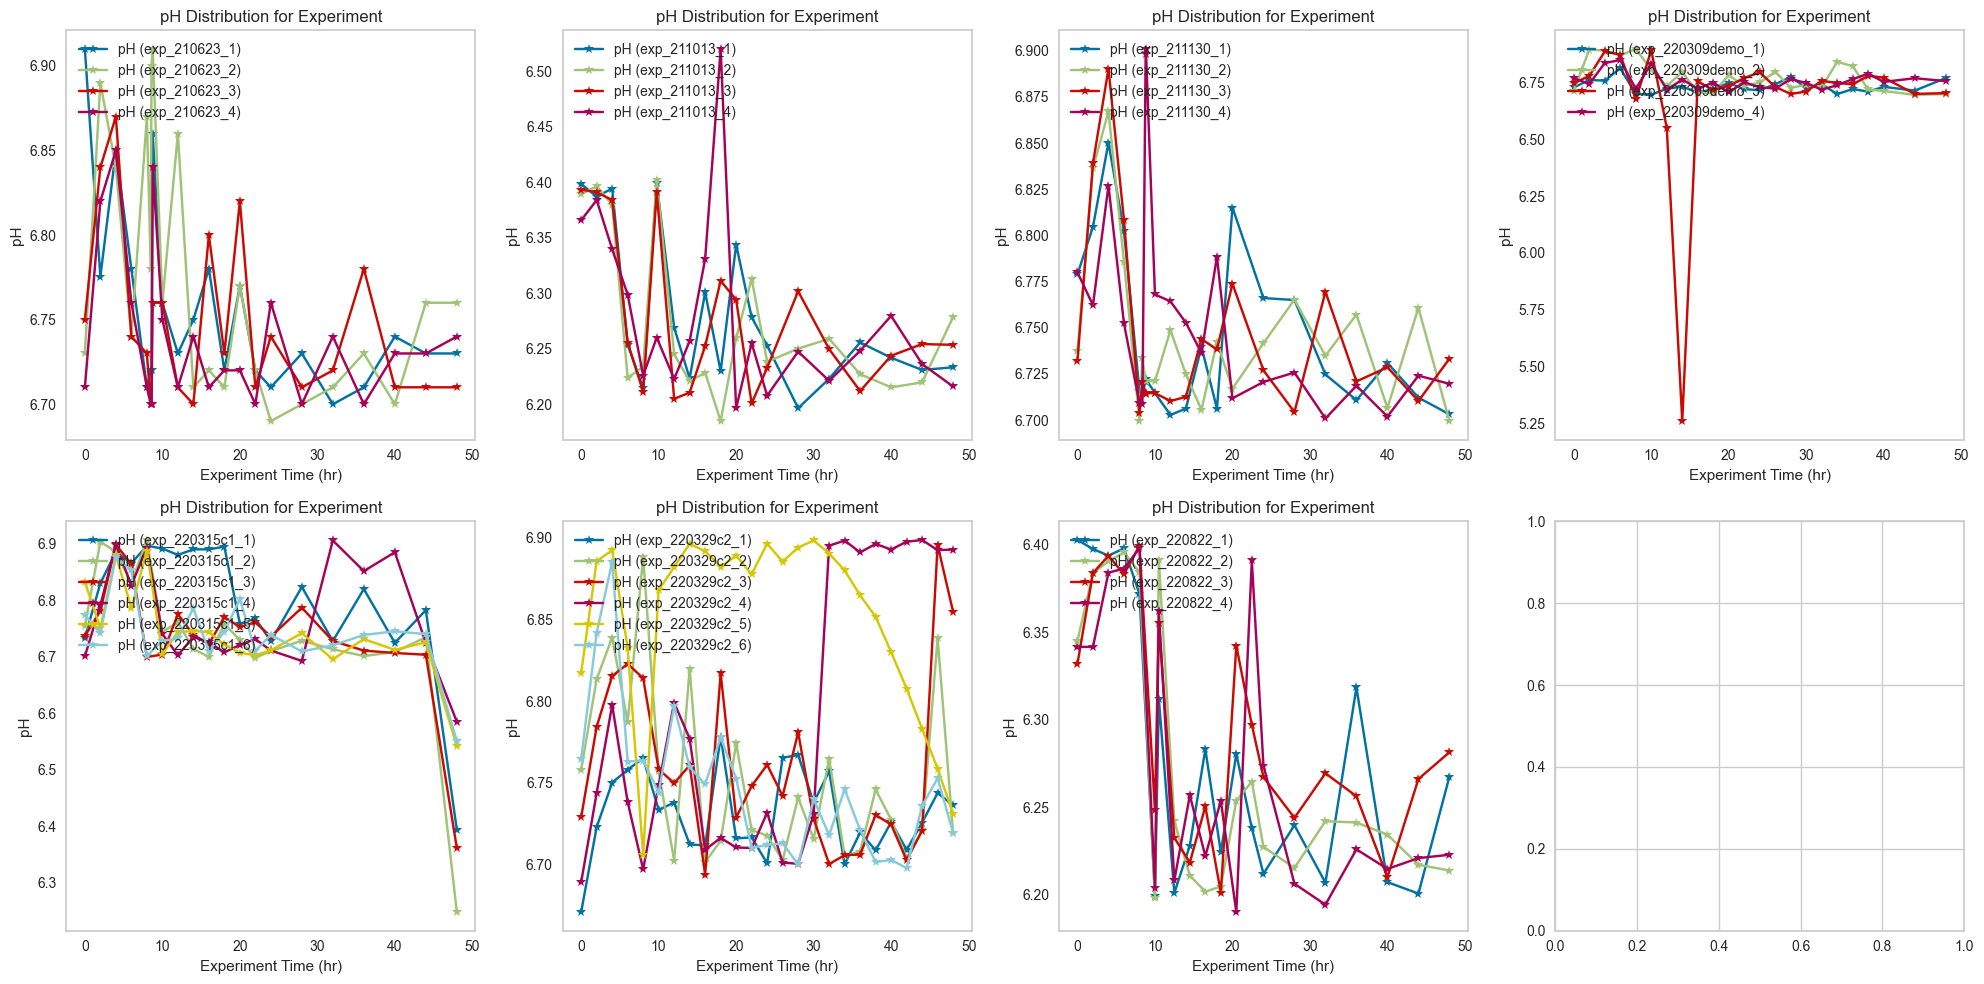

In [102]:
env_cols = ['Temperature (oC)', 'pH']

plot_timeseries(experiment_groups, env_cols, save = False) 

> Nutrients

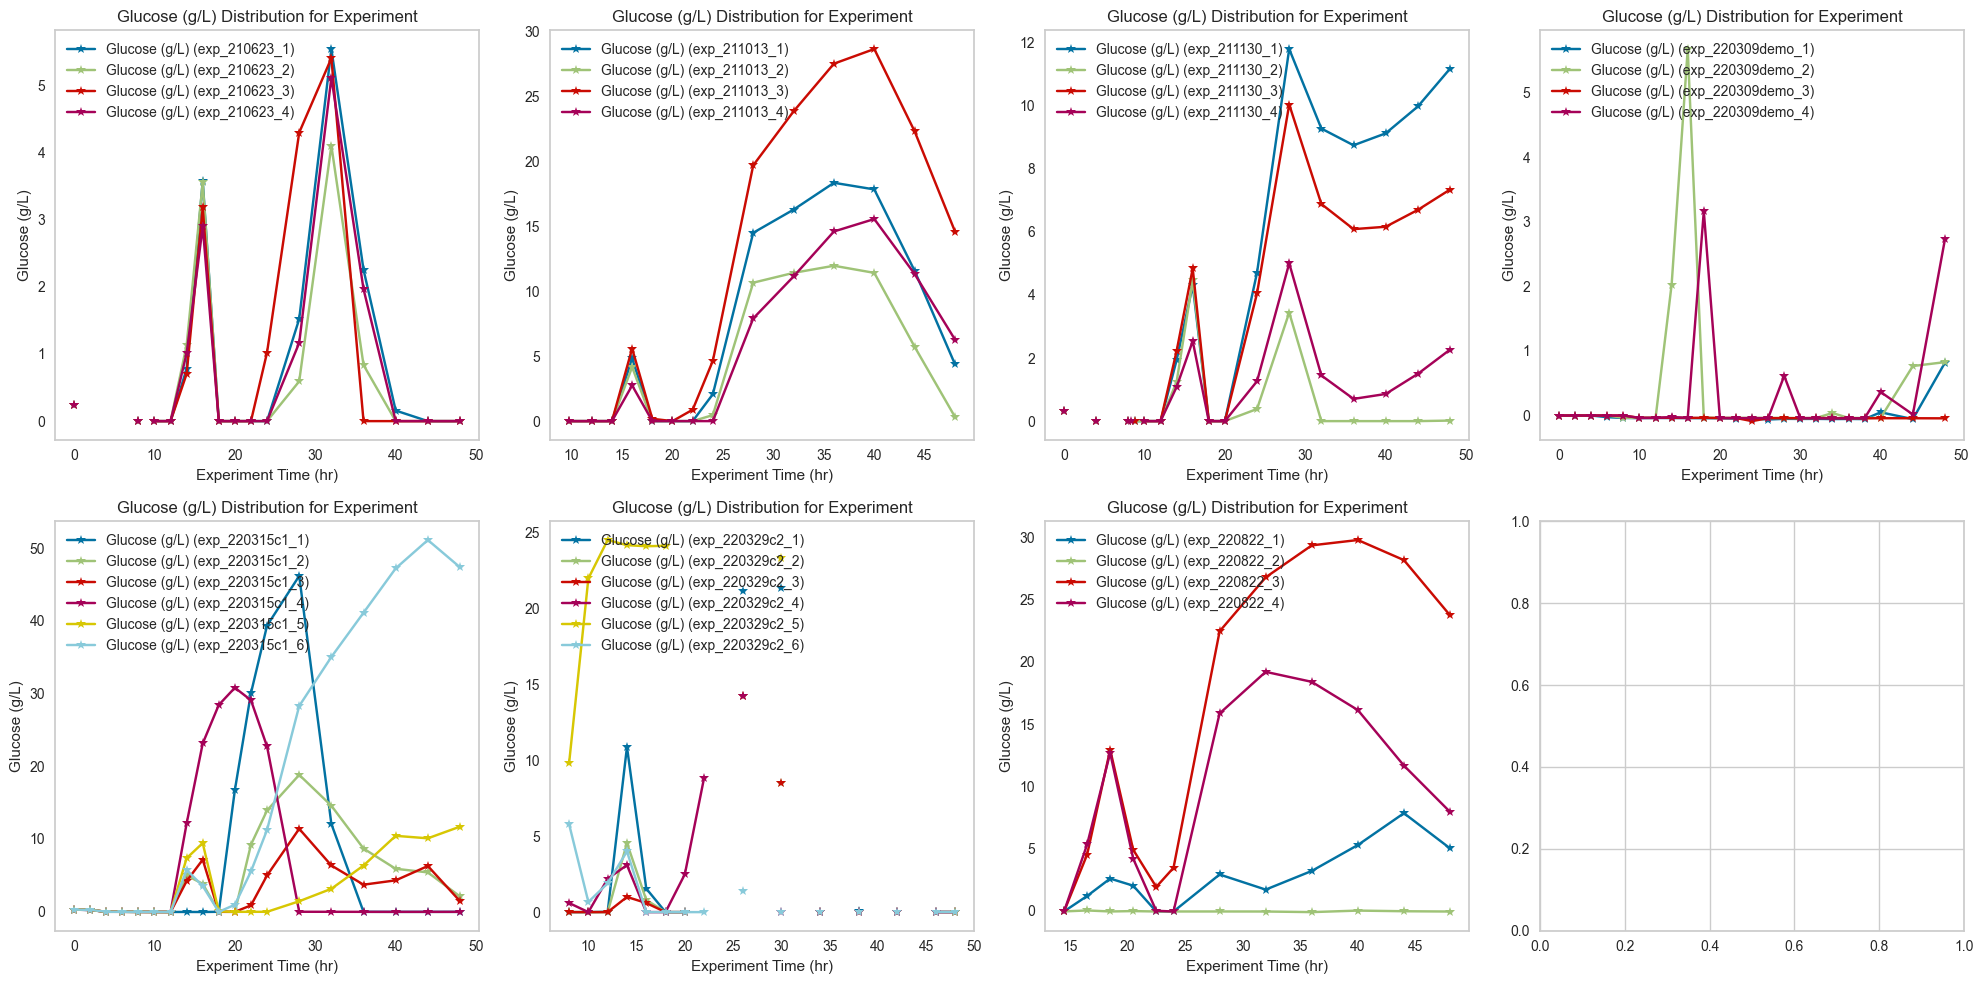

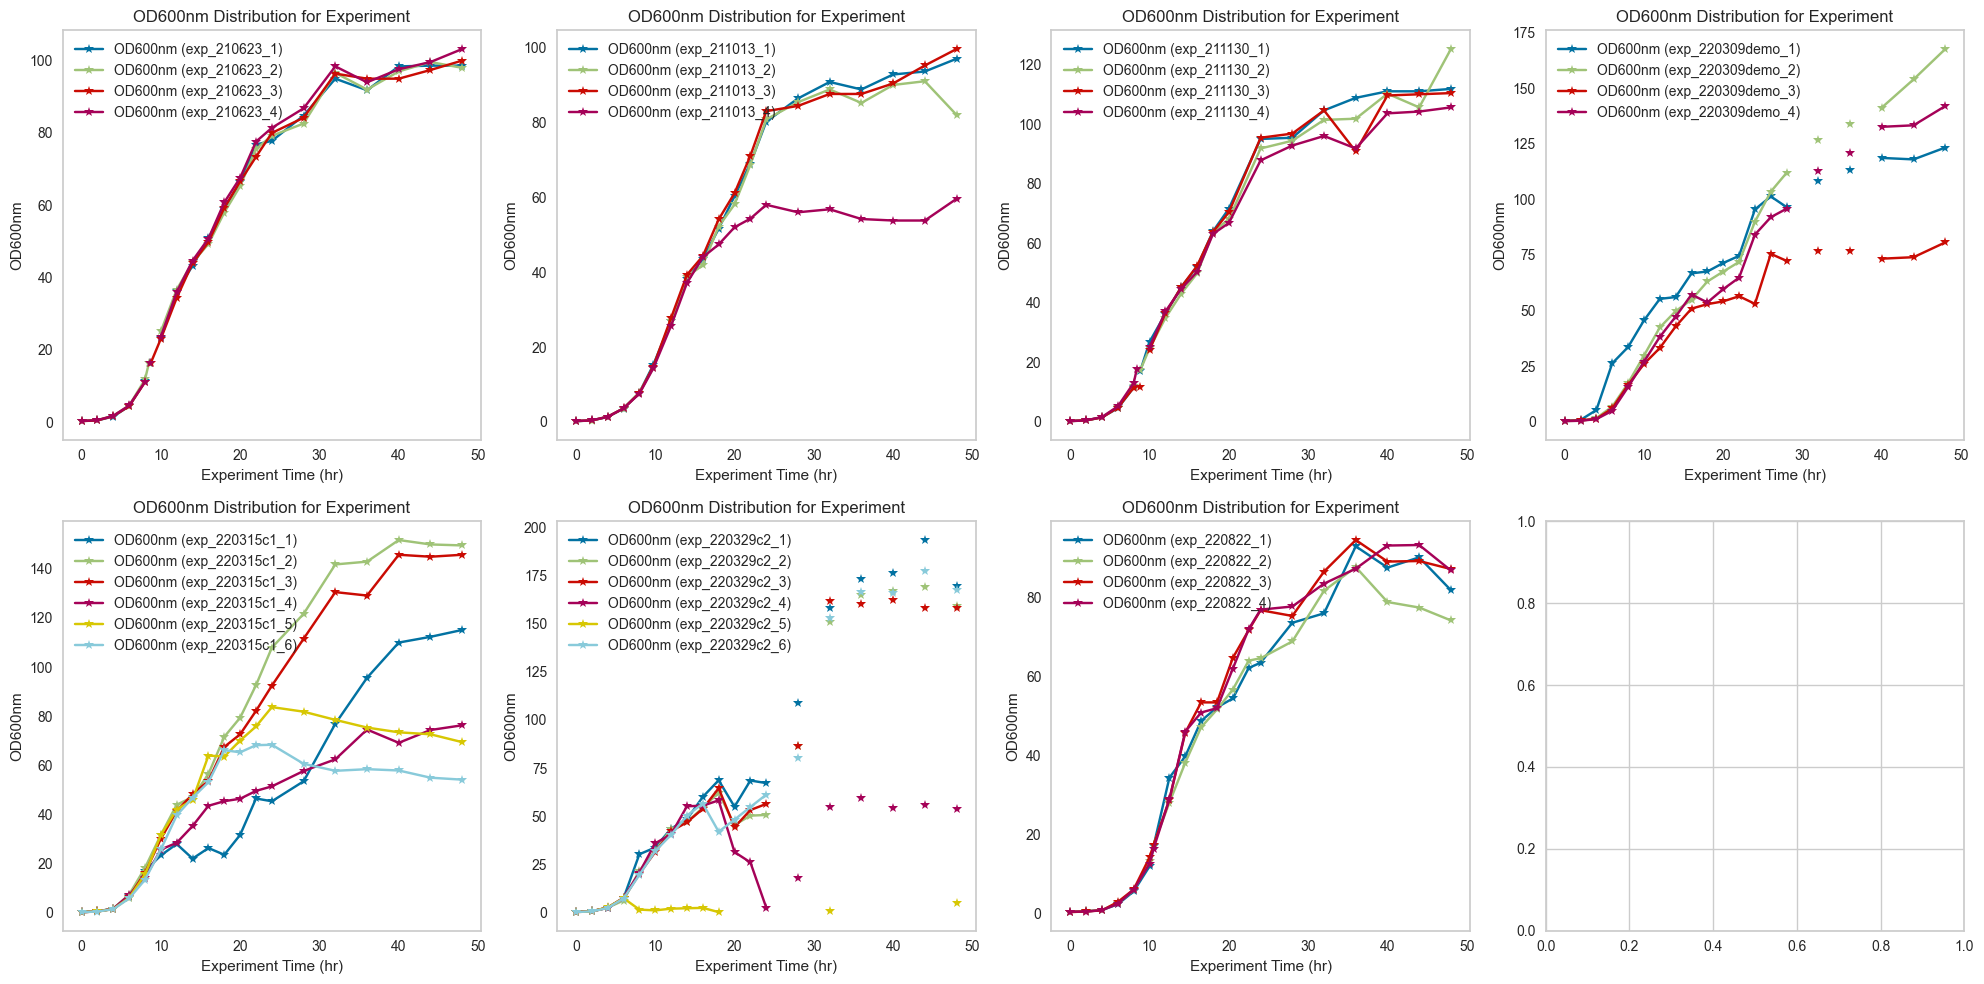

In [103]:
env_cols = ['Glucose (g/L)', 'OD600nm']

plot_timeseries(experiment_groups, env_cols, save = False)

>> EDA on two batch categories

In [104]:
# [df.columns for df in df_c1c2][0]

In [105]:
c1c2_batches = [ 'exp_220315c1_1', 'exp_220315c1_2', 'exp_220315c1_3', 'exp_220315c1_4', 'exp_220315c1_5', 'exp_220315c1_6',
                'exp_220329c2_1', 'exp_220329c2_2', 'exp_220329c2_3', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6',]


def plot_timeseries_list (experiment_data, cols_to_plot, marker = '*' , linestyle='-', color=None, save = False):
    for output_col in cols_to_plot:
        fig, ax = plt.subplots(3, 4, figsize=(20, 10))  # Adjusted figsize for better visibility

        for i, df in enumerate(experiment_data):
            # Calculate row and column index for subplots
            row = i // 4  # Integer division to get the row index
            col = i % 4  # Modulus to get the column index
            df.rename(columns={'output_OD600': 'OD600nm', 'output_WCW_gl': 'Wet Cell Weight (g/L)', 'output_feed': 'Feed', 'output_feed_%': 'Feed %',
                                'output_agitation': 'Agitation (rpm)', 'output_air_%': 'Air (%)', 'output_O2': 'Oxygen Percentage', 'output_gasflow': 'Gas Flow',
                                'output_Ph': 'pH', 'output_Temp': 'Temperature (oC)', 'output_glycerol_gl': 'Glycerol (g/L)', 'output_acetate_mmol_l': 'Acetate (mmol/L)',
                                'output_phosphate_mmol_l': 'Phosphate (mmol/L)', 'input_Timepoint (hr)': 'Timepoint (hr)', 
                                'output_D0_%': 'Dissolved Oxygen (%)', 'output_glucose_gl': 'Glucose (g/L)', 
                                'output_titre_µgl': 'Titer (µg/µL)'}, inplace=True)
            # Plot the specified output column on the subplot
            try:
                if df[output_col].isnull != True:
                    ax[row, col].plot(df.index, df[output_col], label=output_col, marker = marker, linestyle=linestyle, color=color)
                    ax[row, col].set_xlabel(f"Experiment Time (hr) for {df.name}")
                    ax[row, col].set_ylabel(output_col)  # Set ylabel specific to the output column
                    
                    label=f"{output_col} ({getattr(df, 'name', f'DataFrame {j+1}')})"

                    ax[row, col].legend()

                    # Use the DataFrame's 'name' attribute for the subplot title, if available
                    exp_name = getattr(df, 'name', f'Exp {i+1}')
                    ax[row, col].set_title(f"{output_col} distribution for {'_'.join(exp_name.split('_')[:2])}")
            
            except:
                pass
        if save:
            plt.savefig(f"images/c1c2/{output_col}_timeseries.png")
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()  # Display the plot for the current output column
        
df_c1c2 = load_data(c1c2_batches)

for df in df_c1c2:
    df.drop(columns = invariant_cols, axis=1, inplace=True)    

# c1c2_df = pd.concat((df_c1c2[0], df_c1c2[1:]), axis=0)

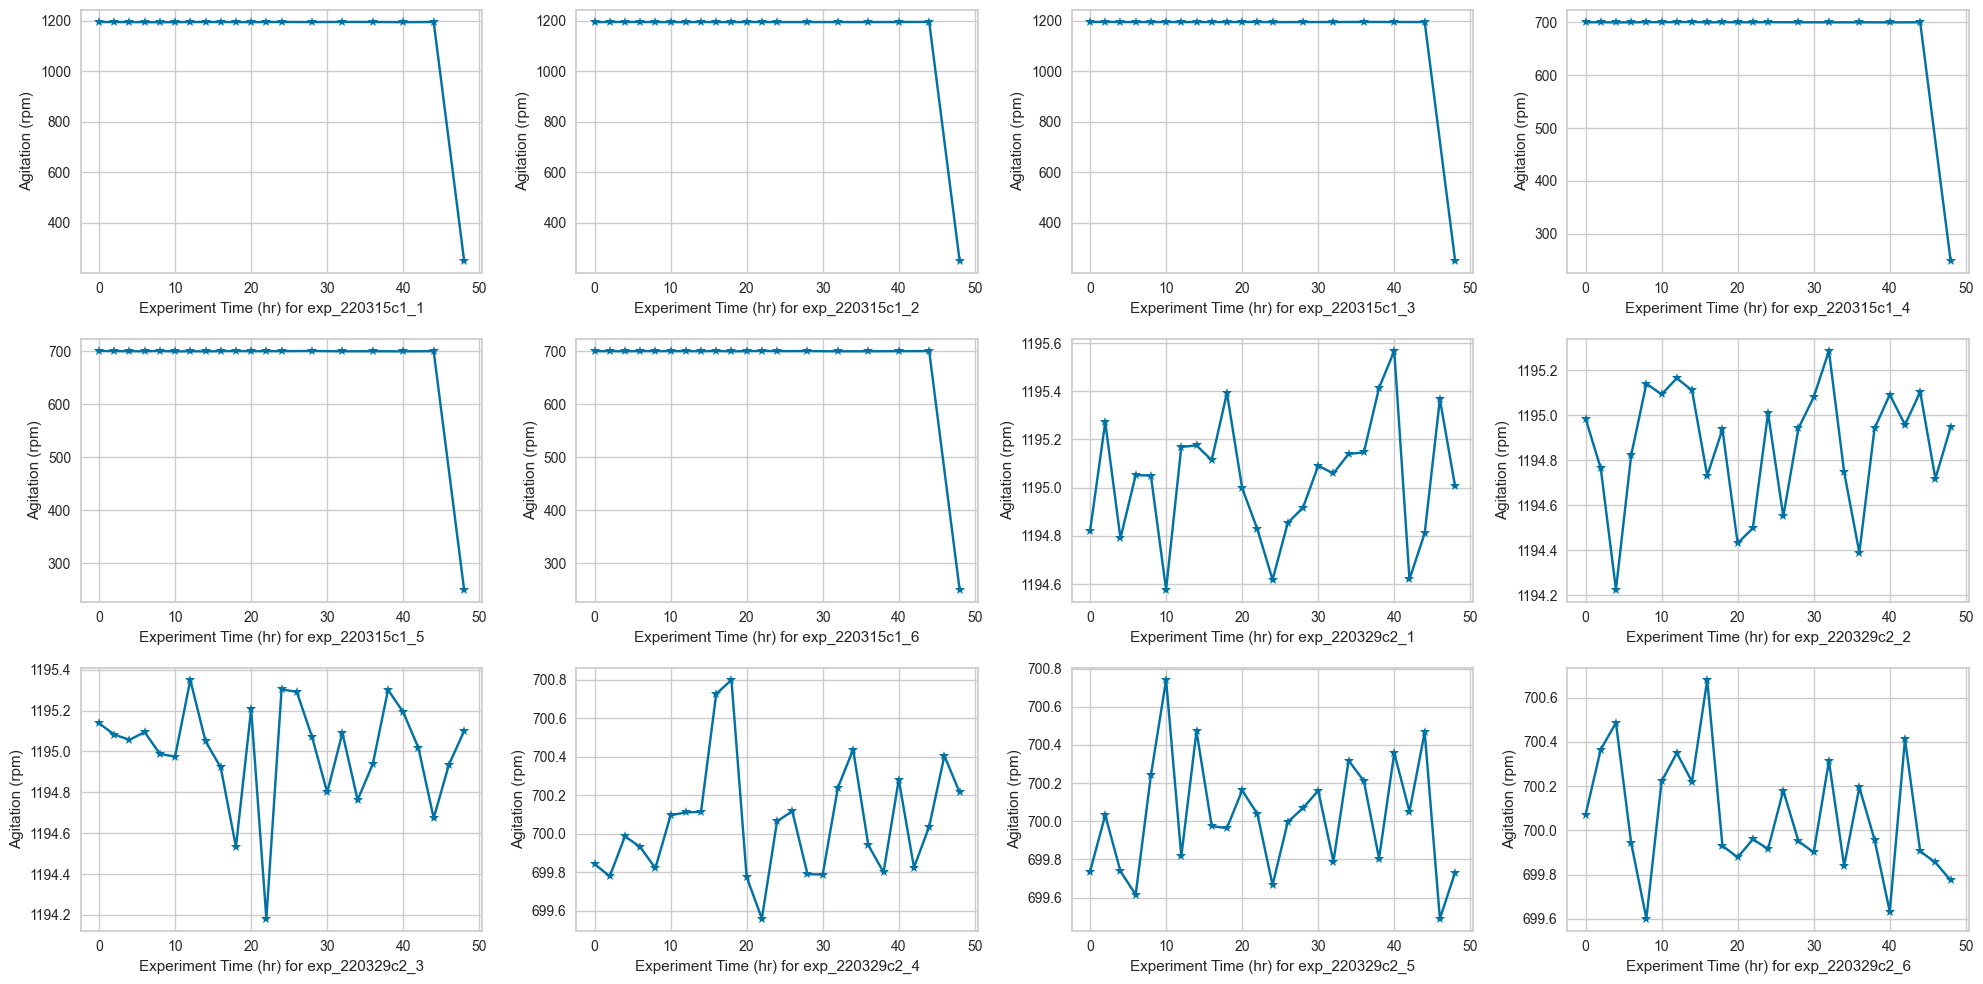

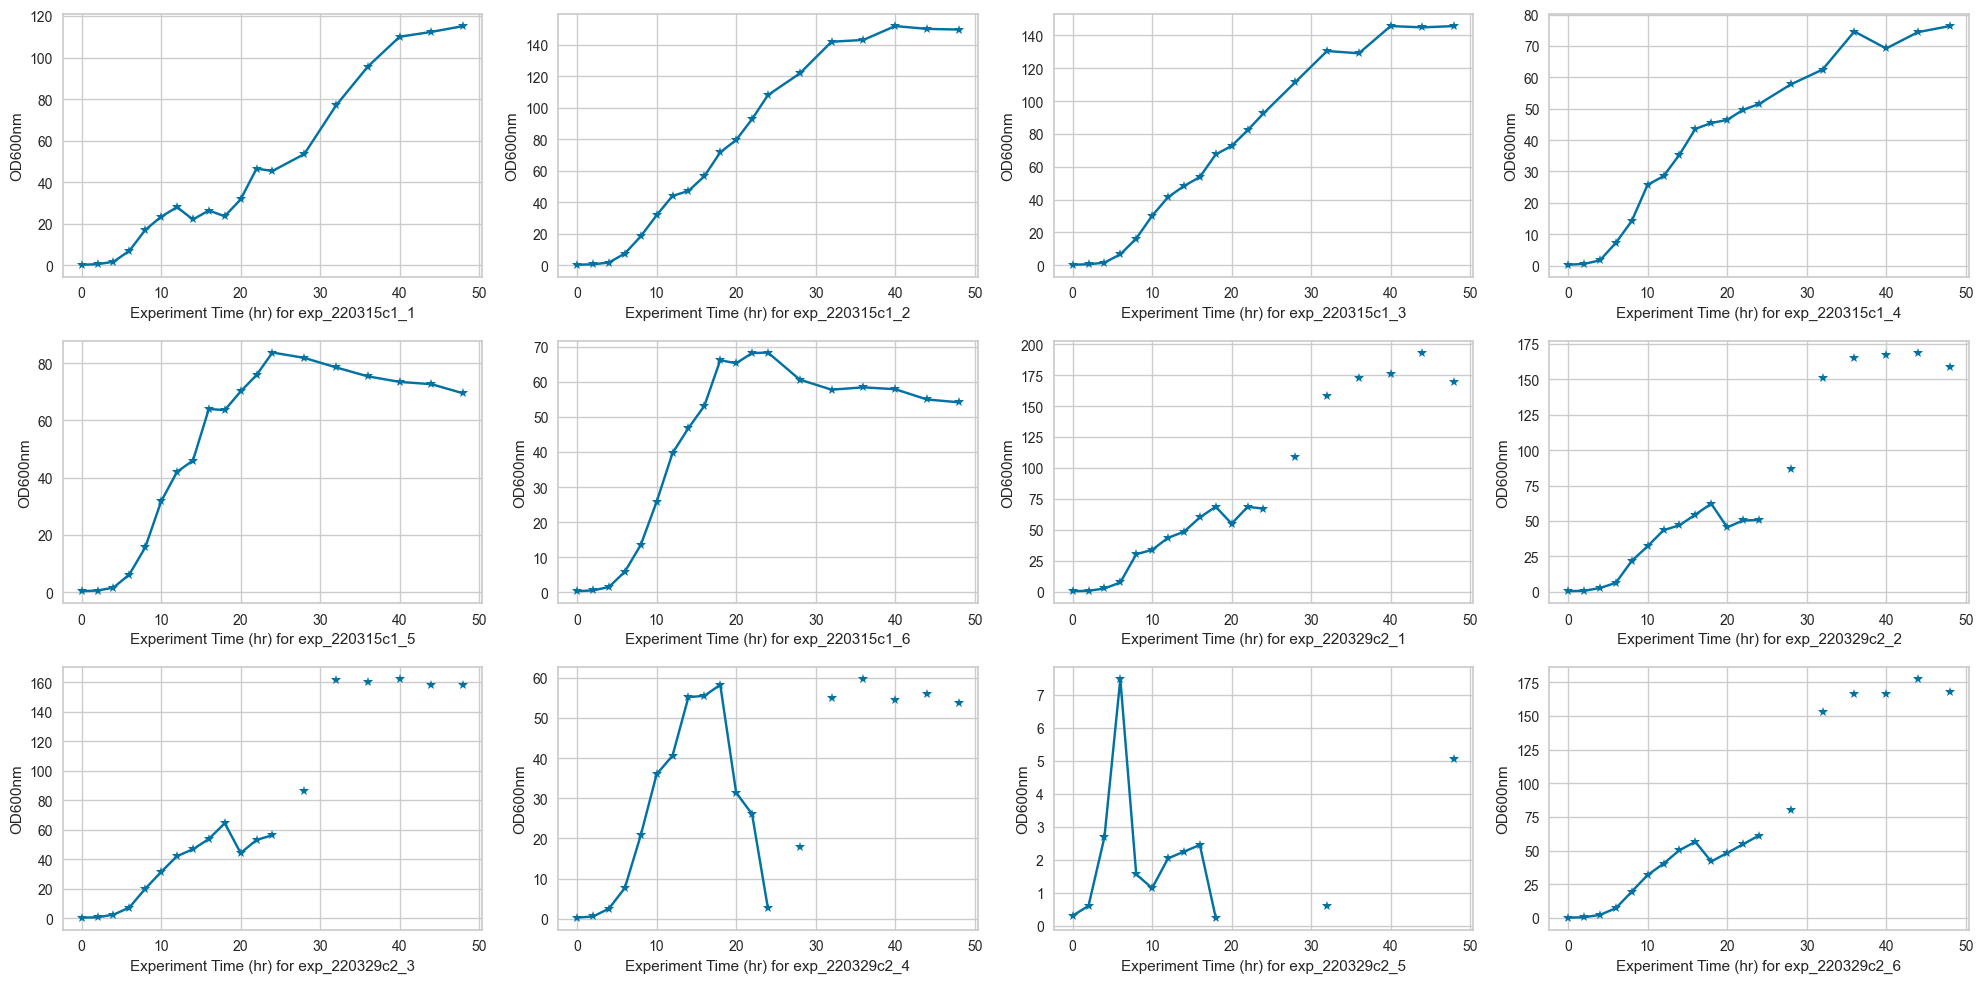

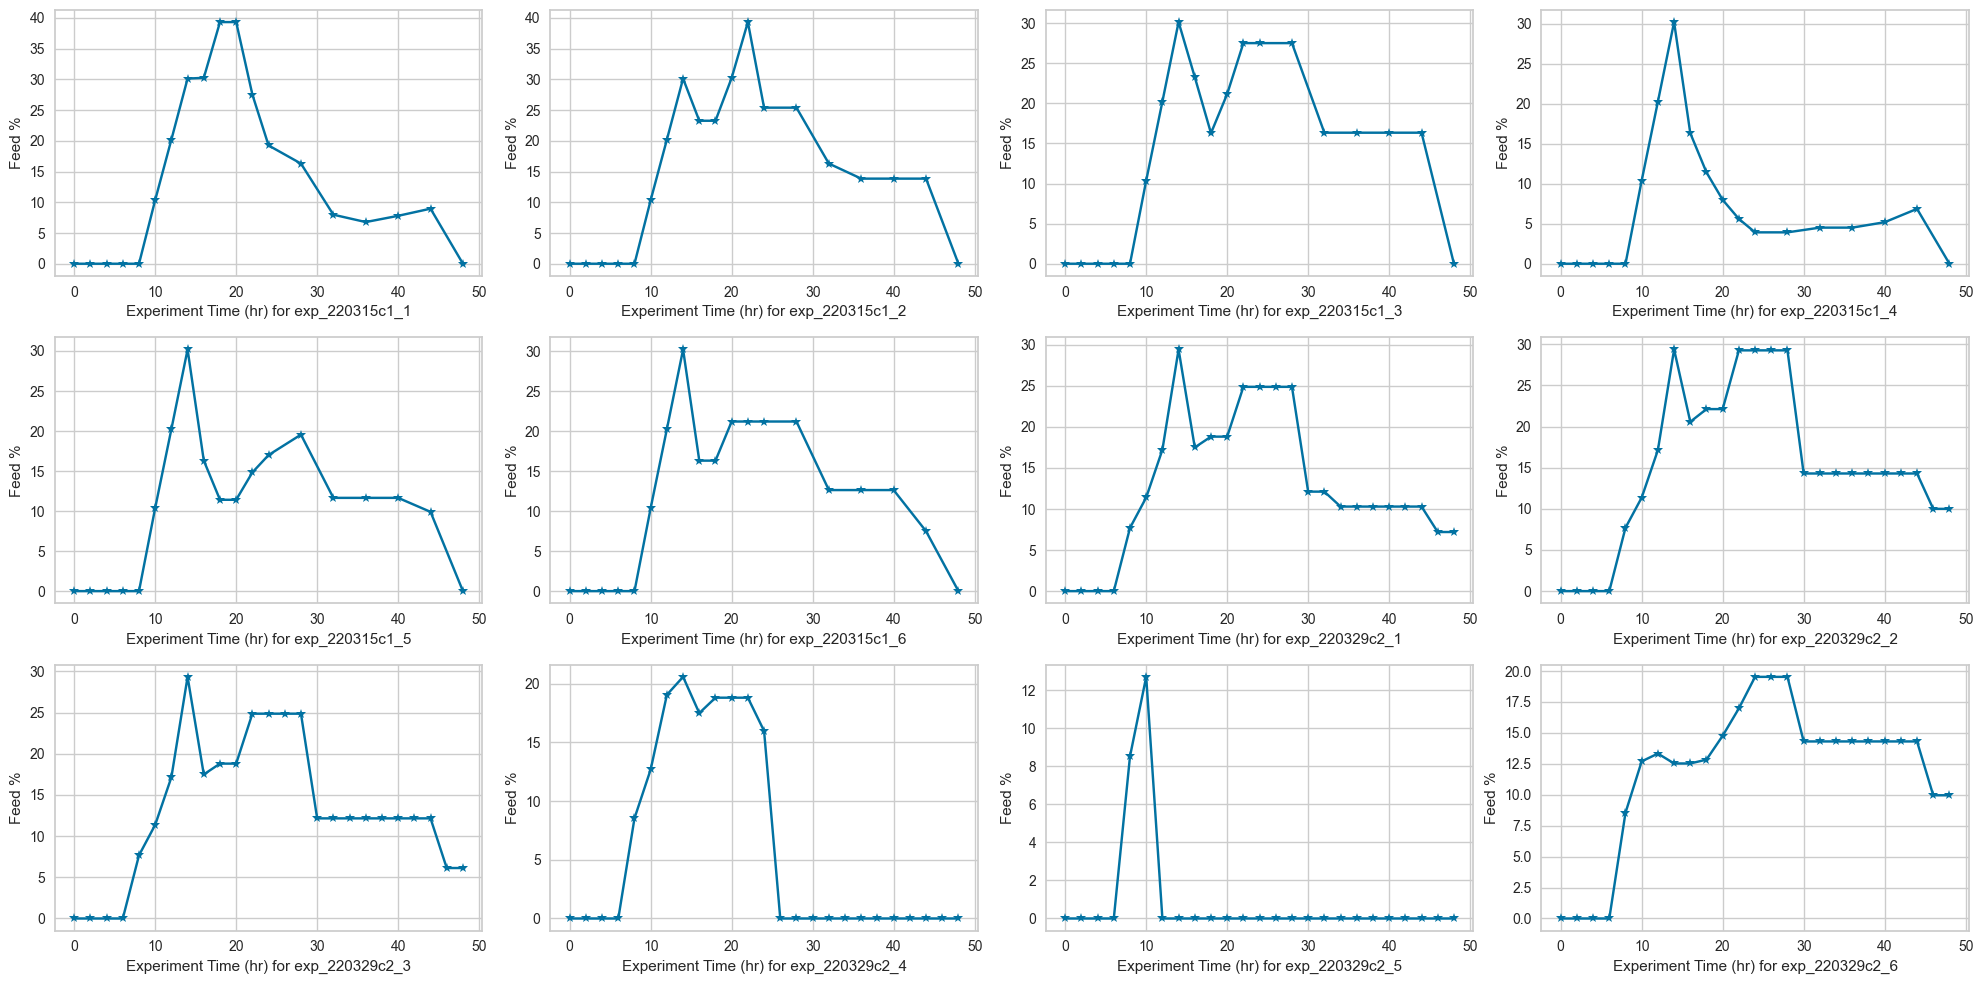

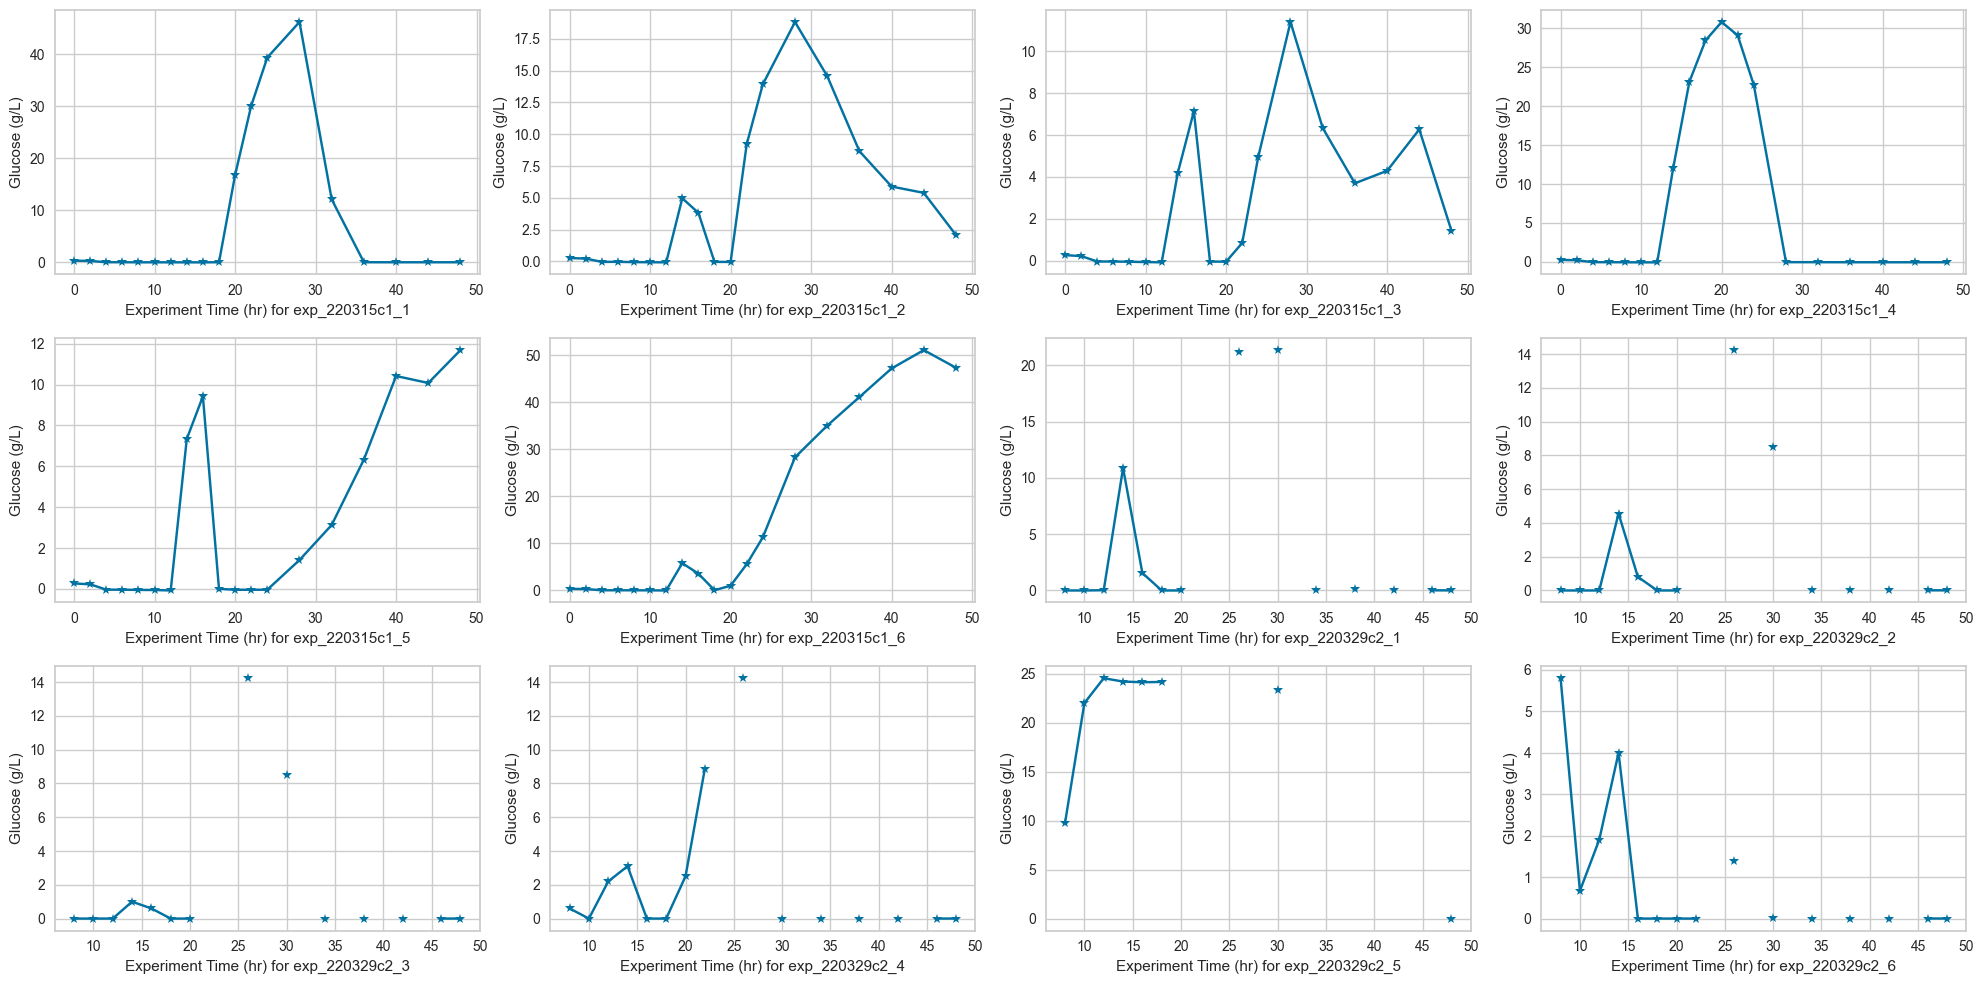

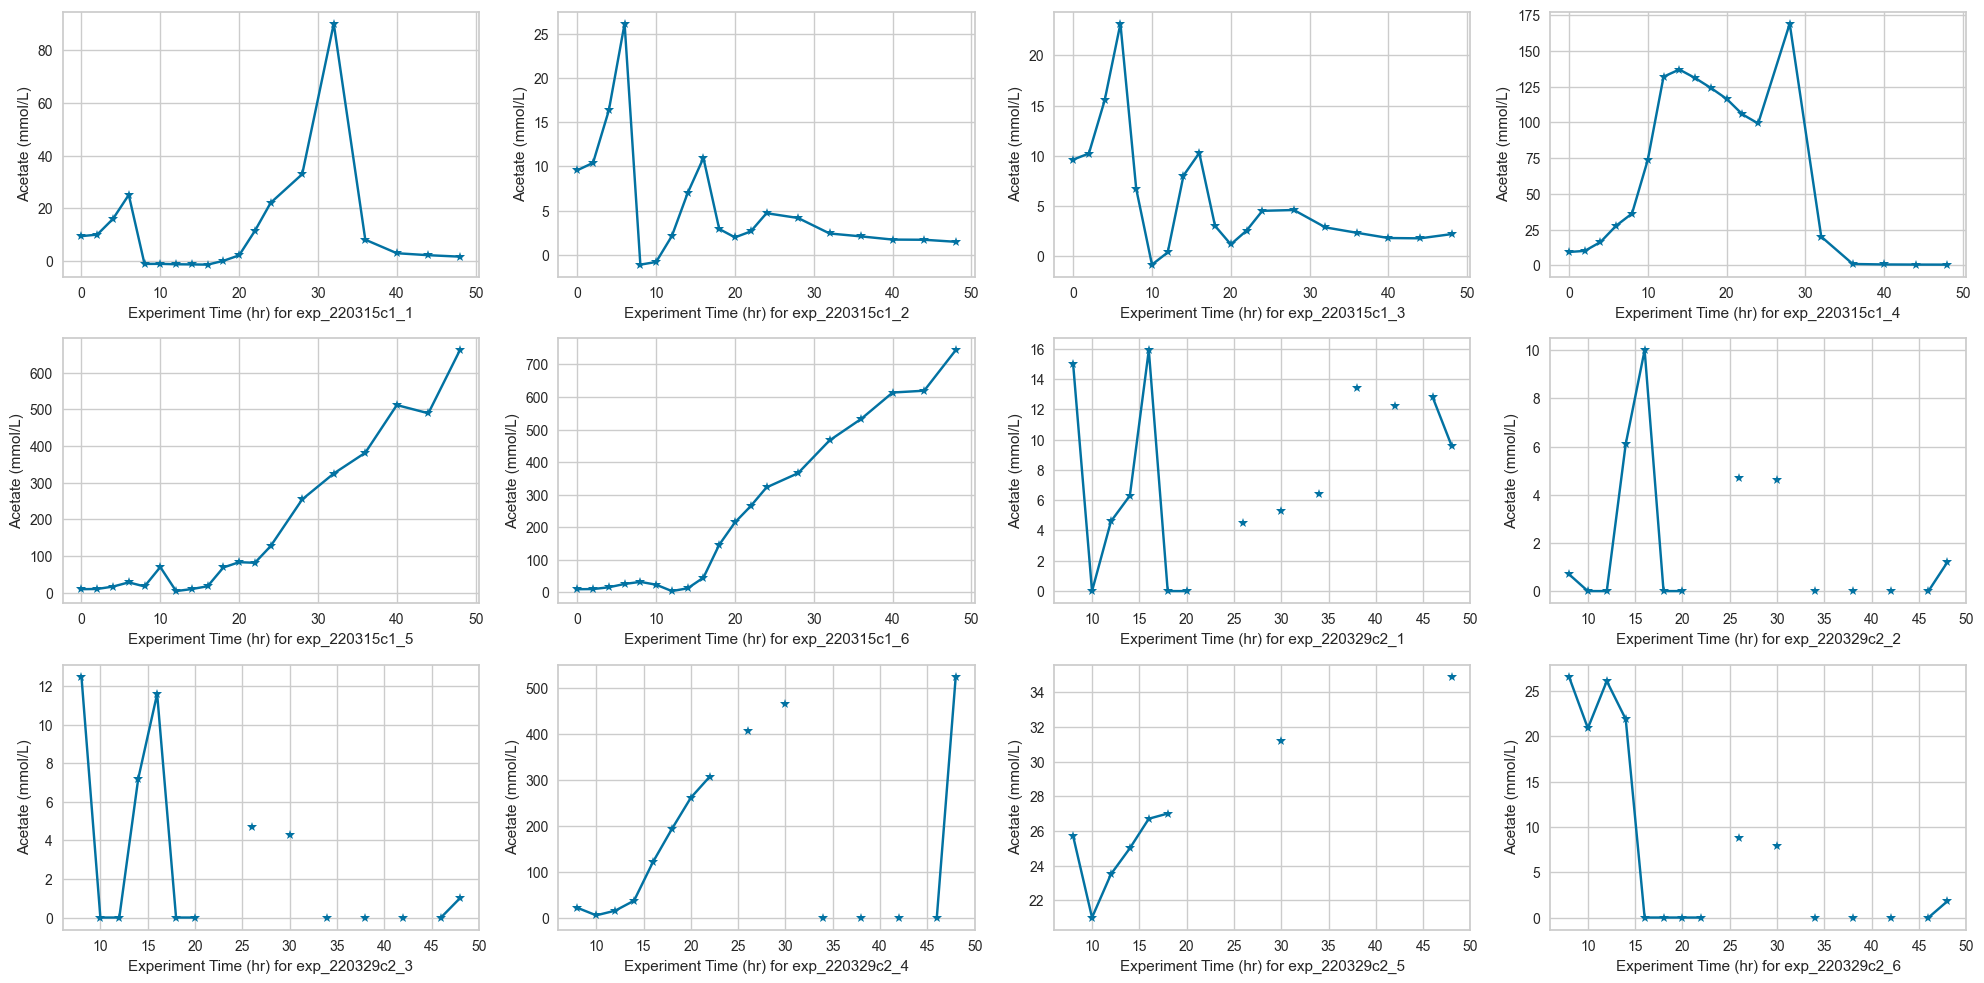

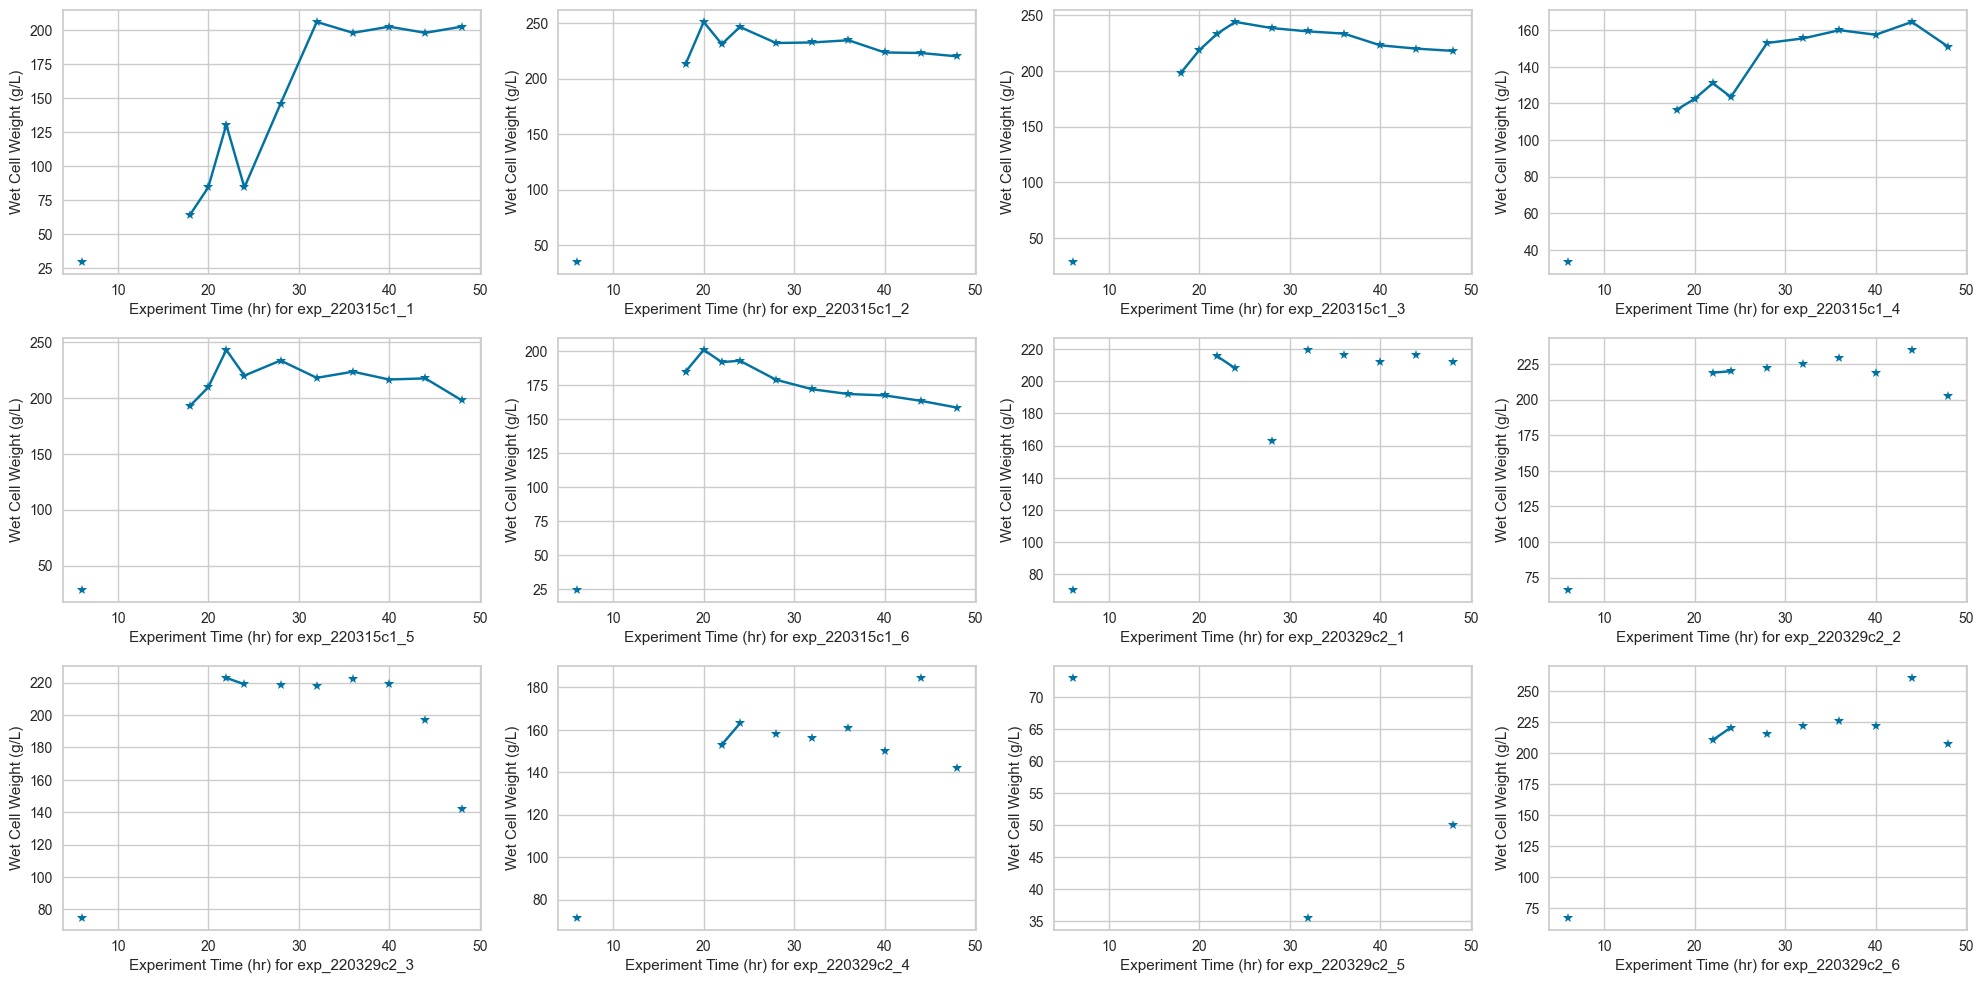

In [106]:
plot_timeseries_list(df_c1c2, ['Agitation (rpm)', 'OD600nm', 'Feed %', 'Glucose (g/L)', 'Acetate (mmol/L)', 'Wet Cell Weight (g/L)'], save = False) 

In [107]:
# df_combined

In [108]:
# Batch 1: This is the entire dataset. (combined_data.csv or combined_data_extra.csv with missing data imputation)
# df_combined 

In [109]:
# Batch 2: Only clean dataset (removed C1-4,5,6 and all C2 batches)         # Acetate levels were too high for C1-4, 5, 6; Agitation was low, and OD was low.
w0_c123 = ['exp_220315c1_4', 'exp_220315c1_5', 'exp_220315c1_6',
            'exp_220329c2_1', 'exp_220329c2_2', 'exp_220329c2_3', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6' ]

data_w_c123 = [df for df in experiment_data if df.name not in w0_c123]
data_w_c123 = pd.concat(data_w_c123)
# save_csv(data_w_c123, 'data/use_to_code/data_w_c123.csv')       # All Data without C1-4,5,6 and C2 batches 
# ---------------------------------------------------------------------------------------------------------------------------


In [110]:
# Batch 3: Fairly Good Data (removed all C2 batches)            # Acetate levels were too high for C1-4, 5, 6
w0_c1 = ['exp_220329c2_1', 'exp_220329c2_2', 'exp_220329c2_3', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6' ]

data_w0_c2 = [df for df in experiment_data if df.name not in w0_c123]
data_w0_c2 = pd.concat(data_w0_c2)
# save_csv(data_w0_c2, 'data/use_to_code/data_w0_c2.csv')         # All Dataframes without C2 batches
# ---------------------------------------------------------------------------------------------------------------------------


In [111]:
# Batch 4: Data with Agitation of 700 rpm (and dropped output glycerol because it was empty)
agi_700 = ['exp_220315c1_4', 'exp_220315c1_5', 'exp_220315c1_6', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6' ]

data_agi_700 = [df for df in experiment_data if df.name in w0_c123]
data_agi_700 = pd.concat(data_agi_700)
data_agi_700 = data_agi_700.drop(columns = 'output_glycerol_gl')
# # save_csv(data_agi_700, 'data/use_to_code/data_agi_700.csv')         # All Dataframes without C2 batches
# # ---------------------------------------------------------------------------------------------------------------------------


In [112]:
# Batch 5: Data with Agitation of 1200 rpm
agi_1200 = ['exp_220315c1_4', 'exp_220315c1_5', 'exp_220315c1_6', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6']

data_agi_1200 = [df for df in experiment_data if df.name not in w0_c123]
data_agi_1200 = pd.concat(data_agi_1200)
# # save_csv(data_agi_1200, 'data/use_to_code/data_agi_1200.csv')         # All Dataframes without C2 batches
# # ---------------------------------------------------------------------------------------------------------------------------


In [113]:
# Batch 6: Entire Data without Glycerol 

data_wo_glycerol = [df for df in experiment_data]
data_wo_glycerol = pd.concat(data_wo_glycerol)
data_wo_glycerol = data_wo_glycerol.drop(columns = 'output_glycerol_gl')
# # save_csv(data_wo_glycerol, 'data/use_to_code/data_wo_glycerol.csv')         # All Dataframes without C2 batches
# # ---------------------------------------------------------------------------------------------------------------------------


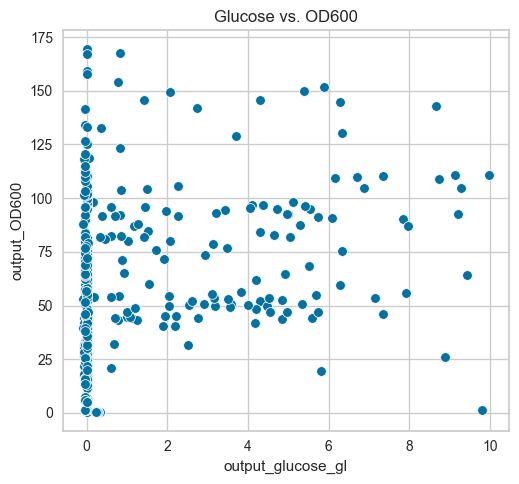

In [114]:

# Scatter plot for Glucose vs. OD600

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
# sns.scatterplot(x='output_glycerol_gl', y='output_OD600', data=df_combined)
sns.scatterplot(x='output_glucose_gl', y='output_OD600', data=df_combined.query('output_glucose_gl < 10'))
plt.title('Glucose vs. OD600')
plt.tight_layout()
# plt.savefig("images/scatter_plots/glucose_vs_OD600.png" , dpi = 300)
plt.show()


### Visualize Outliers

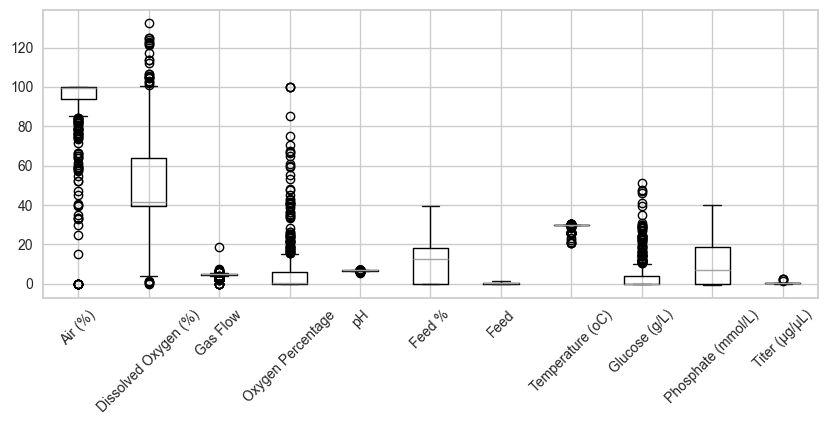

In [115]:

def visualize_outlier (df: pd.DataFrame, save = None):
    df = df.rename(columns={'output_OD600': 'OD600nm', 'output_WCW_gl': 'Wet Cell Weight (g/L)', 'output_feed': 'Feed', 'output_feed_%': 'Feed %',
                        'output_agitation': 'Agitation (rpm)', 'output_air_%': 'Air (%)', 'output_O2': 'Oxygen Percentage', 'output_gasflow': 'Gas Flow',
                        'output_Ph': 'pH', 'output_Temp': 'Temperature (oC)', 'output_glycerol_gl': 'Glycerol (g/L)', 'output_acetate_mmol_l': 'Acetate (mmol/L)',
                        'output_phosphate_mmol_l': 'Phosphate (mmol/L)', 'input_Timepoint (hr)': 'Timepoint (hr)', 
                        'output_D0_%': 'Dissolved Oxygen (%)', 'output_glucose_gl': 'Glucose (g/L)',
                        'output_titre_µgl': 'Titer (µg/µL)'})
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=["float64", "int64"])
    # Set figure size and create boxplot
    fig, ax = plt.subplots(figsize=(12, 6))
    numeric_cols.boxplot(ax=ax, rot=45)
    # Set x-axis label
    # ax.set_xlabel("Numeric Columns")
    
    # Adjust subplot spacing to prevent x-axis labels from being cut off
    plt.subplots_adjust(bottom=0.4) 
    # Increase the size of the plot
    fig.set_size_inches(10, 6)
    if save is not None:
        plt.savefig(f"images/boxplots/{save}" , dpi=300)
    # Show the plot
    plt.show()



visualize_outlier(df_combined.drop(columns = ['output_OD600','output_WCW_gl','output_acetate_mmol_l', 'output_agitation'], axis=1), save = 'boxplot_1.png')

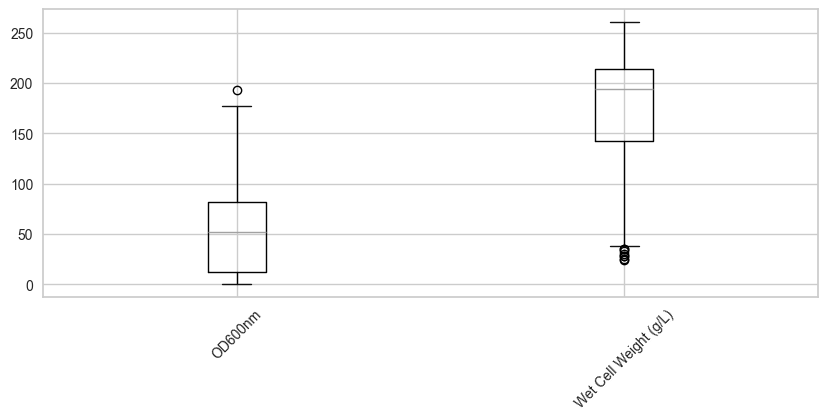

In [116]:
visualize_outlier(df_combined.loc[:, ['output_OD600','output_WCW_gl','output_acetate_mmol_l']], save = 'boxplot_2.png')

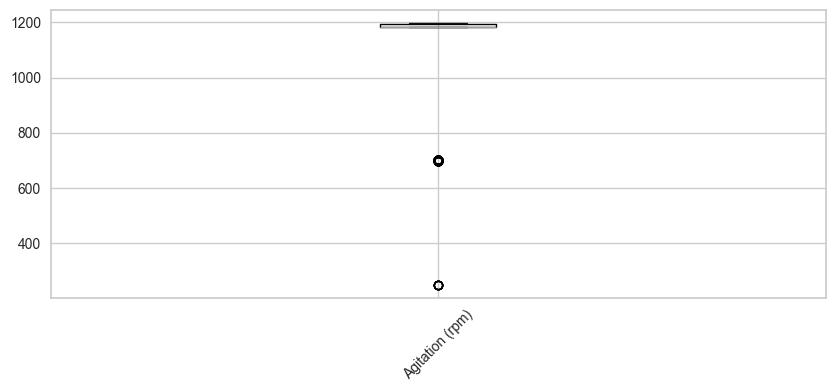

In [117]:
visualize_outlier(df_combined.loc[:, ['output_agitation', 'output_acetate_mmol_l']], save = 'boxplot_3.png')

### Missing Value Imputation

In [118]:
# data_w_c123

In [119]:
# lets assume that WCW is 0 when input timepoint(hr) is 0, 2, 4 etc. we can fill in the missing values with 0.

#' @param tp Time point to fill in the missing values
df.query(' `input_Timepoint (hr)` == "2024-01-01 00:00:00" ')['Wet Cell Weight (g/L)'].apply(lambda x: 0)
df.head()

OD600nm  Wet Cell Weight (g/L)  Agitation (rpm)     Air (%)  Dissolved Oxygen (%)  Gas Flow  Oxygen Percentage        pH  Feed %    Feed  Temperature (oC)  Glycerol (g/L)  Glucose (g/L)  Acetate (mmol/L)  Phosphate (mmol/L)  Titer (µg/µL)
input_Timepoint (hr)                                                                                                                                                                                                                                                  
0                      0.300333                    NaN       700.069885  100.000000             99.690483  2.500000           0.000000  6.764720    0.00  0.0000             29.97             NaN            NaN               NaN                 NaN            NaN
2                      0.597667                    NaN       700.365723  100.000000             94.498177  2.500000           0.000000  6.841582    0.00  0.0000             29.99             NaN            NaN               NaN                 NaN            NaN
4                      2.353333                    NaN       700.487000  100.000000             79.749283  2.500000           0.000000  6.885070    0.00  0.0000             30.00             NaN            NaN               NaN                 NaN            NaN
6                      7.293333                   67.5       699.942627   87.418007             37.475819  2.479951          12.593660  6.763034    0.00  0.0000             30.04             NaN            NaN               NaN                 NaN            NaN
8                     19.566667                    NaN       699.600586   58.971600             39.727619  2.559998          41.033772  6.763709    8.55  0.2907             30.03             NaN            5.8              26.6                18.6            NaN

In [120]:
# data_wo_glycerol_extra.isnull().sum()

In [121]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer  
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor    

def convert_WCW_zero(df):
    # df['output_WCW_gl'] = df.apply(lambda row: 0 if row['input_Timepoint (hr)'] in ["2024-01-01 00:00:00","2024-01-01 01:00:00", "2024-01-01 02:00:00"] else row['output_WCW_gl'], axis=1)
    df['output_WCW_gl'] = df.apply(lambda row: 0 if row.name in [pd.Timestamp("2024-01-01 00:00:00"), pd.Timestamp("2024-01-01 01:00:00"), pd.Timestamp("2024-01-01 02:00:00")] else row['output_WCW_gl'], axis=1)
    return df


def impute_missing_values_iteratively(X_a): #or (X, Columns)
    
    X_a = convert_WCW_zero(X_a)
    X = X_a.copy()
    
    for col in X.columns: 
        if X[col].isnull().any() and X[col].dtype == 'object' and col != 'input_Timepoint (hr)':  
            X[col] = pd.to_numeric(X[col], errors='coerce')

    
    imputer = IterativeImputer(
        # estimator = RandomForestRegressor() 
        estimator=RandomForestRegressor(n_estimators=100, random_state=0), # the estimator to predict the NA
        initial_strategy='mean', # how will NA be imputed in step 1
        max_iter=10, # number of cycles
        imputation_order='ascending', # the order in which to impute the variables
        n_nearest_features=None, # whether to limit the number of predictors
        skip_complete=True, # whether to ignore variables without NA
        random_state=0,)
    
    # Select columns that are now either originally numeric or successfully converted from object
    numeric_cols = X.select_dtypes(include=['number']).columns
    # select only the columns with missing values to be imputed
    # X_cols = X[columns]
    X_imputed = imputer.fit_transform(X[numeric_cols]) #or X_cols
    X_a[numeric_cols] = X_imputed
    
    return X_a



def set_reset_index(df, action: str):
    if action == 'set':
        df_set_reset = df.set_index('input_Timepoint (hr)')
    elif action == 'reset':
        df_set_reset = df.reset_index()
        if 'index' in df_set_reset.columns:
            df_set_reset.drop(columns = 'index', inplace=True)
        # del df['index']
    else:
        print('Invalid action. Please enter either "set" or "reset"')
    return df_set_reset

# reset index
df_combined = set_reset_index(df_combined, action='reset')
data_w_c123 = set_reset_index(data_w_c123, action='reset')
data_w0_c2 = set_reset_index(data_w0_c2, action='reset')
data_agi_700 = set_reset_index(data_agi_700, action='reset')
data_agi_1200 = set_reset_index(data_agi_1200, action='reset')
data_wo_glycerol = set_reset_index(data_wo_glycerol, action='reset')


# perform missing value inputation
df_combined_extra = impute_missing_values_iteratively(df_combined)
data_w_c123_extra = impute_missing_values_iteratively(data_w_c123)
data_w0_c2_extra = impute_missing_values_iteratively(data_w0_c2)
data_agi_700_extra = impute_missing_values_iteratively(data_agi_700)
data_agi_1200_extra = impute_missing_values_iteratively(data_agi_1200)
data_wo_glycerol_extra = impute_missing_values_iteratively(data_wo_glycerol)

# set index
df_combined_extra = set_reset_index(df_combined_extra, action='set')
data_w_c123_extra = set_reset_index(data_w_c123_extra, action='set')
data_w0_c2_extra = set_reset_index(data_w0_c2_extra, action='set')
data_agi_700_extra = set_reset_index(data_agi_700_extra, action='set')
data_agi_1200_extra = set_reset_index(data_agi_1200_extra, action='set')
data_wo_glycerol_extra = set_reset_index(data_wo_glycerol_extra, action='set')



In [122]:
data_w0_c2_extra.iloc[22:,:].head()

output_OD600  output_WCW_gl  output_agitation  output_air_%  output_D0_%  output_gasflow  output_O2  output_Ph  output_feed_%  output_feed  output_Temp  output_glycerol_gl  output_glucose_gl  output_acetate_mmol_l  output_phosphate_mmol_l  output_titre_µgl
input_Timepoint (hr)                                                                                                                                                                                                                                                                  
0.0                          0.421         60.130           1185.88         100.0        97.67             5.0        0.0       6.73            0.0          0.0        30.01              4.8000           0.240000                 1.3900                  15.2500            0.2296
2.0                          0.610         58.205           1184.66         100.0        97.96             5.0        0.0       6.89            0.0          0.0        30.01              4.7110           0.133377                 5.3926                  18.2247            0.2324
4.0                          1.800         58.025           1184.56         100.0        98.66             5.0        0.0       6.84            0.0          0.0        30.01              4.6549           0.020202                 6.5907                  18.5396            0.2324
6.0                          4.610         56.460           1184.60         100.0        81.92             5.0        0.0       6.74            0.0          0.0        30.02              4.5816           0.007161                 7.0423                  18.0011            0.2315
8.0                         11.840         51.665           1184.74         100.0        43.67             5.0        0.0       6.87            0.0          0.0        30.04              0.0000           0.000000                12.6300                  11.6000            0.2428

In [123]:
def save_csv(df, name_path:str):
    df.to_csv(name_path, index=True)
    print(f"Data saved to {name_path}")
    
# save_csv(df_combined, r"data/use_to_code/combined_data.csv")              
# save_csv(df_combined_extra, r"data/use_to_code/combined_data_extra.csv")

# save_csv(data_w_c123_extra, r"data/use_to_code/data_w_c123_extra.csv")
# save_csv(data_w0_c2_extra, r"data/use_to_code/data_w0_c2_extra.csv")